In [9]:
import pandas as pd
import numpy as np
import collections
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('./dat', encoding='utf-8', sep=',') # data read
# df = pd.read_csv('./dat_test', encoding='utf-8', sep=',') # data read

In [11]:
# EDA

In [12]:
print(df.shape) # size of data

(52500, 74)


In [13]:
# masking(comment out)
# print(df.iloc[:, 0:10].head(10))
# print("="*50)
# print(df.iloc[:, 10:20].head(10))
# print("="*50)
# print(df.iloc[:, 20:30].head(10))
# print("="*50)
# print(df.iloc[:, 30:40].head(10))
# print("="*50)
# print(df.iloc[:, 40:50].head(10))
# print("="*50)
# print(df.iloc[:, 50:60].head(10))
# print("="*50)
# print(df.iloc[:, 60:70].head(10))
# print("="*50)
# print(df.iloc[:, 70:75].head(10))

In [14]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
categorical_feats = df.dtypes[df.dtypes == "object"].index
print(numerical_feats)
print("="*50)
print(categorical_feats)

Index(['y', 'x0_age', 'x1_term', 'x2_sex', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69',
       'x70', 'x71', 'x72'],
      dtype='object')
Index(['x9'], dtype='object')


In [15]:
# masking(comment out)
# print('unique values of {0}：{1}'.format(df.columns[15], df.iloc[:, 15].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[19], df.iloc[:, 19].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[20], df.iloc[:, 20].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[22], df.iloc[:, 22].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[23], df.iloc[:, 23].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[24], df.iloc[:, 24].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[28], df.iloc[:, 28].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[29], df.iloc[:, 29].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[30], df.iloc[:, 30].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[31], df.iloc[:, 31].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[32], df.iloc[:, 32].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[34], df.iloc[:, 34].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[35], df.iloc[:, 35].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[36], df.iloc[:, 36].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[37], df.iloc[:, 37].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[38], df.iloc[:, 38].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[39], df.iloc[:, 39].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[41], df.iloc[:, 41].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[47], df.iloc[:, 47].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[48], df.iloc[:, 48].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[49], df.iloc[:, 49].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[50], df.iloc[:, 50].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[51], df.iloc[:, 51].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[52], df.iloc[:, 52].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[73], df.iloc[:, 73].unique())) # single ?

In [16]:
# masking(comment out)
# print('unique values of {0}：{1}'.format(df.columns[0], df.iloc[:, 0].unique())) # y
# print('unique values of {0}：{1}'.format(df.columns[5], df.iloc[:, 5].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[16], df.iloc[:, 16].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[17], df.iloc[:, 17].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[18], df.iloc[:, 18].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[21], df.iloc[:, 21].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[25], df.iloc[:, 25].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[26], df.iloc[:, 26].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[27], df.iloc[:, 27].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[45], df.iloc[:, 45].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[53], df.iloc[:, 53].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[54], df.iloc[:, 54].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[55], df.iloc[:, 55].unique())) # binary

In [17]:
# masking(comment out)
# print('unique values of {0}：{1}'.format(df.columns[3], df.iloc[:, 3].unique())) # 3 values
# print('unique values of {0}：{1}'.format(df.columns[9], df.iloc[:, 9].unique())) # 3 values
# print('unique values of {0}：{1}'.format(df.columns[44], df.iloc[:, 44].unique())) # 3 values
# print('unique values of {0}：{1}'.format(df.columns[40], df.iloc[:, 40].unique())) # 3 values
# print("="*50)
# print('unique values of {0}：{1}'.format(df.columns[7], df.iloc[:, 7].unique())) # 4 values
# print('unique values of {0}：{1}'.format(df.columns[8], df.iloc[:, 8].unique())) # 4 values
# print('unique values of {0}：{1}'.format(df.columns[33], df.iloc[:, 33].unique())) # 4 values
# print('unique values of {0}：{1}'.format(df.columns[46], df.iloc[:, 46].unique())) # 4 values
# print("="*50)
# print('unique values of {0}：{1}'.format(df.columns[12], df.iloc[:, 12].unique())) # 5 values
# print('unique values of {0}：{1}'.format(df.columns[13], df.iloc[:, 13].unique())) # 5 values
# print("="*50)
# print('unique values of {0}：{1}'.format(df.columns[42], df.iloc[:, 42].unique())) # 5 values
# print('unique values of {0}：{1}'.format(df.columns[43], df.iloc[:, 43].unique())) # 5 values
# print('unique values of {0}：{1}'.format(df.columns[58], df.iloc[:, 58].unique())) # 5 values
# print("="*50)
# print('unique values of {0}：{1}'.format(df.columns[14], df.iloc[:, 14].unique())) # 6 values
# print('unique values of {0}：{1}'.format(df.columns[56], df.iloc[:, 56].unique())) # 6 valeus

In [18]:
# masking(comment out)
# complex
# print('unique values of {0}：{1}'.format(df.columns[1], df.iloc[:, 1].unique())) # x0_age
# print('unique values of {0}：{1}'.format(df.columns[2], df.iloc[:, 2].unique())) # x1_term
# print('unique values of {0}：{1}'.format(df.columns[4], df.iloc[:, 4].unique())) # x3
# print('unique values of {0}：{1}'.format(df.columns[6], df.iloc[:, 6].unique())) # x5
# print('unique values of {0}：{1}'.format(df.columns[11], df.iloc[:, 11].unique())) # x10
# print('unique values of {0}：{1}'.format(df.columns[57], df.iloc[:, 57].unique()))
# print('unique values of {0}：{1}'.format(df.columns[59], df.iloc[:, 59].unique()))
# print('unique values of {0}：{1}'.format(df.columns[60], df.iloc[:, 60].unique()))
# print('unique values of {0}：{1}'.format(df.columns[61], df.iloc[:, 61].unique()))
# print('unique values of {0}：{1}'.format(df.columns[62], df.iloc[:, 62].unique()))
# print('unique values of {0}：{1}'.format(df.columns[63], df.iloc[:, 63].unique()))
# print('unique values of {0}：{1}'.format(df.columns[64], df.iloc[:, 64].unique()))
# print('unique values of {0}：{1}'.format(df.columns[65], df.iloc[:, 65].unique()))
# print('unique values of {0}：{1}'.format(df.columns[66], df.iloc[:, 66].unique()))
# print('unique values of {0}：{1}'.format(df.columns[67], df.iloc[:, 67].unique()))
# print('unique values of {0}：{1}'.format(df.columns[68], df.iloc[:, 68].unique()))
# print('unique values of {0}：{1}'.format(df.columns[69], df.iloc[:, 69].unique()))
# print('unique values of {0}：{1}'.format(df.columns[70], df.iloc[:, 70].unique()))
# print('unique values of {0}：{1}'.format(df.columns[71], df.iloc[:, 71].unique()))
# print('unique values of {0}：{1}'.format(df.columns[72], df.iloc[:, 72].unique()))

In [19]:
# masking(comment out)
# df.info() # dtype, non-null cnt

In [20]:
# masking(comment out)
# print(round(df.iloc[:, :5].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 5:10].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 10:16].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 16:21].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 21:26].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 26:31].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 31:36].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 36:41].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 41:46].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 46:51].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 51:56].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 56:61].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 61:66].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 66:71].describe(),3)) # basic statistics

In [21]:
# visual statistics

In [22]:
# value research : y

0    50000
1     2500
Name: y, dtype: int64

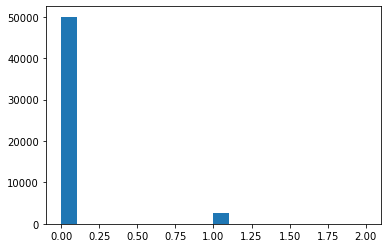

In [23]:
plt.hist(df['y'], bins=20, range=(0,2))
df['y'].value_counts()

In [24]:
# value research : x1_term

(array([10869.,  5968.,  4258.,  4620.,  5260.,  4650.,  2441.,  1992.,
         2043.,  1159.,  1355.,  1296.,  1368.,  1331.,  1287.,  1112.,
          774.,   438.,   252.,    27.]),
 array([  0. ,  13.5,  27. ,  40.5,  54. ,  67.5,  81. ,  94.5, 108. ,
        121.5, 135. , 148.5, 162. , 175.5, 189. , 202.5, 216. , 229.5,
        243. , 256.5, 270. ]),
 <BarContainer object of 20 artists>)

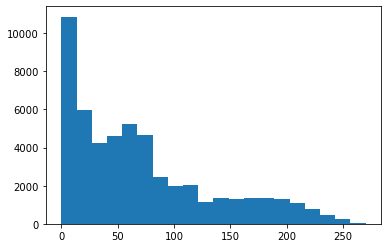

In [25]:
plt.hist(df['x1_term'], bins=20, range=(0,270))

In [26]:
bins = range(0,281,20)
term = pd.cut(df['x1_term'], bins).value_counts().sort_index()
display(term)

(0, 20]       12855
(20, 40]       6597
(40, 60]       7492
(60, 80]       7038
(80, 100]      3130
(100, 120]     3217
(120, 140]     1826
(140, 160]     2028
(160, 180]     1979
(180, 200]     1906
(200, 220]     1664
(220, 240]      792
(240, 260]      323
(260, 280]       10
Name: x1_term, dtype: int64

In [27]:
# 度数分布表
def create_frequency_table(col):
    freq = df[col].value_counts(sort=False) # 度数
    rel_freq = freq / df[col].count()  # 相対度数
    cum_freq = freq.cumsum()  # 累積度数
    rel_cum_freq = rel_freq.cumsum()  # 相対累積度数

    dist = pd.DataFrame(
        {
            "度数": freq,
            "相対度数": rel_freq,
            "累積度数": cum_freq,
            "相対累積度数": rel_cum_freq,
        },
        index=freq.index
    )
    dist = dist.sort_values('度数', ascending=False)
    return dist

In [28]:
create_frequency_table('x1_term')

,度数,相対度数,累積度数,相対累積度数
0,1643,0.031295,1643,0.031295
1,980,0.018667,4022,0.076610
8,905,0.017238,17099,0.325695
10,858,0.016343,21209,0.403981
11,835,0.015905,23212,0.442133
...,...,...,...,...
263,2,0.000038,16194,0.308457
262,2,0.000038,14289,0.272171
268,1,0.000019,26220,0.499429
267,1,0.000019,24353,0.463867


In [29]:
# 度数分布(%)
terms = []
for v in term:
    terms.append(round(v/ df['x1_term'].value_counts().sum() *100))

print(terms)
    
list = []
i = 0
for vv in terms:
    list.append('{0} : {1}%'.format(i+20, vv))
    i=i+20
list

[24, 13, 14, 13, 6, 6, 3, 4, 4, 4, 3, 2, 1, 0]


['20 : 24%',
 '40 : 13%',
 '60 : 14%',
 '80 : 13%',
 '100 : 6%',
 '120 : 6%',
 '140 : 3%',
 '160 : 4%',
 '180 : 4%',
 '200 : 4%',
 '220 : 3%',
 '240 : 2%',
 '260 : 1%',
 '280 : 0%']

In [30]:
# value research : x2_sex

2     26453
1     25297
99      750
Name: x2_sex, dtype: int64

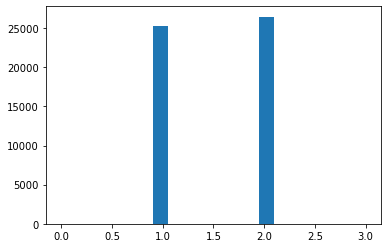

In [31]:
plt.hist(df['x2_sex'], bins=20, range=(0,3))
df['x2_sex'].value_counts()

(array([51750.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,   750.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

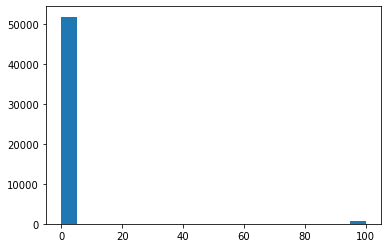

In [32]:
plt.hist(df['x2_sex'], bins=20, range=(0, 100))
# 99 : その他

In [33]:
# data processing

In [34]:
# compensate　missing values
# contain null column : x0_age, x10, x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71

In [35]:
# value research : x0_age

In [36]:
df_proc = df.copy()

(array([1.480e+02, 1.980e+02, 4.110e+02, 2.605e+03, 7.553e+03, 8.216e+03,
        7.215e+03, 6.590e+03, 5.937e+03, 4.759e+03, 3.212e+03, 2.128e+03,
        1.339e+03, 9.020e+02, 2.930e+02, 1.550e+02, 6.500e+01, 2.100e+01,
        2.000e+00, 1.000e+00]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

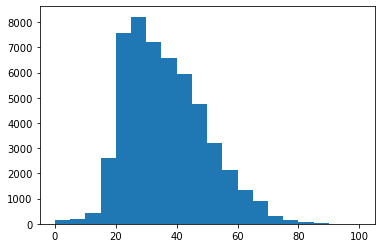

In [37]:
# histgram
plt.hist(df_proc['x0_age'], bins=20, range=(0,100))
# 'x0_age'の分布、偏りのある分布

In [38]:
# value counts
bins = range(0,81,10)
age = pd.cut(df_proc['x0_age'], bins).value_counts().sort_index()
display(age)

(0, 10]       387
(10, 20]     4192
(20, 30]    16028
(30, 40]    13523
(40, 50]    10183
(50, 60]     5006
(60, 70]     1960
(70, 80]      392
Name: x0_age, dtype: int64

In [39]:
# 度数分布表
create_frequency_table('x0_age')

,度数,相対度数,累積度数,相対累積度数
24.0,1735,0.033527,29199,0.564232
25.0,1726,0.033353,6014,0.116213
26.0,1724,0.033314,34634,0.669256
22.0,1634,0.031575,1634,0.031575
23.0,1621,0.031324,20686,0.399729
...,...,...,...,...
89.0,3,0.000058,30418,0.587787
92.0,1,0.000019,45140,0.872271
100.0,1,0.000019,12494,0.241430
88.0,1,0.000019,48852,0.944000


In [40]:
# 度数分布(%)
ages = []
for x in age:
    ages.append(round(x/ df_proc['x0_age'].value_counts().sum() *100))

list = []
i = 0
for xx in ages:
    list.append('{0}代:{1}%'.format(i*10, xx))
    i=i+1
list
# 1:20代, 2:30代, 3:40代

['0代:1%',
 '10代:8%',
 '20代:31%',
 '30代:26%',
 '40代:20%',
 '50代:10%',
 '60代:4%',
 '70代:1%']

In [41]:
df_proc['x0_age'].describe()

count    51750.000000
mean        35.915749
std         13.067311
min          0.000000
25%         26.000000
50%         34.000000
75%         44.000000
max        100.000000
Name: x0_age, dtype: float64

In [42]:
df_proc['x0_age'].median()

34.0

In [43]:
df_proc['x0_age'].mode()

0    24.0
dtype: float64

In [44]:
# mean=36, median=34, mode=24
# 補完に中央値を用いる

In [45]:
df_proc['x0_age'] = df_proc['x0_age'].fillna(df_proc['x0_age'].median())

In [46]:
# value research : x9

In [47]:
pd.set_option('display.max_rows', 500)
df_proc['x9'].value_counts()

T    22518
K     8506
C     6926
Q     4973
H     3050
N     2642
D     1907
S     1009
R      969
Name: x9, dtype: int64

In [48]:
# value research : x10

(array([0.0000e+00, 0.0000e+00, 2.3900e+02, 5.5290e+03, 1.2195e+04,
        8.6360e+03, 6.4930e+03, 5.4770e+03, 4.8270e+03, 3.6200e+03,
        2.1290e+03, 1.1700e+03, 7.3300e+02, 4.3600e+02, 1.7500e+02,
        9.8000e+01, 4.5000e+01, 5.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

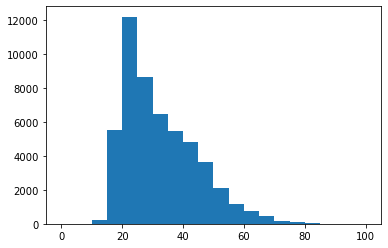

In [49]:
# histgram
plt.hist(df_proc['x10'], bins=20, range=(0,100))
# 'x10'の分布、偏りのある分布
# 年齢と相関がある？分布が似ている

In [50]:
# percentage
ages = []
for x in age:
    ages.append(round(x/ df_proc['x10'].value_counts().sum() *100))

list = []
i = 0
for xx in ages:
    list.append('{0}:{1}%'.format(i*10, xx))
    i=i+1
list
# 1:20, 2:30, 3:40
# 割合は'x0_age'と一致
# 'x0_age'同様、中央値で補完する

['0:1%', '10:8%', '20:31%', '30:26%', '40:20%', '50:10%', '60:4%', '70:1%']

In [51]:
df_proc['x10'] = df_proc['x10'].fillna(df_proc['x10'].median())

In [52]:
# value research : x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71 

In [53]:
df_hist = df_proc.copy()

In [54]:
# missing value(null) count and percentage
total = df_hist.isnull().sum().sort_values(ascending=False)
percent = (df_hist.isnull().sum()/df_hist.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df.head(20)

,Total,Percent
x71,52460,0.999238
x70,52274,0.995695
x69,52274,0.995695
x68,52274,0.995695
x67,52274,0.995695
x62,52119,0.992743
x59,51732,0.985371
x60,51732,0.985371
x61,51732,0.985371
x58,51732,0.985371


In [55]:
percent = (df_hist.isnull().sum()/df_hist.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df.head(20).sort_index()

,Total,Percent
x16,0,0.000000
x17,0,0.000000
x18,0,0.000000
x19,0,0.000000
x20,0,0.000000
x21,0,0.000000
x58,51732,0.985371
x59,51732,0.985371
x60,51732,0.985371
x61,51732,0.985371


In [56]:
# null count
print('x58, null : {0}, values : {1}'.format(df_hist['x58'].isnull().sum(), (len(df_hist['x58']) - df_hist['x58'].isnull().sum())))
print('x59, null : {0}, values : {1}'.format(df_hist['x59'].isnull().sum(), (len(df_hist['x59']) - df_hist['x59'].isnull().sum())))
print('x60, null : {0}, values : {1}'.format(df_hist['x60'].isnull().sum(), (len(df_hist['x60']) - df_hist['x60'].isnull().sum())))
print('x61, null : {0}, values : {1}'.format(df_hist['x61'].isnull().sum(), (len(df_hist['x61']) - df_hist['x61'].isnull().sum())))
print('x62, null : {0}, values : {1}'.format(df_hist['x62'].isnull().sum(), (len(df_hist['x62']) - df_hist['x62'].isnull().sum())))
print('x63, null : {0}, values : {1}'.format(df_hist['x63'].isnull().sum(), (len(df_hist['x63']) - df_hist['x63'].isnull().sum())))
print('x64, null : {0}, values : {1}'.format(df_hist['x64'].isnull().sum(), (len(df_hist['x64']) - df_hist['x64'].isnull().sum())))
print('x65, null : {0}, values : {1}'.format(df_hist['x65'].isnull().sum(), (len(df_hist['x65']) - df_hist['x65'].isnull().sum())))
print('x66, null : {0}, values : {1}'.format(df_hist['x66'].isnull().sum(), (len(df_hist['x66']) - df_hist['x66'].isnull().sum())))
print('x67, null : {0}, values : {1}'.format(df_hist['x67'].isnull().sum(), (len(df_hist['x67']) - df_hist['x67'].isnull().sum())))
print('x68, null : {0}, values : {1}'.format(df_hist['x68'].isnull().sum(), (len(df_hist['x68']) - df_hist['x68'].isnull().sum())))
print('x69, null : {0}, values : {1}'.format(df_hist['x69'].isnull().sum(), (len(df_hist['x69']) - df_hist['x69'].isnull().sum())))
print('x70, null : {0}, values : {1}'.format(df_hist['x70'].isnull().sum(), (len(df_hist['x70']) - df_hist['x70'].isnull().sum())))
print('x71, null : {0}, values : {1}'.format(df_hist['x71'].isnull().sum(), (len(df_hist['x71']) - df_hist['x71'].isnull().sum()))) # 欠損値が多い（99.9%）。欠損の意味が不明。重要度が低ければ除外する

# x58, x59, x61, x62, x64, x65, x66, x67 / null:51732
# x63 / null:52119
# x67, x68, x69, X70 / null:52274
# x71  / null:52460

# 欠損値の意味が不明？　中央値・最頻値、それぞれどちらが重要となる？
# 欠損値に意味がある？未回収者に関わる情報？回収済の場合はnull？
# 欠損が多すぎる？

x58, null : 51732, values : 768
x59, null : 51732, values : 768
x60, null : 51732, values : 768
x61, null : 51732, values : 768
x62, null : 52119, values : 381
x63, null : 51732, values : 768
x64, null : 51732, values : 768
x65, null : 51732, values : 768
x66, null : 51732, values : 768
x67, null : 52274, values : 226
x68, null : 52274, values : 226
x69, null : 52274, values : 226
x70, null : 52274, values : 226
x71, null : 52460, values : 40


count    768.000000
mean       2.639323
std        3.165799
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       54.000000
Name: x58, dtype: float64


(array([523., 160.,  52.,  17.,  12.,   2.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

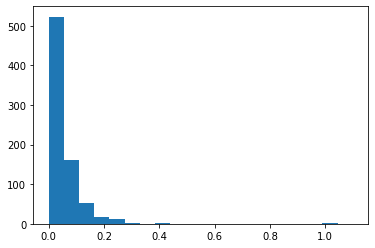

In [57]:
# histgram
print(df_proc['x58'].describe())
print("="*50)
# plt.hist(df_hist['x58'], bins=20, range=(0,60))
# print("="*50)
df_hist['x58'] = df_hist['x58']/df_hist['x58'].max()
plt.hist(df_hist['x58'], bins=20, range=(0,1.1))

In [58]:
df_proc['x58'].value_counts()
# 他の値で補完する。入力値に影響を与えない値で補完したい。
# 近い値だと影響が出てしまう？例えば[-1]
# 欠損値を補完する値は[?]にしてみる。

1.0     387
2.0     136
3.0      78
4.0      54
5.0      28
6.0      21
7.0      18
8.0      13
9.0       9
13.0      8
10.0      5
12.0      4
11.0      3
15.0      2
22.0      1
54.0      1
Name: x58, dtype: int64

count      768.000000
mean     14595.561198
std      16842.294721
min        500.000000
25%       3000.000000
50%       7600.000000
75%      20000.000000
max      90000.000000
Name: x59, dtype: float64


(array([243., 186., 108.,  22.,  42.,  23.,  42.,  17.,  13.,  17.,  21.,
         11.,  13.,   0.,   3.,   3.,   2.,   0.,   2.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

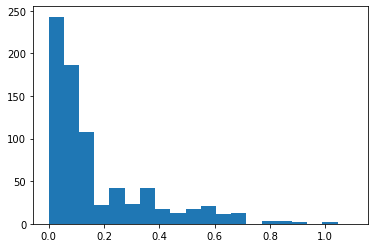

In [59]:
print(df_proc['x59'].describe())
print("="*50)
# plt.hist(df_hist['x59'], bins=20, range=(0,90000))
# print("="*50)
df_hist['x59'] = df_hist['x59']/df_hist['x59'].max()
plt.hist(df_hist['x59'], bins=20, range=(0,1.1))

In [60]:
df_proc['x59'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

5000.0     109
10000.0     87
3000.0      83
1000.0      49
30000.0     33
20000.0     29
4000.0      28
50000.0     19
2000.0      18
8000.0      16
500.0       15
9000.0      12
15000.0     10
6000.0      10
60000.0      9
7000.0       8
2500.0       8
1500.0       7
35000.0      6
4500.0       6
2600.0       6
28000.0      5
12000.0      5
25000.0      5
9600.0       5
40000.0      5
48000.0      5
45000.0      5
11000.0      4
36000.0      4
8500.0       4
22000.0      4
6500.0       4
4600.0       3
70000.0      3
2400.0       3
42000.0      3
24000.0      3
3500.0       3
27000.0      3
39000.0      3
34000.0      3
31000.0      3
13000.0      3
56000.0      3
7500.0       3
90000.0      2
59500.0      2
80000.0      2
46000.0      2
41000.0      2
1400.0       2
14000.0      2
4800.0       2
19600.0      2
49000.0      2
48400.0      2
23000.0      2
30300.0      2
29400.0      2
900.0        2
16000.0      2
78000.0      2
2300.0       2
39600.0      2
55000.0      2
29200.0   

count      768.000000
mean      7972.395833
std       9261.323792
min        500.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      78000.000000
Name: x60, dtype: float64


(array([294., 189., 199.,   9.,  32.,   5.,  19.,   1.,   2.,   4.,   0.,
          8.,   0.,   5.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

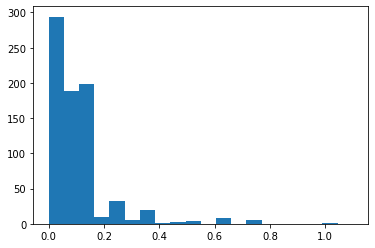

In [61]:
# histgram
print(df_proc['x60'].describe())
print("="*50)
# plt.hist(df_hist['x60'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x60'] = df_hist['x60']/df_hist['x60'].max()
plt.hist(df_hist['x60'], bins=20, range=(0,1.1))

In [62]:
df_proc['x60'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

10000.0    191
5000.0     153
3000.0     125
1000.0      77
20000.0     24
4000.0      21
2000.0      20
500.0       16
30000.0     15
8000.0       8
50000.0      7
6000.0       7
1500.0       6
2500.0       5
1400.0       5
2600.0       5
4600.0       4
9000.0       4
7000.0       3
15000.0      3
9600.0       3
17000.0      3
2300.0       3
40000.0      3
4800.0       3
6400.0       2
1600.0       2
13000.0      2
25000.0      2
19000.0      2
21000.0      2
2400.0       2
900.0        2
29400.0      2
35000.0      2
4500.0       2
19100.0      1
3800.0       1
24000.0      1
5200.0       1
1300.0       1
33000.0      1
2800.0       1
8300.0       1
9300.0       1
6800.0       1
49000.0      1
58000.0      1
4300.0       1
58900.0      1
78000.0      1
29000.0      1
19700.0      1
4400.0       1
19600.0      1
21600.0      1
6500.0       1
59500.0      1
3500.0       1
16000.0      1
3700.0       1
17300.0      1
22000.0      1
60000.0      1
27500.0      1
59000.0      1
39600.0   

count      768.000000
mean      5243.998698
std       7576.654197
min        191.000000
25%       1000.000000
50%       3000.000000
75%       5000.000000
max      78000.000000
Name: x61, dtype: float64


(array([443., 162., 130.,   1.,   9.,   2.,  11.,   0.,   0.,   1.,   0.,
          4.,   0.,   4.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

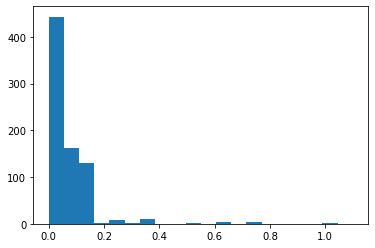

In [63]:
print(df_proc['x61'].describe())
print("="*50)
# plt.hist(df_hist['x61'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x61'] = df_hist['x61']/df_hist['x61'].max()
plt.hist(df_hist['x61'], bins=20, range=(0,1.1))

In [64]:
df_proc['x61'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

1000.0     152
5000.0     141
10000.0    121
3000.0     113
500.0       79
2000.0      35
4000.0      28
30000.0      8
1500.0       8
20000.0      7
6000.0       5
2600.0       5
8000.0       4
9600.0       4
4600.0       4
2500.0       4
9000.0       4
50000.0      3
900.0        3
7000.0       2
29400.0      2
4800.0       2
1400.0       2
2400.0       2
2300.0       2
1600.0       2
1800.0       1
4500.0       1
9300.0       1
19100.0      1
58000.0      1
3900.0       1
29100.0      1
4300.0       1
58900.0      1
59500.0      1
59000.0      1
3700.0       1
3500.0       1
78000.0      1
15000.0      1
19600.0      1
3600.0       1
4400.0       1
39600.0      1
22000.0      1
700.0        1
24000.0      1
1200.0       1
191.0        1
49000.0      1
7700.0       1
Name: x61, dtype: int64

count      381.000000
mean      2864.511639
std       4429.073467
min          0.000000
25%        346.410162
50%       1414.213562
75%       3427.827300
max      31754.264805
Name: x62, dtype: float64


(array([211.,  77.,  42.,   9.,  16.,  11.,   4.,   0.,   1.,   0.,   1.,
          1.,   3.,   1.,   1.,   0.,   1.,   1.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

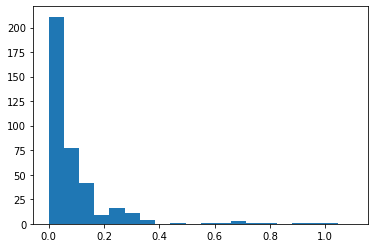

In [65]:
print(df_proc['x62'].describe())
print("="*50)
# plt.hist(df_hist['x62'], bins=20, range=(0,32000))
# print("="*50)
df_hist['x62'] = df_hist['x62']/df_hist['x62'].max()
plt.hist(df_hist['x62'], bins=20, range=(0,1.1))
# min=0, 0に意味がありそう

In [66]:
df_proc['x62'].value_counts()
# 欠損値は0で補完しない。0:79件の意味が変わってしまうため。
# 欠損値を補完する値は[-1]にしてみる。

0.000000        79
1414.213562     23
707.106781      13
2886.751346      9
1154.700538      9
353.553391       8
2500.000000      5
282.842712       4
3535.533906      4
577.350269       4
7071.067812      3
288.675135       3
2474.873734      3
1322.875656      3
2738.612788      3
3224.903099      3
3559.026084      3
5773.502692      3
11547.005384     3
1000.000000      3
4358.898944      2
9899.494937      2
2828.427125      2
1190.238071      2
1060.660172      2
3915.780041      2
8485.281374      2
2000.000000      2
2309.401077      2
1250.000000      2
21213.203436     2
500.000000       2
1527.525232      2
8660.254038      2
8864.052604      1
2254.624876      1
1697.056275      1
2108.185107      1
1289.820283      1
3313.931631      1
2096.624271      1
12020.815280     1
2968.084199      1
7762.087348      1
8906.926144      1
680.685929       1
417.261480       1
1272.792206      1
258.774585       1
7874.007874      1
3119.294792      1
786.795792       1
1443.375673 

count    7.680000e+02
mean     8.205164e+05
std      8.230016e+05
min      5.400000e+01
25%      6.440150e+04
50%      5.051900e+05
75%      1.532342e+06
max      2.676106e+06
Name: x63, dtype: float64


(array([  0., 178., 116.,  53.,  44.,  31.,  34.,  31.,  25.,  24.,  32.,
         36.,  43.,  27.,  24.,  22.,  18.,  18.,  12.,   0.]),
 array([-0.1 , -0.04,  0.02,  0.08,  0.14,  0.2 ,  0.26,  0.32,  0.38,
         0.44,  0.5 ,  0.56,  0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,
         0.98,  1.04,  1.1 ]),
 <BarContainer object of 20 artists>)

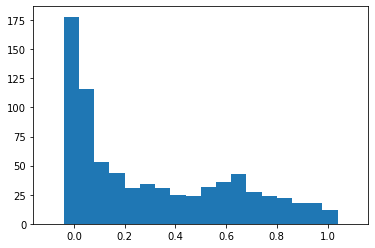

In [67]:
print(df_proc['x63'].describe())
print("="*50)
# plt.hist(df_hist['x63'], bins=20, range=(0,330000))
# print("="*50)
df_hist['x63'] = df_hist['x63']/df_hist['x63'].max()
plt.hist(df_hist['x63'], bins=20, range=(-0.1,1.1))

In [68]:
df_proc['x63'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

28680.0      2
65535.0      1
464.0        1
117304.0     1
234607.0     1
            ..
187.0        1
1395670.0    1
6987.0       1
174395.0     1
240.0        1
Name: x63, Length: 767, dtype: int64

count    7.680000e+02
mean     1.247370e+06
std      8.961457e+05
min     -8.410600e+04
25%      4.644518e+05
50%      1.094285e+06
75%      2.168428e+06
max      3.220710e+06
Name: x64, dtype: float64


(array([  0.,  71.,  58.,  61.,  61.,  59.,  52.,  48.,  46.,  42.,  25.,
         22.,  37.,  32., 119.,  34.,   0.,   0.,   1.,   0.]),
 array([-0.1 , -0.04,  0.02,  0.08,  0.14,  0.2 ,  0.26,  0.32,  0.38,
         0.44,  0.5 ,  0.56,  0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,
         0.98,  1.04,  1.1 ]),
 <BarContainer object of 20 artists>)

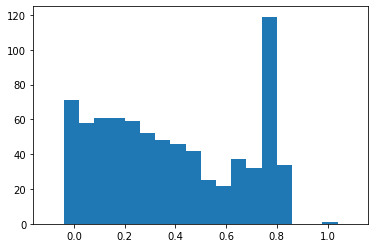

In [69]:
print(df_proc['x64'].describe())
print("="*50)
# plt.hist(df_hist['x64'], bins=20, range=(0,330000))
# print("="*50)
df_hist['x64'] = df_hist['x64']/df_hist['x64'].max()
plt.hist(df_hist['x64'], bins=20, range=(-0.1,1.1))

In [70]:
s = []
s = df_hist['x64'][df_hist['x64'] == 0]
print(s.shape)
print(df_proc['x64'].value_counts())
print(df_proc['x64'].median())
print(df_proc['x64'].max())
# マイナスの値を含む。0は存在しないが、他の値と明確に区別できる値で補完する。「99999999」とする。
# 欠損値を補完する値は[0]にしてみる。

(0,)
1572664.0    1
2096815.0    1
2456783.0    1
2014574.0    1
372570.0     1
            ..
569438.0     1
514045.0     1
1269559.0    1
634572.0     1
106496.0     1
Name: x64, Length: 768, dtype: int64
1094285.0
3220710.0


count      768.000000
mean      5854.557292
std       7996.818472
min        500.000000
25%       1000.000000
50%       4000.000000
75%       7775.000000
max      78000.000000
Name: x65, dtype: float64


(array([405., 175., 143.,   5.,  13.,   3.,  11.,   0.,   1.,   2.,   0.,
          5.,   0.,   4.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

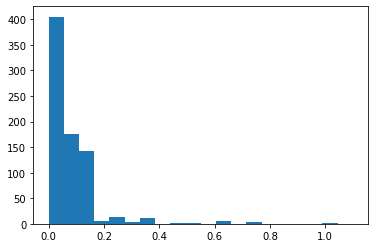

In [71]:
print(df_proc['x65'].describe())
print("="*50)
# plt.hist(df_hist['x65'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x65'] = df_hist['x65']/df_hist['x65'].max()
plt.hist(df_hist['x65'], bins=20, range=(0,1.1))

In [72]:
df_proc['x65'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

5000.0     145
1000.0     135
10000.0    131
3000.0     109
500.0       55
2000.0      36
4000.0      26
20000.0     11
30000.0      8
2500.0       7
1500.0       7
6000.0       6
2600.0       5
50000.0      4
9600.0       4
8000.0       4
4600.0       4
9000.0       4
17000.0      3
1600.0       3
7000.0       3
700.0        3
4800.0       3
1400.0       3
6400.0       2
2400.0       2
3600.0       2
1200.0       2
900.0        2
2300.0       2
29400.0      2
29100.0      1
1700.0       1
9500.0       1
3900.0       1
39600.0      1
24000.0      1
1300.0       1
58000.0      1
5200.0       1
40000.0      1
9300.0       1
4500.0       1
49000.0      1
4700.0       1
12500.0      1
19100.0      1
58900.0      1
2800.0       1
4400.0       1
19600.0      1
5400.0       1
35000.0      1
15000.0      1
21600.0      1
59500.0      1
78000.0      1
9400.0       1
3500.0       1
6900.0       1
3700.0       1
22000.0      1
59000.0      1
4300.0       1
16000.0      1
7700.0       1
Name: x65,

count      768.000000
mean      6876.811198
std       8413.262309
min        191.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      78000.000000
Name: x66, dtype: float64


(array([344., 185., 179.,   4.,  22.,   4.,  15.,   1.,   0.,   3.,   0.,
          6.,   0.,   4.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

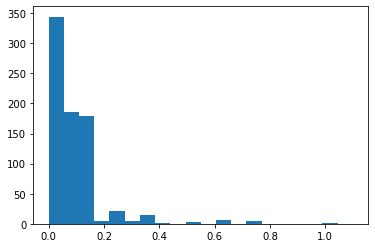

In [73]:
# histgram
print(df_proc['x66'].describe())
print("="*50)
# plt.hist(df_hist['x66'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x66'] = df_hist['x66']/df_hist['x66'].max()
plt.hist(df_hist['x66'], bins=20, range=(0,1.1))

In [74]:
df_proc['x66'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

10000.0    172
5000.0     156
3000.0     138
1000.0     103
4000.0      25
500.0       25
2000.0      22
20000.0     17
30000.0     11
8000.0       7
6000.0       6
2600.0       5
2500.0       5
50000.0      5
1500.0       5
15000.0      3
4600.0       3
9000.0       3
9600.0       3
1400.0       3
2300.0       3
40000.0      2
29400.0      2
25000.0      2
4800.0       2
4500.0       2
2400.0       2
900.0        2
19100.0      1
5300.0       1
5200.0       1
19000.0      1
21000.0      1
8400.0       1
58000.0      1
8300.0       1
9300.0       1
33000.0      1
58900.0      1
1600.0       1
4300.0       1
59000.0      1
49000.0      1
191.0        1
600.0        1
24000.0      1
700.0        1
22000.0      1
13000.0      1
29000.0      1
6500.0       1
3500.0       1
39600.0      1
4400.0       1
19600.0      1
59500.0      1
78000.0      1
7000.0       1
3700.0       1
17300.0      1
27500.0      1
7700.0       1
Name: x66, dtype: int64

count    226.000000
mean       1.300885
std        0.852551
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
Name: x67, dtype: float64


(array([  0.,   0., 186.,   0.,  24.,   0.,  12.,   0.,   0.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

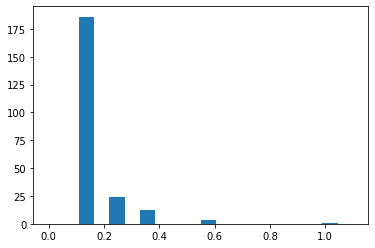

In [75]:
# histgram
print(df_proc['x67'].describe())
print("="*50)
# plt.hist(df_hist['x67'], bins=20, range=(0,9))
# print("="*50)
df_hist['x67'] = df_hist['x67']/df_hist['x67'].max()
plt.hist(df_hist['x67'], bins=20, range=(0,1.1))

In [76]:
df_proc['x67'].value_counts()
# 欠損値を補完する値は[99]にしてみる。区別するために、「0」ではなく、離した値で補完してみる。

1.0    186
2.0     24
3.0     12
5.0      3
9.0      1
Name: x67, dtype: int64

count      226.000000
mean     12192.035398
std      14638.063877
min        500.000000
25%       3000.000000
50%       6600.000000
75%      10000.000000
max      90000.000000
Name: x68, dtype: float64


(array([80., 46., 48.,  4., 13.,  5., 11.,  1.,  3.,  1.,  8.,  4.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

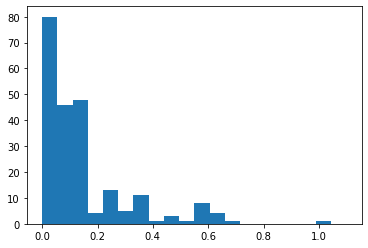

In [77]:
# histgram
print(df_proc['x68'].describe())
print("="*50)
# plt.hist(df_hist['x68'], bins=20, range=(0,90000))
# print("="*50)
df_hist['x68'] = df_hist['x68']/df_hist['x68'].max()
plt.hist(df_hist['x68'], bins=20, range=(0,1.1))

In [78]:
df_proc['x68'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

10000.0    46
3000.0     36
5000.0     29
1000.0     21
20000.0    11
30000.0    10
8000.0      8
50000.0     8
2000.0      4
6000.0      3
4000.0      3
500.0       3
25000.0     2
29400.0     2
4800.0      2
40000.0     2
2600.0      2
13000.0     2
2500.0      2
58000.0     1
8400.0      1
21000.0     1
1500.0      1
17000.0     1
19100.0     1
6200.0      1
8300.0      1
4500.0      1
33000.0     1
2400.0      1
58900.0     1
90000.0     1
4300.0      1
7000.0      1
49000.0     1
40500.0     1
24000.0     1
4200.0      1
9000.0      1
9600.0      1
39600.0     1
59100.0     1
4400.0      1
19600.0     1
15000.0     1
59500.0     1
4600.0      1
29600.0     1
56000.0     1
Name: x68, dtype: int64

count      226.000000
mean     10245.575221
std      11959.479843
min        500.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      59500.000000
Name: x69, dtype: float64


(array([74., 48.,  6., 58.,  1.,  2., 10.,  3.,  2.,  8.,  2.,  0.,  3.,
         0.,  1.,  5.,  0.,  2.,  1.,  0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

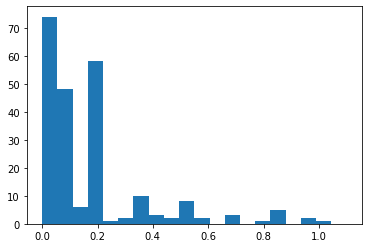

In [79]:
# histgram
print(df_proc['x69'].describe())
print("="*50)
# plt.hist(df_hist['x69'], bins=20, range=(0,60000))
# print("="*50)
df_hist['x69'] = df_hist['x69']/df_hist['x69'].max()
plt.hist(df_hist['x69'], bins=20, range=(0,1.1))

In [80]:
df_proc['x69'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

10000.0    58
3000.0     40
5000.0     36
1000.0     25
20000.0     8
30000.0     8
8000.0      5
50000.0     5
6000.0      3
500.0       3
29400.0     2
2000.0      2
4800.0      2
40000.0     2
25000.0     2
2600.0      1
5200.0      1
21000.0     1
19100.0     1
1500.0      1
8300.0      1
2400.0      1
33000.0     1
58900.0     1
58000.0     1
4600.0      1
4300.0      1
4000.0      1
1600.0      1
49000.0     1
15000.0     1
35000.0     1
19600.0     1
4400.0      1
19700.0     1
39600.0     1
4500.0      1
3800.0      1
24000.0     1
59500.0     1
Name: x69, dtype: int64

count      226.000000
mean      9327.876106
std      11369.134508
min        500.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      59500.000000
Name: x70, dtype: float64


(array([85., 43.,  6., 58.,  1.,  2.,  8.,  3.,  3.,  6.,  1.,  0.,  2.,
         0.,  1.,  4.,  0.,  2.,  1.,  0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

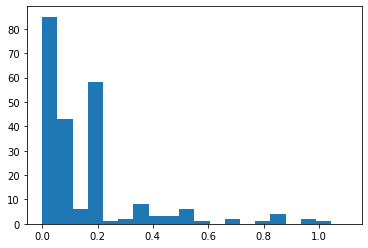

In [81]:
# histgram
print(df_proc['x70'].describe())
print("="*50)
# plt.hist(df_hist['x70'], bins=20, range=(0,60000))
# print("="*50)
df_hist['x70'] = df_hist['x70']/df_hist['x70'].max()
plt.hist(df_hist['x70'], bins=20, range=(0,1.1))

In [82]:
df_proc['x70'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

10000.0    58
3000.0     41
1000.0     32
5000.0     31
20000.0     7
30000.0     6
500.0       6
8000.0      5
50000.0     4
6000.0      4
2000.0      3
4800.0      2
29400.0     2
25000.0     2
4600.0      2
15000.0     1
19100.0     1
33000.0     1
8300.0      1
24000.0     1
2600.0      1
58000.0     1
4500.0      1
29100.0     1
21000.0     1
1200.0      1
19600.0     1
2400.0      1
58900.0     1
39600.0     1
4300.0      1
4400.0      1
4000.0      1
49000.0     1
59500.0     1
40000.0     1
Name: x70, dtype: int64

count       40.000000
mean      3339.688069
std       6667.264737
min          0.000000
25%          0.000000
50%        895.548321
75%       2453.738644
max      31112.698372
Name: x71, dtype: float64


(array([28.,  4.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

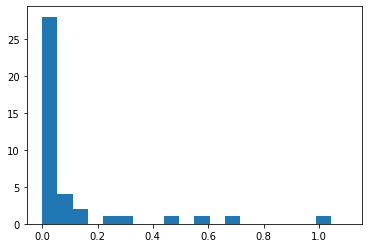

In [83]:
# histgram
print(df_proc['x71'].describe())
print("="*50)
# plt.hist(df_hist['x71'], bins=20, range=(0,32000))
# print("="*50)
df_hist['x71'] = df_hist['x71']/df_hist['x71'].max()
plt.hist(df_hist['x71'], bins=20, range=(0,1.1))

In [84]:
df_proc['x71'].value_counts()
# 欠損値を補完する値は[-1]にしてみる。

0.000000        14
1414.213562      5
353.553391       2
2309.401077      1
282.842712       1
1562.049935      1
31112.698372     1
4949.747468      1
21213.203436     1
1272.792206      1
14142.135624     1
2886.751346      1
4041.451884      1
18754.999334     1
2969.848481      1
2000.000000      1
636.396103       1
424.264069       1
288.675135       1
7071.067812      1
1154.700538      1
8736.322644      1
Name: x71, dtype: int64

In [85]:
# similar distribution
# x58, x62, X71
# x59, x68, x67
# x60, x61, x65, x66
# x63, x64 float
# x69, x70

In [86]:
# 欠損値の意味は不明
# 最頻値の割合が多い、最頻値で補完　？　NULLの意味は？

In [87]:
print('x58') # 最頻値、中央値、同じため、代表値：1 とする
print(df_proc['x58'].mode()) # same
print(df_proc['x58'].median())
print("="*50)

print('x59')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x59'].mode())
print('mode : {0}'.format(round(df_proc['x59'].value_counts()[df_proc['x59'].mode()]/df_proc['x59'].count()*100,1)))
print(df_proc['x59'].median())
print("="*50)

print('x60')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x60'].mode())
print('mode : {0}'.format(round(df_proc['x60'].value_counts()[df_proc['x60'].mode()]/df_proc['x60'].count()*100,1)))
print(df_proc['x60'].median())
print("="*50)

print('x61')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x61'].mode())
print('mode : {0}'.format(round(df_proc['x61'].value_counts()[df_proc['x61'].mode()]/df_proc['x61'].count()*100,1)))
print(df_proc['x61'].median())
print("="*50)

print('x62')
#　0が最頻値(20.7%)。0に意味があると思われる。未入力（欠損）にも意味があると思われる。欠損値とわかるよう、最低値が0、区別するため代表値： -1とする
print(df_proc['x62'].mode())
print('mode : {0}'.format(round(df_proc['x62'].value_counts()[df_proc['x62'].mode()]/df_proc['x62'].count()*100,1)))
print(df_proc['x62'].median())
print("="*50)

print('x63')
# 外れ値あり。最頻値が他より圧倒的に多い。代表値： 最頻値とする
print(df_proc['x63'].mode())
print('mode : {0}'.format(round(df_proc['x63'].value_counts()[df_proc['x63'].mode()]/df_proc['x63'].count()*100,1)))
print(df_proc['x63'].median())
print("="*50)

print('x64')
# contain minus values
# マイナスにも触れている。損益金？マイナス値にも意味があるため、正負を考慮したい。外れ値があり、正規分布でないため、中央値を使用することとする。
print(df_proc['x64'].mode()) 
print('mode : {0}'.format(round(df_proc['x64'].value_counts()[df_proc['x64'].mode()]/df_proc['x64'].count()*100,1)))
print(df_proc['x64'].median())
print("="*50)

print('x65')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x65'].mode()) # near
print('mode : {0}'.format(round(df_proc['x65'].value_counts()[df_proc['x65'].mode()]/df_proc['x65'].count()*100,1)))
print(df_proc['x65'].median())
print("="*50)

print('x66')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x66'].mode())
print('mode : {0}'.format(round(df_proc['x66'].value_counts()[df_proc['x66'].mode()]/df_proc['x66'].count()*100,1)))
print(df_proc['x66'].median())
print("="*50)

print('x67') # 最頻値、中央値、同じため、代表値：1 とする
print(df_proc['x67'].mode()) # same
print(df_proc['x67'].median())
print("="*50)

print('x68')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x68'].mode())
print('mode : {0}'.format(round(df_proc['x68'].value_counts()[df_proc['x68'].mode()]/df_proc['x68'].count()*100,1)))
print(df_proc['x68'].median())
print("="*50)

print('x69')
# x70と同じ分布。相関あり。
# 山が２つある。その為、平均値・中央値の使用は避けたい。一番大きな山（最頻値：25.7%)　代表値： 最頻値とする
print(df_proc['x69'].mode())
print('mode : {0}'.format(round(df_proc['x69'].value_counts()[df_proc['x69'].mode()]/df_proc['x69'].count()*100,1)))
print(df_proc['x69'].median())
print("="*50)

print('x70')
# x69と同じ分布。相関あり。
# 山が２つある。その為、平均値・中央値の使用は避けたい。一番大きな山（最頻値：25.7%)　代表値： 最頻値とする
print(df_proc['x70'].mode())
print('mode : {0}'.format(round(df_proc['x70'].value_counts()[df_proc['x70'].mode()]/df_proc['x70'].count()*100,1)))
print(df_proc['x70'].median())
print("="*50)

print('x71')
#　0が最頻値(35%)。0に意味があると思われる。未入力（欠損）にも意味があると思われる。欠損値とわかるよう、最低値が0、区別するため代表値： -1とする
print(df_proc['x71'].mode())
print('mode : {0}'.format(round(df_proc['x71'].value_counts()[df_proc['x71'].mode()]/df_proc['x71'].count()*100,1)))
print(df_proc['x71'].median())

x58
0    1.0
dtype: float64
1.0
x59
0    5000.0
dtype: float64
mode : 5000.0    14.2
Name: x59, dtype: float64
7600.0
x60
0    10000.0
dtype: float64
mode : 10000.0    24.9
Name: x60, dtype: float64
5000.0
x61
0    1000.0
dtype: float64
mode : 1000.0    19.8
Name: x61, dtype: float64
3000.0
x62
0    0.0
dtype: float64
mode : 0.0    20.7
Name: x62, dtype: float64
1414.2135623730999
x63
0    28680.0
dtype: float64
mode : 28680.0    0.3
Name: x63, dtype: float64
505190.0
x64
0       -84106.0
1       -83614.0
2       -82201.0
3       -81403.0
4       -76568.0
         ...    
763    2591813.0
764    2591815.0
765    2591822.0
766    2591946.0
767    3220710.0
Length: 768, dtype: float64
mode : -84106.0      0.1
-83614.0      0.1
-82201.0      0.1
-81403.0      0.1
-76568.0      0.1
             ... 
 2591813.0    0.1
 2591815.0    0.1
 2591822.0    0.1
 2591946.0    0.1
 3220710.0    0.1
Name: x64, Length: 768, dtype: float64
1094285.0
x65
0    5000.0
dtype: float64
mode : 5000.0    18.9
N

In [88]:
# そもそも欠損値が多すぎる（50000以上）のため、中央値、最頻値等で補完すべきではない？欠損値とわかる値で補完した方がよい？

In [89]:
# # complement missing values
# df_proc['x58'] = df_proc['x58'].fillna(1)
# df_proc['x59'] = df_proc['x59'].fillna(df_proc['x59'].median())
# df_proc['x60'] = df_proc['x60'].fillna(df_proc['x60'].median())
# df_proc['x61'] = df_proc['x61'].fillna(df_proc['x61'].median())
# df_proc['x62'] = df_proc['x62'].fillna(-1)
# # df_proc['x63'] = df_proc['x63'].fillna(df_proc['x63'].mode()) # 最頻値が0
# df_proc['x64'] = df_proc['x64'].fillna(df_proc['x64'].median())
# df_proc['x65'] = df_proc['x65'].fillna(df_proc['x65'].median())
# df_proc['x66'] = df_proc['x66'].fillna(df_proc['x66'].median())
# df_proc['x67'] = df_proc['x67'].fillna(1)
# df_proc['x68'] = df_proc['x68'].fillna(df_proc['x68'].median())
# # df_proc['x69'] = df_proc['x69'].fillna(df_proc['x69'].mode()) # 最頻値が0
# # df_proc['x70'] = df_proc['x70'].fillna(df_proc['x70'].mode()) # 最頻値が0
# df_proc['x71'] = df_proc['x71'].fillna(-1) # 欠損が99.9%のため、重要度が低ければ除外して再学習させる。

In [90]:
# 58:0
# 59:0
# 60:0
# 61:0
# 62:-1
# 63:0
# 64:99999999
# 65:0
# 66:0
# 67:99
# 68:0
# 69:0
# 70:0
# 71:-1
df_proc['x58'] = df_proc['x58'].fillna(0)
df_proc['x59'] = df_proc['x59'].fillna(0)
df_proc['x60'] = df_proc['x60'].fillna(0)
df_proc['x61'] = df_proc['x61'].fillna(0)
df_proc['x62'] = df_proc['x62'].fillna(-1)
df_proc['x63'] = df_proc['x63'].fillna(0)
df_proc['x64'] = df_proc['x64'].fillna(99999999)
df_proc['x65'] = df_proc['x65'].fillna(0)
df_proc['x66'] = df_proc['x66'].fillna(0)
df_proc['x67'] = df_proc['x67'].fillna(99)
df_proc['x68'] = df_proc['x68'].fillna(0)
df_proc['x69'] = df_proc['x69'].fillna(0)
df_proc['x70'] = df_proc['x70'].fillna(0)
df_proc['x71'] = df_proc['x71'].fillna(-1)

In [91]:
# unresolved
# 欠損のパターンの確認（MCAR、MAR、MNAR）、パターン別の対応
# 欠損に対する処理(リストワイズ法、ペアワイズ方、平均代入法、回帰代入法)　※用途、方法の検討

In [92]:
# # label encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_proc['x9'] = le.fit_transform(df_proc['x9'].values)
# df_proc

In [93]:
# one hot encoding
df_proc = pd.get_dummies(df_proc, columns=['x9'])
df_proc
# df_onehot = df_proc.copy()
# df_onehot = pd.get_dummies(df_onehot, columns=['x9'])
# df_onehot

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,...,x72,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T
0,1,22.0,0,2,10,1,0,99,99,99,...,0,0,0,0,0,0,0,0,0,1
1,1,49.0,36,2,10,1,8,1,99,99,...,0,0,0,0,1,0,0,0,0,0
2,1,22.0,13,1,10,1,6,1,99,99,...,0,0,0,0,0,0,0,0,0,1
3,1,34.0,24,1,10,2,0,99,99,99,...,0,0,0,0,1,0,0,0,0,0
4,1,26.0,97,1,32,1,10,1,99,99,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,0,26.0,11,1,10,2,0,99,99,99,...,0,0,0,0,0,0,0,0,0,1
52496,0,32.0,26,2,10,2,0,99,99,99,...,0,0,0,0,1,0,0,0,0,0
52497,0,59.0,84,2,10,2,0,99,99,99,...,0,0,0,0,0,0,0,0,0,1
52498,0,16.0,8,2,10,2,0,99,99,99,...,0,0,0,0,0,1,0,0,0,0


In [94]:
# unsolved!!!!!!! : dealing with outliers
# 発生原因はなにか？
# 外れ値に意味がある（有益）のか
# 各外れ値、それぞれどう扱うか（考慮要/不要の検討）
# 重要な外れ値か、異常値か（入力ミス・処理ミス（原因が明確）、どの程度逸脱したものを異常値とみなすか）
# 本当に外れ値か（外れ値検定）、スミルノフ=グラブス検定、IQR、クラスター分析 ←除外は厳に慎むべき？
# 生データから散布図を作成し、箱ひげ図により、外れ値の有無を確かめる
# 除外、そのまま、補完？
# データの入力がそもそも誤りである、値そのものは正しいが、偶然に外れ値が生じてしまった
# 正しい値（妥当性のある値）に修正、　行ごと削除、そのまま
# 外れ値と欠損値に関係があるか

In [95]:
# 外れ値→相関→欠損値

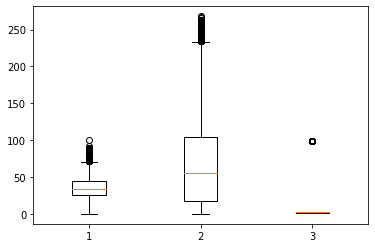

In [96]:
dfs = df_proc.copy()
fig, ax = plt.subplots()
ax.boxplot((dfs['x0_age'],dfs['x1_term'],dfs['x2_sex']))
plt.show()

In [97]:
print(dfs['x0_age'].value_counts()) # 100.0 御長寿（90歳以上が4名、80歳以上が9名）
print(dfs['x1_term'].value_counts()) # 268 割合は少ないが、長期契約も一定数いる。
print(dfs['x2_sex'].value_counts()) # 99 意味ありそう

34.0     2141
24.0     1735
25.0     1726
26.0     1724
22.0     1634
23.0     1621
27.0     1604
28.0     1592
29.0     1570
30.0     1479
31.0     1466
32.0     1452
33.0     1427
36.0     1386
35.0     1351
21.0     1343
37.0     1318
38.0     1296
41.0     1253
39.0     1239
42.0     1233
20.0     1220
40.0     1197
43.0     1170
45.0     1093
44.0     1084
46.0      995
47.0      961
19.0      941
48.0      866
49.0      844
51.0      778
50.0      684
52.0      634
18.0      631
53.0      589
55.0      533
54.0      527
56.0      467
57.0      431
17.0      423
16.0      382
58.0      374
60.0      350
59.0      323
61.0      312
62.0      254
15.0      228
63.0      221
66.0      213
65.0      213
64.0      202
67.0      181
68.0      180
14.0      160
69.0      115
13.0      112
70.0       69
72.0       68
12.0       65
73.0       56
74.0       50
71.0       50
4.0        49
10.0       44
75.0       44
9.0        43
7.0        42
8.0        39
3.0        39
6.0        38
2.0   

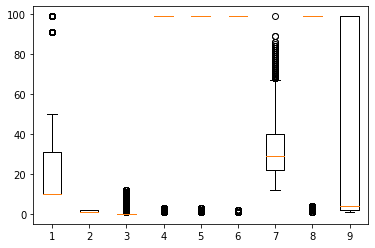

In [98]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x3'],dfs['x4'],dfs['x5'],dfs['x6'],dfs['x7'],dfs['x8'],dfs['x10'],dfs['x11'],dfs['x12']))
plt.show()

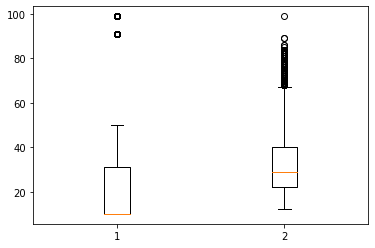

In [99]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x3'],dfs['x10']))
plt.show()

In [100]:
print(dfs['x3'].value_counts()) # 91,99
print(dfs['x10'].value_counts()) # 99.0 年齢と相関あり？

10    37890
35     3758
91     3643
31     2568
33     1149
34     1018
99      692
32      638
50      528
40      373
20      243
Name: x3, dtype: int64
20.0    2958
22.0    2442
21.0    2437
23.0    2224
29.0    2217
24.0    2134
19.0    1995
25.0    1887
26.0    1847
18.0    1835
27.0    1741
28.0    1636
30.0    1419
31.0    1302
32.0    1289
34.0    1256
33.0    1227
35.0    1147
36.0    1142
38.0    1094
37.0    1085
40.0    1040
39.0    1009
41.0    1004
42.0     967
43.0     949
44.0     867
45.0     843
46.0     824
17.0     779
48.0     695
47.0     691
49.0     567
50.0     533
51.0     487
16.0     472
15.0     448
52.0     407
53.0     357
54.0     345
55.0     288
56.0     253
57.0     234
58.0     202
59.0     193
60.0     175
61.0     174
63.0     138
62.0     129
64.0     117
14.0     117
65.0     115
66.0     102
67.0      81
13.0      78
68.0      77
69.0      61
12.0      44
73.0      41
70.0      40
72.0      39
71.0      36
75.0      28
76.0      21
77.0      20


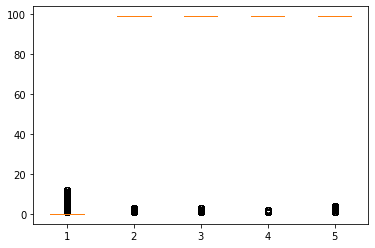

In [101]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x5'],dfs['x6'],dfs['x7'],dfs['x8'],dfs['x11']))
plt.show()

In [102]:
print(dfs['x5'].value_counts()) # 12 少数だが意味はありそう。

0     39389
1      2813
11     1981
2      1507
10     1368
3      1026
9       825
4       794
5       716
8       702
6       692
7       676
12       11
Name: x5, dtype: int64


In [103]:
print(dfs['x6'].value_counts()) # x5の[0]と[99]が同数。同じ意味？その他？
print(dfs['x7'].value_counts())
print(dfs['x8'].value_counts())
print(dfs['x11'].value_counts())
print(dfs['x12'].value_counts())
# ほとんど99、「その他：該当なし」の意味？、つまり基本は「1~4」

99    39389
1      8407
3      3057
2      1647
Name: x6, dtype: int64
99    51053
1      1226
2       198
3        23
Name: x7, dtype: int64
99    48814
1      3648
2        38
Name: x8, dtype: int64
99    46900
3      3918
4      1384
2       234
1        64
Name: x11, dtype: int64
2     24103
99    16214
4     11755
3       262
1       166
Name: x12, dtype: int64


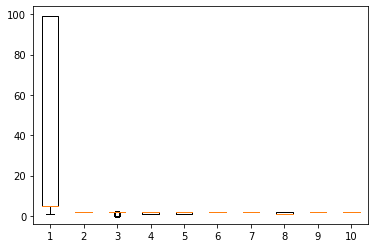

In [104]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x13'],dfs['x14'],dfs['x15'],dfs['x16'],dfs['x17'],dfs['x18'],dfs['x19'],dfs['x20'],dfs['x21'],dfs['x22']))
plt.show()

In [105]:
dfs['x13'].value_counts() # 半分は99、「その他：該当なし」の意味？、つまり基本は「1~4」

5     24405
99    15608
4     12156
1       234
3        49
2        48
Name: x13, dtype: int64

In [106]:
print(dfs['x16'].value_counts()) # そのまま
print(dfs['x17'].value_counts()) # そのまま
print(dfs['x20'].value_counts()) # そのまま

2    35150
1    17350
Name: x16, dtype: int64
2    28748
1    23752
Name: x17, dtype: int64
1    37723
2    14777
Name: x20, dtype: int64


In [107]:
print(dfs['x14'].value_counts()) # 2のみ、一定値、他の値は？　そもそも学習に不要では？
print(dfs['x18'].value_counts()) # 同上
print(dfs['x19'].value_counts()) # 同上
print(dfs['x21'].value_counts()) # 同上
print(dfs['x22'].value_counts()) # 同上

2    52500
Name: x14, dtype: int64
2    52500
Name: x18, dtype: int64
2    52500
Name: x19, dtype: int64
2    52500
Name: x21, dtype: int64
2    52500
Name: x22, dtype: int64


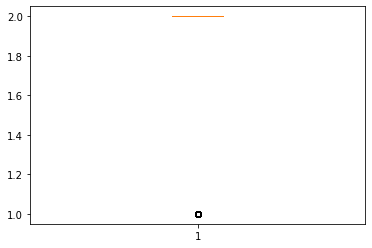

In [108]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x15']))
plt.show()

In [109]:
dfs['x15'].value_counts() # ほとんど2、binary、yと割合が近い？ x15,x24,x25の割合が近い

2    51023
1     1477
Name: x15, dtype: int64

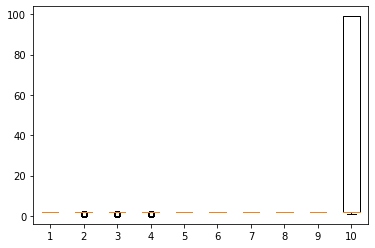

In [110]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x23'],dfs['x24'],dfs['x25'],dfs['x26'],dfs['x27'],dfs['x28'],dfs['x29'],dfs['x30'],dfs['x31'],dfs['x32']))
plt.show()

In [111]:
print(dfs['x23'].value_counts()) # 2のみ、一定値、他の値は？　そもそも学習に不要では？
print(dfs['x27'].value_counts()) # 同上
print(dfs['x28'].value_counts()) # 同上
print(dfs['x29'].value_counts()) # 同上
print(dfs['x30'].value_counts()) # 同上
print(dfs['x31'].value_counts()) # 同上

2    52500
Name: x23, dtype: int64
2    52500
Name: x27, dtype: int64
2    52500
Name: x28, dtype: int64
2    52500
Name: x29, dtype: int64
2    52500
Name: x30, dtype: int64
2    52500
Name: x31, dtype: int64


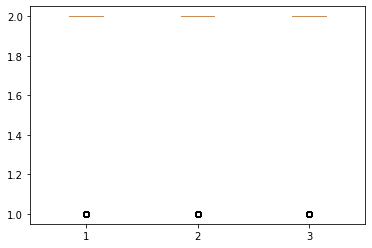

In [112]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x24'],dfs['x25'],dfs['x26']))
plt.show()

In [113]:
print(dfs['x24'].value_counts()) # ほとんど2、binary、yと割合が近い？、x15,x24,x25の割合が近い
print(dfs['x25'].value_counts()) # 同上
print(dfs['x26'].value_counts()) # 同上

2    50930
1     1570
Name: x24, dtype: int64
2    51189
1     1311
Name: x25, dtype: int64
2    52088
1      412
Name: x26, dtype: int64


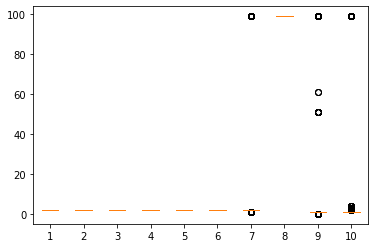

In [114]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x33'],dfs['x34'],dfs['x35'],dfs['x36'],dfs['x37'],dfs['x38'],dfs['x39'],dfs['x40'],dfs['x41'],dfs['x42']))
plt.show()

In [115]:
print(dfs['x33'].value_counts()) # 2のみ、一定値、他の値は？　そもそも学習に不要では？
print(dfs['x34'].value_counts()) # 同上
print(dfs['x35'].value_counts()) # 同上
print(dfs['x36'].value_counts()) # 同上
print(dfs['x37'].value_counts()) # 同上
print(dfs['x38'].value_counts()) # 同上

2    52500
Name: x33, dtype: int64
2    52500
Name: x34, dtype: int64
2    52500
Name: x35, dtype: int64
2    52500
Name: x36, dtype: int64
2    52500
Name: x37, dtype: int64
2    52500
Name: x38, dtype: int64


In [116]:
print(dfs['x40'].value_counts()) # 99のみ、一定値、他の値は？　そもそも学習に不要では？

99    52500
Name: x40, dtype: int64


In [117]:
print(dfs['x39'].value_counts()) # 99意味ありそう
print(dfs['x41'].value_counts()) # 51,61は何を意味している？誤り？　　99意味ありそう
print(dfs['x42'].value_counts()) # 99意味ありそう

2     40757
1     11397
99      346
Name: x39, dtype: int64
1     51125
0       824
99      529
51       19
61        3
Name: x41, dtype: int64
1     43848
3      5011
99     3483
2       149
4         9
Name: x42, dtype: int64


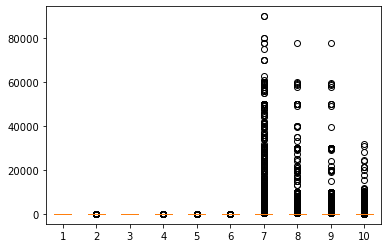

In [118]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x53'],dfs['x54'],dfs['x55'],dfs['x56'],dfs['x57'],dfs['x58'],dfs['x59'],dfs['x60'],dfs['x61'],dfs['x62']))
plt.show()

In [119]:
print(dfs['x53'].value_counts()) # binary
print(dfs['x55'].value_counts()) # 99 その他？

1    35240
2    17260
Name: x53, dtype: int64
99    34761
3      6978
2      5870
5      2705
4      1967
1       219
Name: x55, dtype: int64


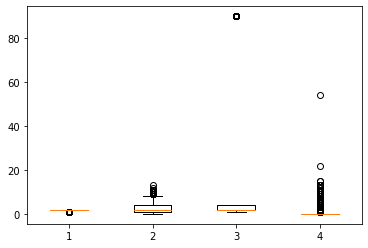

In [120]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x54'],dfs['x56'],dfs['x57'],dfs['x58']))
plt.show()

In [121]:
print(dfs['x54'].value_counts()) # binary、、yと割合が近い？
print(dfs['x56'].value_counts()) # 連続値、割合に差が大きい
print(dfs['x57'].value_counts()) # 90 その他？
print(dfs['x58'].value_counts()) # 54.0　意味はありそう？

2    52048
1      452
Name: x54, dtype: int64
1     16598
3     10386
2      9866
4      8836
5      4443
6      1243
0       640
7       329
8        98
9        40
10       16
11        3
13        1
12        1
Name: x56, dtype: int64
2     27611
4     19654
3      4484
90      399
1       352
Name: x57, dtype: int64
0.0     51732
1.0       387
2.0       136
3.0        78
4.0        54
5.0        28
6.0        21
7.0        18
8.0        13
9.0         9
13.0        8
10.0        5
12.0        4
11.0        3
15.0        2
22.0        1
54.0        1
Name: x58, dtype: int64


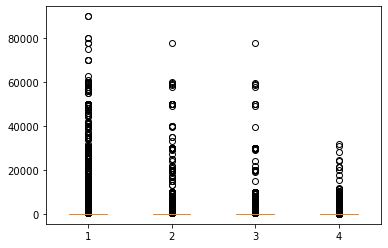

In [122]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x59'],dfs['x60'],dfs['x61'],dfs['x62']))
plt.show()

In [123]:
print(dfs['x59'].value_counts()) # 7600.0だけ多い、その他はまんべんなく
print(dfs['x60'].value_counts()) # 5000.0だけ多い、その他はまんべんなく、最大78000.0
print(dfs['x61'].value_counts()) # 3000.0だけ多い、その他はまんべんなく、最大78000.0
print(dfs['x62'].value_counts()) # [-1]は元欠損値、0が多い、その他はまんべんなく

0.0        51732
5000.0       109
10000.0       87
3000.0        83
1000.0        49
30000.0       33
20000.0       29
4000.0        28
50000.0       19
2000.0        18
8000.0        16
500.0         15
9000.0        12
6000.0        10
15000.0       10
60000.0        9
2500.0         8
7000.0         8
1500.0         7
35000.0        6
2600.0         6
4500.0         6
28000.0        5
48000.0        5
12000.0        5
25000.0        5
9600.0         5
40000.0        5
45000.0        5
6500.0         4
22000.0        4
8500.0         4
11000.0        4
36000.0        4
31000.0        3
24000.0        3
42000.0        3
34000.0        3
3500.0         3
39000.0        3
2400.0         3
70000.0        3
13000.0        3
4600.0         3
27000.0        3
7500.0         3
56000.0        3
29400.0        2
49000.0        2
48400.0        2
90000.0        2
14000.0        2
55000.0        2
59500.0        2
30300.0        2
1400.0         2
4800.0         2
23000.0        2
39600.0       

In [124]:
print(dfs['x59'].describe()) # max:90000.000000
print(dfs['x60'].describe()) # max:78000.000000
print(dfs['x61'].describe()) # max:78000.000000
print(dfs['x62'].describe()) # max:31754.264805

count    52500.00000
mean       213.51221
std       2686.08642
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      90000.00000
Name: x59, dtype: float64
count    52500.000000
mean       116.624762
std       1472.857276
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      78000.000000
Name: x60, dtype: float64
count    52500.000000
mean        76.712210
std       1111.344801
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      78000.000000
Name: x61, dtype: float64
count    52500.000000
mean        19.795427
std        448.495712
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max      31754.264805
Name: x62, dtype: float64


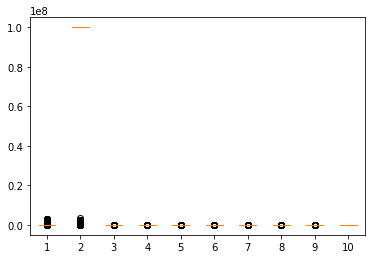

In [125]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x63'],dfs['x64'],dfs['x65'],dfs['x66'],dfs['x67'],dfs['x68'],dfs['x69'],dfs['x70'],dfs['x71'],dfs['x72']))
plt.show()

In [126]:
print(dfs['x63'].value_counts()) # まちまち
print(dfs['x69'].value_counts()) # 10000.0が多い
print(dfs['x70'].value_counts()) # 10000.0が多い

0.0          51732
28680.0          2
1220634.0        1
403743.0         1
117304.0         1
             ...  
17718.0          1
187.0            1
1395670.0        1
6987.0           1
1634570.0        1
Name: x63, Length: 768, dtype: int64
0.0        52274
10000.0       58
3000.0        40
5000.0        36
1000.0        25
20000.0        8
30000.0        8
8000.0         5
50000.0        5
6000.0         3
500.0          3
2000.0         2
29400.0        2
25000.0        2
40000.0        2
4800.0         2
2400.0         1
19100.0        1
58000.0        1
21000.0        1
2600.0         1
5200.0         1
1500.0         1
8300.0         1
33000.0        1
58900.0        1
4600.0         1
4300.0         1
4000.0         1
1600.0         1
49000.0        1
15000.0        1
35000.0        1
19600.0        1
4400.0         1
19700.0        1
39600.0        1
4500.0         1
3800.0         1
24000.0        1
59500.0        1
Name: x69, dtype: int64
0.0        52274
10000.0       58

In [127]:
print(dfs['x64'].value_counts()) # 1094285.0だけ多い、何を意味している？

99999999.0    51732
1572664.0         1
10603.0           1
2456783.0         1
2014574.0         1
              ...  
569438.0          1
514045.0          1
1269559.0         1
634572.0          1
106496.0          1
Name: x64, Length: 769, dtype: int64


In [128]:
print(dfs['x65'].value_counts()) # 4000.0だけ多い
print(dfs['x66'].value_counts()) # 5000.0だけ多い
print(dfs['x67'].value_counts()) # 6600.0だけ多い
print(dfs['x68'].value_counts()) # 1.0だけ多い
print(dfs['x71'].value_counts()) # 6600.0だけ多い
# 何を意味している？

0.0        51732
5000.0       145
1000.0       135
10000.0      131
3000.0       109
500.0         55
2000.0        36
4000.0        26
20000.0       11
30000.0        8
2500.0         7
1500.0         7
6000.0         6
2600.0         5
50000.0        4
9600.0         4
9000.0         4
8000.0         4
4600.0         4
700.0          3
1600.0         3
4800.0         3
17000.0        3
7000.0         3
1400.0         3
900.0          2
2300.0         2
3600.0         2
6400.0         2
29400.0        2
2400.0         2
1200.0         2
5400.0         1
40000.0        1
39600.0        1
1300.0         1
4700.0         1
21600.0        1
58000.0        1
5200.0         1
22000.0        1
3900.0         1
9300.0         1
4500.0         1
59500.0        1
49000.0        1
24000.0        1
7700.0         1
29100.0        1
9500.0         1
3500.0         1
16000.0        1
6900.0         1
3700.0         1
9400.0         1
2800.0         1
59000.0        1
4300.0         1
12500.0       

In [129]:
print(dfs['x72'].value_counts()) # 0のみ、学習に不要では？

0    52500
Name: x72, dtype: int64


In [130]:
# outlier detail
# x0_age：御長寿が少数いる。そのままとする。
# x1_term：長期契約期間が少数いる。そのままとする。
# x2_sex：99は「その他、未入力」、そのままとする。
# x3：離れているが、一定数存在する。そのままとする。
# x10：[99.0]年齢と相関がありそう。そのままとする。
# x5, x6：0,99が同数。意味ありそう。x5の0は99に置換すべき？
# x7,x8,x11,x12 [99]他の値と区別する値。そのままとする。
# x13 99一定数いる。そのまま。
# x39。[99]他の値と区別する値。そのまま。
# x41。51,61少数いるが、意味不明な値、残すべき？
# x42。99 一定数いる。そのまま。
# x55。[99]他の値と区別する値。そのまま。
# x56。[99]他の値と区別する値。そのまま。
# x57。[54]残すべき？

In [131]:
# unsolved
# 本当はどうするべき？　変換・修正すべきデータは？その根拠・基準をどこに求めるべき？

In [132]:
# Check Point!!
# 使える・使えない変数の識別
# 因果関係??
# 擬似相関、別の因果関係、相関がありそうでない

In [133]:
# TODO
# 散布図でデータを可視化
# 帰無仮説・対立仮説を立てる(相関がある・ない)
# 相関性評価
#   相関係数を計算する
#   変数組み合わせ時の説明力を確認する
#   検定表で相関があるかどうかを検定する
# 　　単一AUC
# 　　単体の説明力の評価（Importance）
# 　　相関係数で変数選択（絶対値の大小）
# 　　ランダム・フォレストによる相互作用評価(Importance)
# 　　他と組み合わせると強いものがあるか、弱くなるものがあるか
# 　　相関のある変数は組み合わせて新たな変数をつくれないか
# 特徴量の選択をする
# 新たな変数生成を検討する

In [134]:
# x14,x18,x19,x21,x22,x23,x27,x28,x29,x30,x31,x33,x34,x35,x36,x37,x38,x40,'x49',x72、以外

In [135]:
drop_col = ['x14','x18','x19','x21','x22','x23','x27','x28','x29','x30','x31','x33','x34','x35','x36','x37','x38','x40','x49','x72']
df_spray = df_proc.drop(drop_col, axis=1)
df_spray.columns
# 残しても精度に影響が出ないため、削除する

Index(['y', 'x0_age', 'x1_term', 'x2_sex', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x10', 'x11', 'x12', 'x13', 'x15', 'x16', 'x17', 'x20', 'x24', 'x25',
       'x26', 'x32', 'x39', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x48', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58',
       'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68',
       'x69', 'x70', 'x71', 'x9_C', 'x9_D', 'x9_H', 'x9_K', 'x9_N', 'x9_Q',
       'x9_R', 'x9_S', 'x9_T'],
      dtype='object')

In [136]:
# これまでの確認結果を踏まえ、以下をまずは散布図で確認する

# similar distribution
# x58, x62, X71
# x59, x68, x67
# x60, x61, x65, x66
# x63, x64 float
# x69, x70

# x5とx6、x10とx0
# x15,x24,x25の割合が近い、x41も？
# x16,x17,x20似ている？
# x53、x55　関係ある？

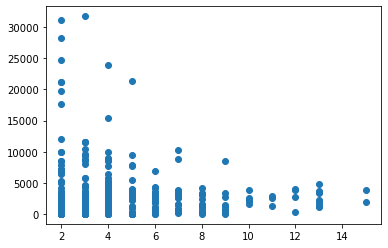

In [137]:
x = df_spray['x58'][df_spray['x58'] != 0][df_spray['x62'] != -1][df_spray['x58'] < 16]
y = df_spray['x62'][df_spray['x58'] != 0][df_spray['x62'] != -1][df_spray['x58'] < 16]
plt.scatter(x, y)

In [138]:
df_spray['x58'].value_counts()

0.0     51732
1.0       387
2.0       136
3.0        78
4.0        54
5.0        28
6.0        21
7.0        18
8.0        13
9.0         9
13.0        8
10.0        5
12.0        4
11.0        3
15.0        2
22.0        1
54.0        1
Name: x58, dtype: int64

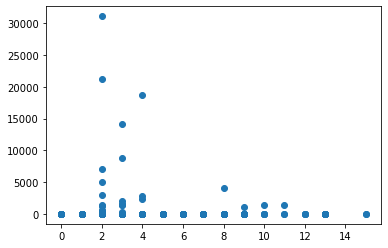

In [139]:
x = df_spray['x58'][df_spray['x58'] < 16]
y = df_spray['x71'][df_spray['x58'] < 16]
plt.scatter(x, y)

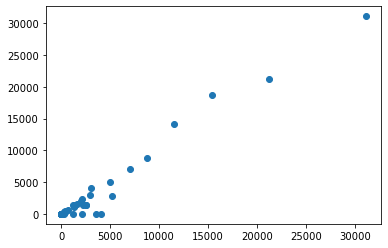

In [140]:
x = df_spray['x62'][df_spray['x62'] != -1][df_spray['x71'] != -1]
y = df_spray['x71'][df_spray['x62'] != -1][df_spray['x71'] != -1]
plt.scatter(x, y)
# 相関ありそう（y=0を除けば）

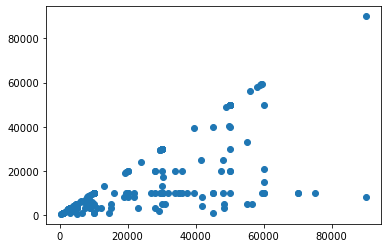

In [141]:
x = df_spray['x59'][df_spray['x59'] != 0][df_spray['x68'] != 0]
y = df_spray['x68'][df_spray['x59'] != 0][df_spray['x68'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、yが同じ値のものが多い）

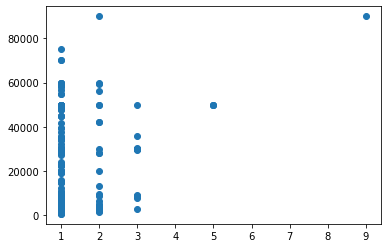

In [142]:
x = df_spray['x67'][df_spray['x67'] < 99]
y = df_spray['x59'][df_spray['x67'] < 99]
plt.scatter(x, y)

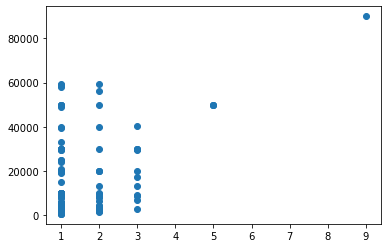

In [143]:
x = df_spray['x67'][df_spray['x67'] < 99]
y = df_spray['x68'][df_spray['x67'] < 99]
plt.scatter(x, y)

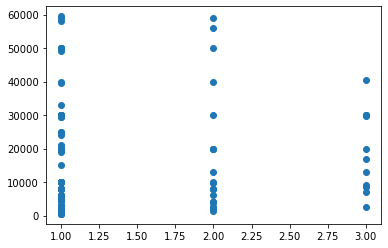

In [144]:
x = df_spray['x67'][df_spray['x67'] < 5][df_spray['x68'] < 80000]
y = df_spray['x68'][df_spray['x67'] < 5][df_spray['x68'] < 80000]
plt.scatter(x, y)

In [145]:
print(df_spray['x67'].value_counts())
# x=9のyは相関がある？外れ値では？

99.0    52274
1.0       186
2.0        24
3.0        12
5.0         3
9.0         1
Name: x67, dtype: int64


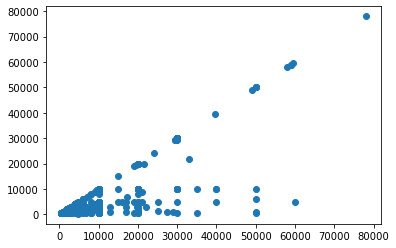

In [146]:
x = df_spray['x60'][df_spray['x60'] != 0][df_spray['x61'] != 0]
y = df_spray['x61'][df_spray['x60'] != 0][df_spray['x61'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

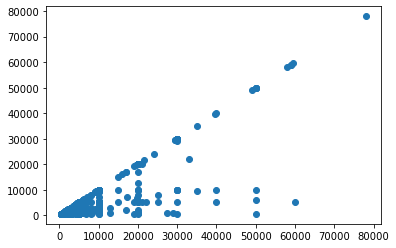

In [147]:
x = df_spray['x60'][df_spray['x60'] != 0][df_spray['x65'] != 0]
y = df_spray['x65'][df_spray['x60'] != 0][df_spray['x65'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

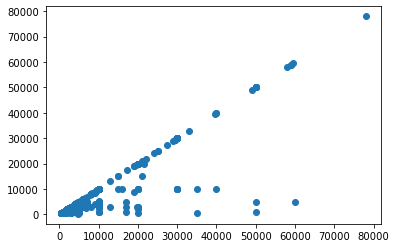

In [148]:
x = df_spray['x60'][df_spray['x60'] != 0][df_spray['x66'] != 0]
y = df_spray['x66'][df_spray['x60'] != 0][df_spray['x66'] != 0]
plt.scatter(x, y)

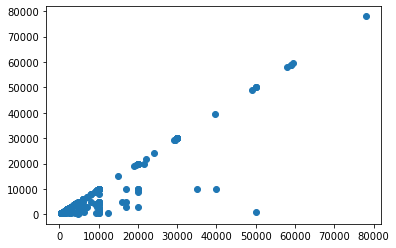

In [149]:
x = df_spray['x65'][df_spray['x65'] != 0][df_spray['x61'] != 0]
y = df_spray['x61'][df_spray['x65'] != 0][df_spray['x61'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

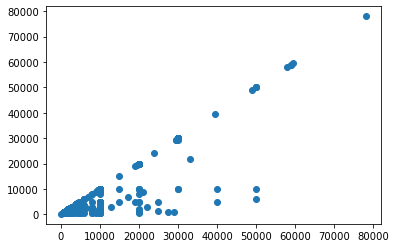

In [150]:
x = df_spray['x66'][df_spray['x66'] != 0][df_spray['x61'] != 0]
y = df_spray['x61'][df_spray['x66'] != 0][df_spray['x61'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

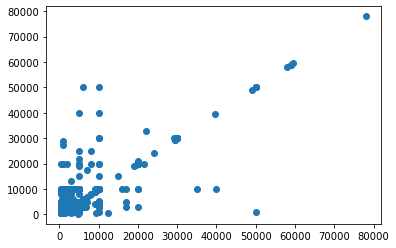

In [151]:
x = df_spray['x65'][df_spray['x65'] != 0][df_spray['x66'] != 0]
y = df_spray['x66'][df_spray['x65'] != 0][df_spray['x66'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

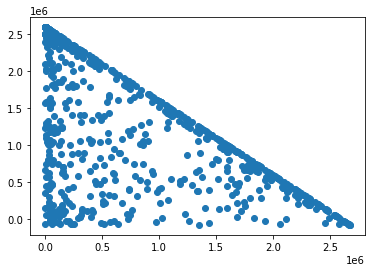

In [152]:
x = df_spray['x63'][df_spray['x64']<2676106]
y = df_spray['x64'][df_spray['x64']<2676106]
plt.scatter(x, y)
# 相関ありそう（三角形の下側はばらつきがある）

In [153]:
print(df_spray['x64'].value_counts())

99999999.0    51732
1572664.0         1
10603.0           1
2456783.0         1
2014574.0         1
              ...  
569438.0          1
514045.0          1
1269559.0         1
634572.0          1
106496.0          1
Name: x64, Length: 769, dtype: int64


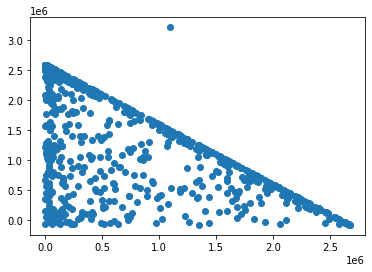

In [154]:
x = df_spray['x63'][df_spray['x64'] < 99999999]
y = df_spray['x64'][df_spray['x64'] < 99999999]
plt.scatter(x, y)
# 相関ありそう（三角形の下側はばらつきがある）

In [155]:
df_spray['x64'][df_spray['x64'] < 99999999.0].max()
# 最大値が外れ値の可能性が高い

3220710.0

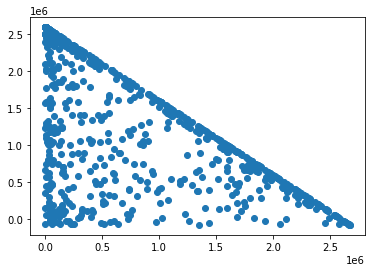

In [156]:
x = df_spray['x63'][df_spray['x64'] < 99999999][df_spray['x64'] < 3220710.0]
y = df_spray['x64'][df_spray['x64'] < 99999999][df_spray['x64'] < 3220710.0]
plt.scatter(x, y)
# 相関ありそう（三角形の下側はばらつきがある）

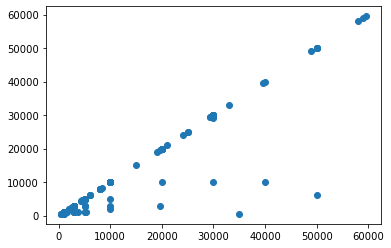

In [157]:
x = df_spray['x69'][df_spray['x69'] != 0][df_spray['x71'] != 0]
y = df_spray['x70'][df_spray['x69'] != 0][df_spray['x71'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

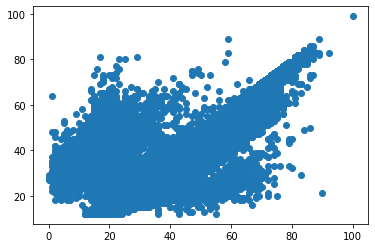

In [158]:
x = df_spray['x0_age']
y = df_spray['x10']
plt.scatter(x, y)
# 相関ありそう（かなりばらつきがある）

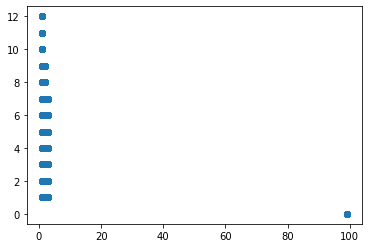

In [159]:
x = df_spray['x6']
y = df_spray['x5']
plt.scatter(x, y)

In [160]:
print(df_spray['x6'].value_counts())
print(df_spray['x5'].value_counts())
# x=99の場合、y=0

99    39389
1      8407
3      3057
2      1647
Name: x6, dtype: int64
0     39389
1      2813
11     1981
2      1507
10     1368
3      1026
9       825
4       794
5       716
8       702
6       692
7       676
12       11
Name: x5, dtype: int64


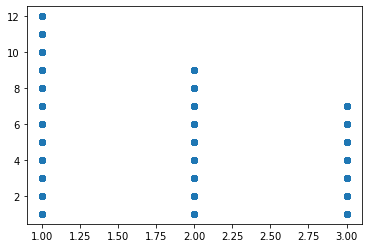

In [161]:
x = df_spray['x6'][df_spray['x6'] < 4]
y = df_spray['x5'][df_spray['x6'] < 4]
plt.scatter(x, y)
# x=2,3の場合、Y=8~12がない。関係はしていそう

In [162]:
# x = df_spray['x15']
# y = df_spray['x24']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [163]:
# x = df_spray['x15']
# y = df_spray['x25']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [164]:
# x = df_spray['x15'][df_spray['x41'] < 2]
# y = df_spray['x41'][df_spray['x41'] < 2]
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [165]:
# x = df_spray['x24']
# y = df_spray['x25']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [166]:
# df_spray['x41'].value_counts()

In [167]:
# x = df_spray['x24'][df_spray['x41'] < 2]
# y = df_spray['x41'][df_spray['x41'] < 2]
# plt.scatter(x, y)
# 51,61は不要ではないか
# binaryのデータでは、相関を散布図で読み取れない

In [168]:
# x = df_spray['x25'][df_spray['x41'] < 2]
# y = df_spray['x41'][df_spray['x41'] < 2]
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [169]:
# x = df_spray['x16']
# y = df_spray['x17']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [170]:
# x = df_spray['x16']
# y = df_spray['x20']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [171]:
# x = df_spray['x17']
# y = df_spray['x20']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [172]:
# x = df_spray['x53']
# y = df_spray['x55']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [173]:
# 帰無仮説（下記を相関ありと過程する）
# x0_age,x10
# x5,x6
# x59,x67
# x59,x68
# x60,x61
# x60,x65
# x60,x66
# x61,x65
# x61,x66
# x65,x66
# x62,x71
# x63,x64
# x69,x70

In [174]:
# 相関行列
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='kendall') # pearson, kendall, spearman
corr_matrix

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x46,x47,x48,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T
y,1.000000,-0.034157,-0.137548,-0.037202,0.096381,-0.071414,0.136083,-0.145400,0.015766,0.004765,-0.007430,0.015847,0.007772,0.044782,0.015867,0.008022,0.000009,0.028109,0.007752,0.028333,0.009750,-0.016897,0.055599,0.069840,0.143155,0.144601,0.167800,0.018908,NaN,NaN,NaN,NaN,NaN,-0.007823,-0.004361,-0.001429,-0.032417,-0.105914,-0.105528,0.069304,0.069218,0.069253,0.069346,0.037707,0.069340,-0.069166,0.069363,0.069252,-0.046725,0.046715,0.046707,0.046697,0.039202,-0.015279,-0.003733,-0.009268,-0.012391,-0.009332,0.000669,-0.007405,-0.007197,0.033201
x0_age,-0.034157,1.000000,0.130631,-0.013167,-0.051030,-0.046796,-0.047931,0.052191,0.004048,0.010581,0.507750,0.010227,0.002579,0.012668,0.012861,-0.047327,-0.003103,-0.044394,-0.019460,-0.021887,-0.021715,0.041355,0.005113,-0.047591,0.051695,0.037426,0.058986,0.034370,NaN,NaN,NaN,NaN,NaN,-0.210039,-0.047881,0.008422,-0.108786,0.044525,0.029985,0.007304,0.007387,0.007397,0.007424,0.003654,0.007240,-0.007289,0.007404,0.007438,-0.007737,0.007724,0.007728,0.007737,-0.001910,0.010443,0.010211,0.003819,0.000786,0.012662,-0.003337,-0.003733,0.003631,-0.017001
x1_term,-0.137548,0.130631,1.000000,-0.031040,0.092547,-0.392056,0.040520,-0.028111,-0.141886,-0.076347,-0.152397,-0.207827,-0.193580,-0.238138,-0.026792,0.075439,-0.169300,-0.123364,-0.079320,-0.061394,-0.035689,-0.070989,-0.158450,-0.121419,-0.341493,-0.349194,-0.280020,0.373503,NaN,NaN,NaN,NaN,NaN,0.048766,0.082436,-0.021591,0.121390,0.671357,-0.026823,-0.016849,-0.016758,-0.016756,-0.016748,-0.012384,-0.016857,0.016807,-0.016763,-0.016740,0.008118,-0.008113,-0.008111,-0.008105,-0.007937,0.088296,-0.004732,0.032142,-0.002934,0.024262,-0.015255,0.029507,0.004657,-0.082600
x2_sex,-0.037202,-0.013167,-0.031040,1.000000,0.087349,0.045601,-0.047824,0.047838,-0.013756,-0.019343,0.000078,0.002191,0.007175,-0.001770,-0.035871,0.019306,0.065039,0.019877,0.012845,0.006295,0.009256,-0.009869,-0.005986,0.015469,-0.007272,-0.010115,0.003353,-0.005782,NaN,NaN,NaN,NaN,NaN,0.076076,0.019447,-0.007944,0.036474,-0.033181,0.063269,-0.049188,-0.049187,-0.049185,-0.049181,-0.037140,-0.049082,0.049111,-0.049188,-0.049167,0.026471,-0.026452,-0.026451,-0.026451,-0.012118,-0.024849,0.009187,-0.006497,0.004513,-0.011224,0.007573,-0.003086,0.006567,0.012723
x3,0.096381,-0.051030,0.092547,0.087349,1.000000,-0.179202,0.053515,-0.053456,0.000187,-0.010463,-0.164372,0.002219,-0.006672,-0.030465,0.000077,0.009153,-0.038294,-0.006394,-0.017185,0.010815,0.006312,-0.003709,-0.021512,0.029556,0.003336,-0.000486,0.030826,0.086894,NaN,NaN,NaN,NaN,NaN,-0.004931,0.038200,-0.005715,0.014178,0.070295,-0.019795,0.003467,0.003448,0.003465,0.003505,-0.001682,0.003576,-0.003545,0.003479,0.003501,-0.002605,0.002584,0.002587,0.002593,-0.006064,-0.062713,0.002620,-0.040866,-0.001400,0.050639,0.010905,-0.034010,-0.000848,0.042912
x4,-0.071414,-0.046796,-0.392056,0.045601,-0.179202,1.000000,-0.088220,0.083521,0.110070,0.022653,0.115969,0.259612,0.090833,0.137899,-0.022637,-0.033840,0.130987,0.096356,0.035927,0.020602,0.014573,0.045514,0.076806,0.020054,0.140450,0.170069,0.010847,-0.271389,NaN,NaN,NaN,NaN,NaN,0.063189,-0.069219,0.010483,-0.089906,-0.367332,0.101840,-0.000350,-0.000328,-0.000336,-0.000398,0.004170,-0.000443,0.000412,-0.000362,-0.000384,0.001829,-0.001819,-0.001818,-0.001821,-0.002392,-0.098981,-0.000388,-0.035947,-0.004742,-0.035173,0.004678,-0.028293,0.001107,0.108502
x5,0.136083,-0.047931,0.040520,-0.047824,0.053515,-0.088220,1.000000,-0.947431,0.011012,0.006583,-0.073287,0.027089,-0.106357,-0.015268,0.005167,0.104162,-0.100617,-0.068405,0.001712,0.024319,-0.016785,-0.100653,0.056970,-0.024853,-0.080756,-0.079529,-0.098765,0.009414,NaN,NaN,NaN,NaN,NaN,0.018121,-0.022219,-0.005824,0.067135,0.089640,-0.32961

In [175]:
# 目的変数に対する変数単体の相関係数
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='kendall')
# pearson：積率相関係数、パラメトリック、正規分布
# kendall, spearman：順位相関係数、ノンパラメトリック、非正規分布
corr_matrix['y'][corr_matrix['y'].abs() > 0.1]

y          1.000000
x1_term   -0.137548
x5         0.136083
x6        -0.145400
x42        0.143155
x43        0.144601
x44        0.167800
x56       -0.105914
x57       -0.105528
Name: y, dtype: float64

In [176]:
# 目的変数に対する変数単体の相関係数
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='spearman')
corr_matrix['y'][corr_matrix['y'].abs() > 0.1]

y          1.000000
x1_term   -0.167816
x3         0.102011
x5         0.143785
x6        -0.150053
x42        0.146073
x43        0.147110
x44        0.167800
x56       -0.118328
x57       -0.109556
Name: y, dtype: float64

In [177]:
# 相関行列
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='kendall') # pearson, kendall, spearman
corr_matrix[:][(corr_matrix.abs() > 0.5)]

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x46,x47,x48,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T
y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x0_age,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1_term,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2_sex,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x5,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.947431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x6,NaN,NaN,NaN,NaN,NaN,NaN,-0.947431,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# 相関行列
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='spearman') # pearson, kendall, spearman
corr_matrix[:][(corr_matrix.abs() > 0.5)]

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x46,x47,x48,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T
y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x0_age,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1_term,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2_sex,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x5,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.990707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x6,NaN,NaN,NaN,NaN,NaN,NaN,-0.990707,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
# 相関行列
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='spearman') # pearson, kendall, spearman
corr_matrix[:][(corr_matrix.abs() > 0.5)]

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x46,x47,x48,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T
y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x0_age,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1_term,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2_sex,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x5,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.990707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x6,NaN,NaN,NaN,NaN,NaN,NaN,-0.990707,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
corr = df_spray.corr().abs() # 絶対値で並び替え
st = corr.unstack()
st_sort = st.sort_values(kind="quicksort", ascending=False)
pd.set_option('display.max_rows', 500)
print(st_sort.shape)
print(st_sort[47:247])

(3844,)
x24      x24        1.000000
x25      x25        1.000000
x26      x26        1.000000
x32      x32        1.000000
x39      x39        1.000000
x41      x41        1.000000
x42      x42        1.000000
x9_R     x9_R       1.000000
x52      x52        1.000000
y        y          1.000000
x43      x45        0.998910
x45      x43        0.998910
x44      x42        0.976640
x42      x44        0.976640
x13      x12        0.965232
x12      x13        0.965232
x32      x16        0.965146
x16      x32        0.965146
x65      x61        0.955743
x61      x65        0.955743
x69      x70        0.954090
x70      x69        0.954090
x60      x66        0.927017
x66      x60        0.927017
x68      x69        0.911793
x69      x68        0.911793
x42      x43        0.908090
x43      x42        0.908090
x61      x66        0.905920
x66      x61        0.905920
x42      x45        0.905156
x45      x42        0.905156
x44      x43        0.886663
x43      x44        0.886663
x45   

In [181]:
# 帰無仮説（下記を相関ありと過程する）
# x0_age,x10
# x5,x6
# x59,x67
# x59,x68
# x60,x61
# x60,x65
# x60,x66
# x61,x65
# x61,x66
# x62,x71
# x63,x64
# x65,x66
# x69,x70

In [182]:
# 相関係数
# x0_age   x10        0.654448
# x5       x6         0.790922
# x59      x67        0.499071
# x59      x68        0.577026
# x60      x61        0.837955
# x60      x65        0.878183
# x60      x66        0.927017
# x61      x65        0.955743
# x61      x66        0.905920
# x62      x71        0.434522
# x63      x64        0.707551
# x65      x66        0.875893
# x69      x70        0.954090

In [183]:
# strong correlation
# x0_age ⇆ x10, x56
# x5 ⇆ x6
# x12 ⇆ x13：NaN
# x16 ⇆ x32：0.956657, x39：-0.702893 ←相関なし
# x42 ⇆ x43：-0.949907, x44：-0.676321 ←相関あり
# x43 ⇆ x44：-0.562745 ←相関なし
# x58 ⇆ x59 ←微妙
# x59 ⇆ x58, x60, x66, x68, x69, x70
# x60 ⇆ x59, x61, x62, x65, x66, 
# x61 ⇆ x61, x65, x68, x69, x70
# x62 ⇆ x60, x66, x69, x71, x68, x69, x70, x71
# x63 ⇆ x64
# x64 ⇆ x63
# x65 ⇆ x60, x61, x65, x66, x68, x69, x70
# x66 ⇆ x59, x60, x61, x62, x65, x66, x68, x69, x70
# x68 ⇆ x59, x60, x61, x65, x66, x68, x69, x70
# x69 ⇆ x59, x60, x61, x62, x65, x66, x68, x69, x70, x71
# x70 ⇆ x59, x60, x61, x65, x66, x68, x69, x70
# x71 ⇆ , x60, x62, x66, x69, x71

In [184]:
# 相関係数
# x0_age,x10：-0.609904
# x5,x6：0.990707
# x59,x67：-0.807815
# x59,x68：-0.786478
# x60,x61：-0.644961
# x60,x65：-0.731051
# x60,x66：-0.882849
# x61,x65：-0.914880
# x61,x66：-0.763164
# x62,x71：-0.810233
# x63,x64：0.614577
# x65,x66：-0.721186
# x69,x70：-0.924053

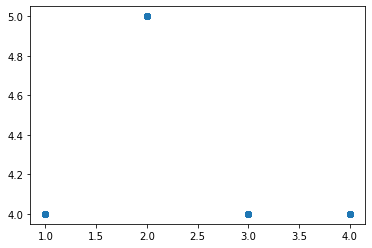

In [185]:
x = df_spray['x12'][df_spray['x13'] < 99][df_spray['x12'] < 99]
y = df_spray['x13'][df_spray['x13'] < 99][df_spray['x12'] < 99]
plt.scatter(x, y)
# 値が固定値で連動している。因果関係がありそう（例：x=1の時、y=4）

In [186]:
print(df_spray['x12'].value_counts())
print(df_spray['x13'].value_counts())

2     24103
99    16214
4     11755
3       262
1       166
Name: x12, dtype: int64
5     24405
99    15608
4     12156
1       234
3        49
2        48
Name: x13, dtype: int64


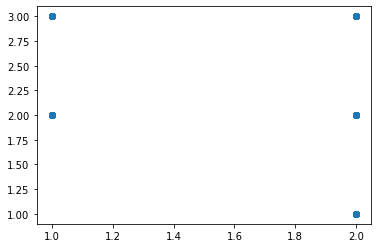

In [187]:
x = df_spray['x16'][df_spray['x16'] < 99][df_spray['x32'] < 99]
y = df_spray['x32'][df_spray['x16'] < 99][df_spray['x32'] < 99]
plt.scatter(x, y)
# 相関はないのでは。

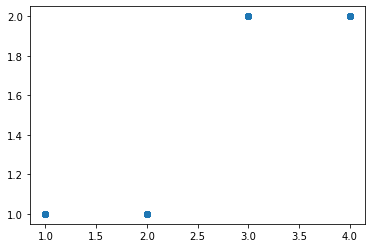

In [188]:
x = df_spray['x42'][df_spray['x43']<99][df_spray['x42']<99]
y = df_spray['x43'][df_spray['x43']<99][df_spray['x42']<99]
plt.scatter(x, y)
# 値が連動している。

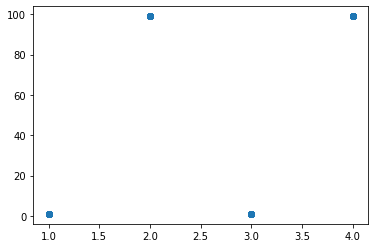

In [189]:
x = df_spray['x42'][df_spray['x42']<99]
y = df_spray['x44'][df_spray['x42']<99]
plt.scatter(x, y)
# 値が連動している

In [190]:
# 特徴量生成、最適化
# 相関のある変数は組み合わせて新たな変数をつくれないか
# 単一：対数・2乗・標準化・ロジット変数・差分
# 組み合わせ：積・差・和・比・主成分・距離
# 分割、結合・変換・相互作用、加算、除算、乗算、頻度エンコード、集計・グループ統計、標準化・正規化

In [191]:
# 検討対象
# x0_age,x10
# x5,x6
# x59,x67
# x59,x68
# x60,x61
# x60,x65
# x60,x66
# x61,x65
# x61,x66
# x62,x71
# x63,x64
# x65,x66
# x69,x70

In [192]:
print(df_spray[['x0_age','x10']].head(10))
# 一致、近い値もあるが、差が大きな値もある
print('='*50)
print(df_spray['x0_age'].value_counts())
print('='*50)
print(df_spray['x10'].value_counts())
print('='*50)
# 年齢に関係する相関。組み合わせでなく、他項目と相関の高い方を特徴量から除外する
# 他項目との相関NaN、重要度の低い方を除外する。
# x10を除外

   x0_age   x10
0    22.0  22.0
1    49.0  46.0
2    22.0  21.0
3    34.0  32.0
4    26.0  18.0
5    51.0  31.0
6    22.0  19.0
7    40.0  30.0
8    47.0  29.0
9    41.0  40.0
34.0     2141
24.0     1735
25.0     1726
26.0     1724
22.0     1634
23.0     1621
27.0     1604
28.0     1592
29.0     1570
30.0     1479
31.0     1466
32.0     1452
33.0     1427
36.0     1386
35.0     1351
21.0     1343
37.0     1318
38.0     1296
41.0     1253
39.0     1239
42.0     1233
20.0     1220
40.0     1197
43.0     1170
45.0     1093
44.0     1084
46.0      995
47.0      961
19.0      941
48.0      866
49.0      844
51.0      778
50.0      684
52.0      634
18.0      631
53.0      589
55.0      533
54.0      527
56.0      467
57.0      431
17.0      423
16.0      382
58.0      374
60.0      350
59.0      323
61.0      312
62.0      254
15.0      228
63.0      221
66.0      213
65.0      213
64.0      202
67.0      181
68.0      180
14.0      160
69.0      115
13.0      112
70.0       69
72.0       6

0     39389
1      2813
11     1981
2      1507
10     1368
3      1026
9       825
4       794
5       716
8       702
6       692
7       676
12       11
Name: x5, dtype: int64
99    39389
1      8407
3      3057
2      1647
Name: x6, dtype: int64
0    39389
1     8407
3     3057
2     1647
Name: x6, dtype: int64


(array([   0., 8407., 1647., 3057.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([ 0.   ,  0.755,  1.51 ,  2.265,  3.02 ,  3.775,  4.53 ,  5.285,
         6.04 ,  6.795,  7.55 ,  8.305,  9.06 ,  9.815, 10.57 , 11.325,
        12.08 , 12.835, 13.59 , 14.345, 15.1  ]),
 <BarContainer object of 20 artists>)

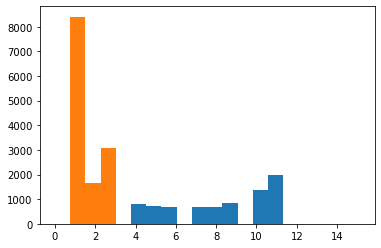

In [193]:
print(df_spray['x5'].value_counts())
print('='*50)
print(df_spray['x6'].value_counts())
print('='*50)
# 相関があるが、同数の項目値が0⇆99と異なる。「x6」は99→0へ変換する。
df_spray['x6'] = df_spray['x6'].replace(99, 0)
print(df_spray['x6'].value_counts())

plt.hist(df_spray['x5'][df_spray['x5']>0], bins=20, range=(0,15.10))
plt.hist(df_spray['x6'][df_spray['x6']>0], bins=20, range=(0,15.10))

         x59   x67
47    5000.0   1.0
78   30000.0   1.0
79    1000.0  99.0
82    1000.0   1.0
133  12000.0  99.0
143   3000.0  99.0
150   9500.0  99.0
171   9000.0  99.0
218  10000.0  99.0
309  10000.0  99.0
0.0        51732
5000.0       109
10000.0       87
3000.0        83
1000.0        49
30000.0       33
20000.0       29
4000.0        28
50000.0       19
2000.0        18
8000.0        16
500.0         15
9000.0        12
6000.0        10
15000.0       10
60000.0        9
2500.0         8
7000.0         8
1500.0         7
35000.0        6
2600.0         6
4500.0         6
28000.0        5
48000.0        5
12000.0        5
25000.0        5
9600.0         5
40000.0        5
45000.0        5
6500.0         4
22000.0        4
8500.0         4
11000.0        4
36000.0        4
31000.0        3
24000.0        3
42000.0        3
34000.0        3
3500.0         3
39000.0        3
2400.0         3
70000.0        3
13000.0        3
4600.0         3
27000.0        3
7500.0         3
56000.0  

(array([226.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([    0.   ,   500.005,  1000.01 ,  1500.015,  2000.02 ,  2500.025,
         3000.03 ,  3500.035,  4000.04 ,  4500.045,  5000.05 ,  5500.055,
         6000.06 ,  6500.065,  7000.07 ,  7500.075,  8000.08 ,  8500.085,
         9000.09 ,  9500.095, 10000.1  ]),
 <BarContainer object of 20 artists>)

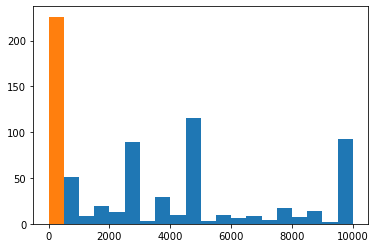

In [194]:
# x59,x67
print(df_spray[['x59','x67']][df_spray['x59']>0].head(10))
print('='*50)
print(df_spray['x59'].value_counts())
print('='*50)
print(df_spray['x67'].value_counts())
print('='*50)
# 相関があるが、同数の項目値が0⇆99と異なる。「x6」は99→0へ変換する。
df_spray['x67'] = df_spray['x67'].replace(99, 0)

plt.hist(df_spray['x59'][df_spray['x59']>0], bins=20, range=(0,10000.10))
plt.hist(df_spray['x67'][df_spray['x67']>0], bins=20, range=(0,10000.10)) 

         x59      x68
47    5000.0    500.0
78   30000.0  30000.0
79    1000.0      0.0
82    1000.0   1000.0
133  12000.0      0.0
143   3000.0      0.0
150   9500.0      0.0
171   9000.0      0.0
218  10000.0      0.0
309  10000.0      0.0
0.0        51732
5000.0       109
10000.0       87
3000.0        83
1000.0        49
30000.0       33
20000.0       29
4000.0        28
50000.0       19
2000.0        18
8000.0        16
500.0         15
9000.0        12
6000.0        10
15000.0       10
60000.0        9
2500.0         8
7000.0         8
1500.0         7
35000.0        6
2600.0         6
4500.0         6
28000.0        5
48000.0        5
12000.0        5
25000.0        5
9600.0         5
40000.0        5
45000.0        5
6500.0         4
22000.0        4
8500.0         4
11000.0        4
36000.0        4
31000.0        3
24000.0        3
42000.0        3
34000.0        3
3500.0         3
39000.0        3
2400.0         3
70000.0        3
13000.0        3
4600.0         3
27000.0   

(array([77., 48., 49.,  2., 14.,  3., 13.,  1.,  4.,  0.,  1.,  8.,  2.,
         3.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0.   ,  4500.005,  9000.01 , 13500.015, 18000.02 , 22500.025,
        27000.03 , 31500.035, 36000.04 , 40500.045, 45000.05 , 49500.055,
        54000.06 , 58500.065, 63000.07 , 67500.075, 72000.08 , 76500.085,
        81000.09 , 85500.095, 90000.1  ]),
 <BarContainer object of 20 artists>)

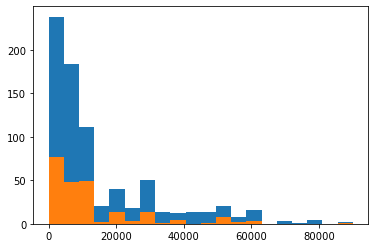

In [195]:
# x59,x68
print(df_spray[['x59','x68']][df_spray['x59']>0].head(10))
print('='*50)
print(df_spray['x59'].value_counts())
print('='*50)
print(df_spray['x68'].value_counts())
print('='*50)
plt.hist(df_spray['x59'][df_spray['x59']>0], bins=20, range=(0,90000.10))
plt.hist(df_spray['x68'][df_spray['x68']>0], bins=20, range=(0,90000.10))

         x60      x61
47    3000.0    500.0
78   30000.0  30000.0
79    1000.0   1000.0
82    1000.0   1000.0
133   3000.0   3000.0
143   3000.0   3000.0
150   5000.0    500.0
171   2000.0   1000.0
218  10000.0  10000.0
309  10000.0  10000.0
0.0        51732
10000.0      191
5000.0       153
3000.0       125
1000.0        77
20000.0       24
4000.0        21
2000.0        20
500.0         16
30000.0       15
8000.0         8
6000.0         7
50000.0        7
1500.0         6
2500.0         5
1400.0         5
2600.0         5
4600.0         4
9000.0         4
17000.0        3
2300.0         3
15000.0        3
9600.0         3
40000.0        3
7000.0         3
4800.0         3
29400.0        2
19000.0        2
25000.0        2
35000.0        2
4500.0         2
6400.0         2
1600.0         2
13000.0        2
2400.0         2
900.0          2
21000.0        2
19100.0        1
7700.0         1
6800.0         1
8300.0         1
33000.0        1
5200.0         1
58000.0        1
9300.0    

(array([411., 187.,  11., 126.,   1.,   0.,   9.,   2.,   0.,  11.,   0.,
          0.,   0.,   1.,   0.,   0.,   4.,   0.,   0.,   4.]),
 array([    0.   ,  3000.005,  6000.01 ,  9000.015, 12000.02 , 15000.025,
        18000.03 , 21000.035, 24000.04 , 27000.045, 30000.05 , 33000.055,
        36000.06 , 39000.065, 42000.07 , 45000.075, 48000.08 , 51000.085,
        54000.09 , 57000.095, 60000.1  ]),
 <BarContainer object of 20 artists>)

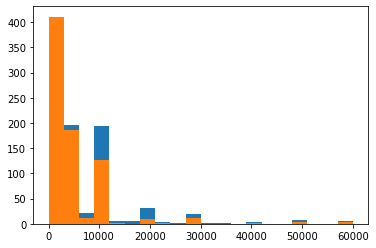

In [196]:
# x60,x61
print(df_spray[['x60','x61']][df_spray['x60']>0].head(10))
print('='*50)
print(df_spray['x60'].value_counts())
print('='*50)
print(df_spray['x61'].value_counts())
print('='*50)
plt.hist(df_spray['x60'][df_spray['x60']>0], bins=20, range=(0,60000.10))
plt.hist(df_spray['x61'][df_spray['x61']>0], bins=20, range=(0,60000.10))
# x60⇆x61の相関係数あまり差がない、重要度の低い方を除外する。
# x60の方が若干高い。x61を除外する。
# 分布がほぼ同じ特徴量は、削除せず残した方が結果的に効果があるのか？？

         x60      x65
47    3000.0   3000.0
78   30000.0  30000.0
79    1000.0   1000.0
82    1000.0   1000.0
133   3000.0   3000.0
143   3000.0   3000.0
150   5000.0    500.0
171   2000.0   1000.0
218  10000.0  10000.0
309  10000.0  10000.0
0.0        51732
10000.0      191
5000.0       153
3000.0       125
1000.0        77
20000.0       24
4000.0        21
2000.0        20
500.0         16
30000.0       15
8000.0         8
6000.0         7
50000.0        7
1500.0         6
2500.0         5
1400.0         5
2600.0         5
4600.0         4
9000.0         4
17000.0        3
2300.0         3
15000.0        3
9600.0         3
40000.0        3
7000.0         3
4800.0         3
29400.0        2
19000.0        2
25000.0        2
35000.0        2
4500.0         2
6400.0         2
1600.0         2
13000.0        2
2400.0         2
900.0          2
21000.0        2
19100.0        1
7700.0         1
6800.0         1
8300.0         1
33000.0        1
5200.0         1
58000.0        1
9300.0    

(array([374., 195.,  15., 138.,   2.,   4.,  13.,   3.,   0.,  11.,   0.,
          1.,   0.,   2.,   0.,   0.,   5.,   0.,   0.,   4.]),
 array([    0.   ,  3000.005,  6000.01 ,  9000.015, 12000.02 , 15000.025,
        18000.03 , 21000.035, 24000.04 , 27000.045, 30000.05 , 33000.055,
        36000.06 , 39000.065, 42000.07 , 45000.075, 48000.08 , 51000.085,
        54000.09 , 57000.095, 60000.1  ]),
 <BarContainer object of 20 artists>)

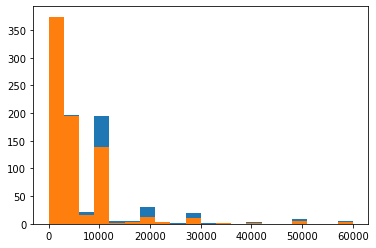

In [197]:
# x60,x65
print(df_spray[['x60','x65']][df_spray['x60']>0].head(10))
print('='*50)
print(df_spray['x60'].value_counts())
print('='*50)
print(df_spray['x65'].value_counts())
print('='*50)
plt.hist(df_spray['x60'][df_spray['x60']>0], bins=20, range=(0,60000.10))
plt.hist(df_spray['x65'][df_spray['x65']>0], bins=20, range=(0,60000.10))
# x60⇆x65の相関係数あまり差がない、重要度の低い方を除外する。
# x60の方が若干高い。x65を除外する。
# 分布がほぼ同じ特徴量は、削除せず残した方が結果的に効果があるのか？？

         x60      x66
47    3000.0    500.0
78   30000.0  30000.0
79    1000.0   1000.0
82    1000.0   1000.0
133   3000.0   3000.0
143   3000.0   3000.0
150   5000.0   5000.0
171   2000.0   1000.0
218  10000.0  10000.0
309  10000.0  10000.0
0.0        51732
10000.0      191
5000.0       153
3000.0       125
1000.0        77
20000.0       24
4000.0        21
2000.0        20
500.0         16
30000.0       15
8000.0         8
6000.0         7
50000.0        7
1500.0         6
2500.0         5
1400.0         5
2600.0         5
4600.0         4
9000.0         4
17000.0        3
2300.0         3
15000.0        3
9600.0         3
40000.0        3
7000.0         3
4800.0         3
29400.0        2
19000.0        2
25000.0        2
35000.0        2
4500.0         2
6400.0         2
1600.0         2
13000.0        2
2400.0         2
900.0          2
21000.0        2
19100.0        1
7700.0         1
6800.0         1
8300.0         1
33000.0        1
5200.0         1
58000.0        1
9300.0    

(array([317., 200.,  15., 176.,   4.,   1.,  21.,   2.,   2.,  15.,   1.,
          0.,   0.,   3.,   0.,   0.,   6.,   0.,   0.,   4.]),
 array([    0.   ,  3000.005,  6000.01 ,  9000.015, 12000.02 , 15000.025,
        18000.03 , 21000.035, 24000.04 , 27000.045, 30000.05 , 33000.055,
        36000.06 , 39000.065, 42000.07 , 45000.075, 48000.08 , 51000.085,
        54000.09 , 57000.095, 60000.1  ]),
 <BarContainer object of 20 artists>)

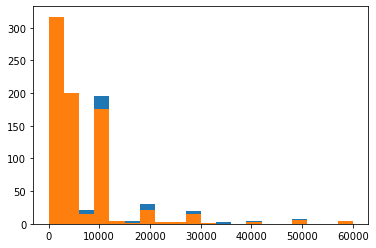

In [198]:
# x60,x66
print(df_spray[['x60','x66']][df_spray['x60']>0].head(10))
print('='*50)
print(df_spray['x60'].value_counts())
print('='*50)
print(df_spray['x66'].value_counts())
print('='*50)
plt.hist(df_spray['x60'][df_spray['x60']>0], bins=20, range=(0,60000.10))
plt.hist(df_spray['x66'][df_spray['x66']>0], bins=20, range=(0,60000.10))
# x60⇆x66の相関係数あまり差がない、重要度の低い方を除外する。
# x60の方が若干高い。x66を除外する。
# 分布がほぼ同じ特徴量は、削除せず残した方が結果的に効果があるのか？？

   x61  x65
0  0.0  0.0
1  0.0  0.0
2  0.0  0.0
3  0.0  0.0
4  0.0  0.0
5  0.0  0.0
6  0.0  0.0
7  0.0  0.0
8  0.0  0.0
9  0.0  0.0
0.0        51732
1000.0       152
5000.0       141
10000.0      121
3000.0       113
500.0         79
2000.0        35
4000.0        28
30000.0        8
1500.0         8
20000.0        7
2600.0         5
6000.0         5
9600.0         4
8000.0         4
4600.0         4
9000.0         4
2500.0         4
900.0          3
50000.0        3
2300.0         2
4800.0         2
7000.0         2
2400.0         2
29400.0        2
1400.0         2
1600.0         2
58000.0        1
3900.0         1
29100.0        1
39600.0        1
9300.0         1
4500.0         1
1800.0         1
49000.0        1
7700.0         1
19100.0        1
59000.0        1
191.0          1
58900.0        1
4300.0         1
1200.0         1
24000.0        1
3700.0         1
700.0          1
3500.0         1
78000.0        1
15000.0        1
19600.0        1
22000.0        1
3600.0         1
4

(array([51732.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([  0.   ,   5.005,  10.01 ,  15.015,  20.02 ,  25.025,  30.03 ,
         35.035,  40.04 ,  45.045,  50.05 ,  55.055,  60.06 ,  65.065,
         70.07 ,  75.075,  80.08 ,  85.085,  90.09 ,  95.095, 100.1  ]),
 <BarContainer object of 20 artists>)

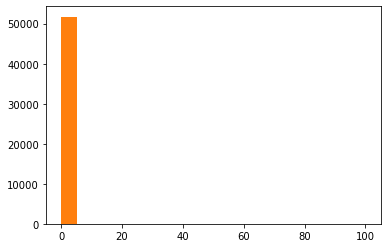

In [199]:
# x61,x65
print(df_spray[['x61','x65']].head(10))
print('='*50)
print(df_spray['x61'].value_counts())
print('='*50)
print(df_spray['x65'].value_counts())
print('='*50)
plt.hist(df_spray['x61'], bins=20, range=(0,100.10))
plt.hist(df_spray['x65'], bins=20, range=(0,100.10))
# 両者削除

   x61  x66
0  0.0  0.0
1  0.0  0.0
2  0.0  0.0
3  0.0  0.0
4  0.0  0.0
5  0.0  0.0
6  0.0  0.0
7  0.0  0.0
8  0.0  0.0
9  0.0  0.0
0.0        51732
1000.0       152
5000.0       141
10000.0      121
3000.0       113
500.0         79
2000.0        35
4000.0        28
30000.0        8
1500.0         8
20000.0        7
2600.0         5
6000.0         5
9600.0         4
8000.0         4
4600.0         4
9000.0         4
2500.0         4
900.0          3
50000.0        3
2300.0         2
4800.0         2
7000.0         2
2400.0         2
29400.0        2
1400.0         2
1600.0         2
58000.0        1
3900.0         1
29100.0        1
39600.0        1
9300.0         1
4500.0         1
1800.0         1
49000.0        1
7700.0         1
19100.0        1
59000.0        1
191.0          1
58900.0        1
4300.0         1
1200.0         1
24000.0        1
3700.0         1
700.0          1
3500.0         1
78000.0        1
15000.0        1
19600.0        1
22000.0        1
3600.0         1
4

(array([51732.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([  0.   ,   5.005,  10.01 ,  15.015,  20.02 ,  25.025,  30.03 ,
         35.035,  40.04 ,  45.045,  50.05 ,  55.055,  60.06 ,  65.065,
         70.07 ,  75.075,  80.08 ,  85.085,  90.09 ,  95.095, 100.1  ]),
 <BarContainer object of 20 artists>)

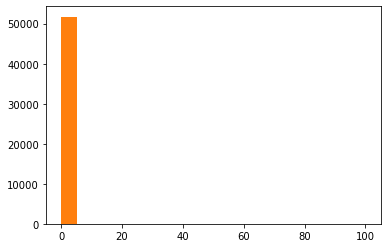

In [200]:
# x61,x66
print(df_spray[['x61','x66']].head(10))
print('='*50)
print(df_spray['x61'].value_counts())
print('='*50)
print(df_spray['x66'].value_counts())
print('='*50)
plt.hist(df_spray['x61'], bins=20, range=(0,100.10))
plt.hist(df_spray['x66'], bins=20, range=(0,100.10))
# 両者削除

               x62         x71
47     1190.238071   -1.000000
150    2056.493780   -1.000000
171     487.950036   -1.000000
329    3577.708764   -1.000000
331    1414.213562   -1.000000
600     424.264069  424.264069
723    1154.700538   -1.000000
725   17677.669530   -1.000000
935    1126.601424   -1.000000
1339   4618.802154   -1.000000
-1.000000        52119
 0.000000           79
 1414.213562        23
 707.106781         13
 2886.751346         9
 1154.700538         9
 353.553391          8
 2500.000000         5
 577.350269          4
 3535.533906         4
 282.842712          4
 2738.612788         3
 7071.067812         3
 288.675135          3
 1322.875656         3
 1000.000000         3
 2474.873734         3
 11547.005384        3
 3224.903099         3
 5773.502692         3
 3559.026084         3
 2309.401077         2
 1190.238071         2
 2828.427125         2
 8660.254038         2
 1250.000000         2
 1527.525232         2
 21213.203436        2
 500.000000    

(array([2., 4., 0., 2., 6., 1., 1., 0., 2., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0.]),
 array([   0.   ,  350.005,  700.01 , 1050.015, 1400.02 , 1750.025,
        2100.03 , 2450.035, 2800.04 , 3150.045, 3500.05 , 3850.055,
        4200.06 , 4550.065, 4900.07 , 5250.075, 5600.08 , 5950.085,
        6300.09 , 6650.095, 7000.1  ]),
 <BarContainer object of 20 artists>)

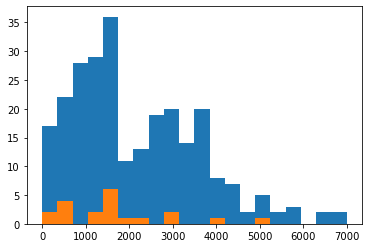

In [201]:
# x62,x71
print(df_spray[['x62','x71']][df_spray['x62']>0].head(10))
print('='*50)
print(df_spray['x62'].value_counts())
print('='*50)
print(df_spray['x71'].value_counts())
print('='*50)
plt.hist(df_spray['x62'][df_spray['x62']>0], bins=20, range=(0,7000.10))
plt.hist(df_spray['x71'][df_spray['x71']>0], bins=20, range=(0,7000.10))

   x63         x64
0  0.0  99999999.0
1  0.0  99999999.0
2  0.0  99999999.0
3  0.0  99999999.0
4  0.0  99999999.0
5  0.0  99999999.0
6  0.0  99999999.0
7  0.0  99999999.0
8  0.0  99999999.0
9  0.0  99999999.0
0.0          51732
28680.0          2
1220634.0        1
403743.0         1
117304.0         1
             ...  
17718.0          1
187.0            1
1395670.0        1
6987.0           1
1634570.0        1
Name: x63, Length: 768, dtype: int64
99999999.0    51732
1572664.0         1
10603.0           1
2456783.0         1
2014574.0         1
              ...  
569438.0          1
514045.0          1
1269559.0         1
634572.0          1
106496.0          1
Name: x64, Length: 769, dtype: int64


(array([161., 151., 114.,  76., 117., 105.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([      0.   ,  499999.955,  999999.91 , 1499999.865, 1999999.82 ,
        2499999.775, 2999999.73 , 3499999.685, 3999999.64 , 4499999.595,
        4999999.55 , 5499999.505, 5999999.46 , 6499999.415, 6999999.37 ,
        7499999.325, 7999999.28 , 8499999.235, 8999999.19 , 9499999.145,
        9999999.1  ]),
 <BarContainer object of 20 artists>)

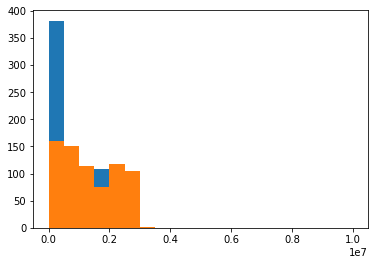

In [202]:
# x63,x64
print(df_spray[['x63','x64']][df_spray['x63']<99999999].head(10))
print('='*50)
print(df_spray['x63'].value_counts())
print('='*50)
print(df_spray['x64'].value_counts())
print('='*50)
# 相関があるが、同数の項目値が0⇆99999999へ変換すると異なる。「x63」は0→99999999へ変換する。
df_spray['x63'] = df_spray['x63'].replace(0, 99999999)

plt.hist(df_spray['x63'], bins=20, range=(0,9999999.10))
plt.hist(df_spray['x64'], bins=20, range=(0,9999999.10))
# 

   x65  x66
0  0.0  0.0
1  0.0  0.0
2  0.0  0.0
3  0.0  0.0
4  0.0  0.0
5  0.0  0.0
6  0.0  0.0
7  0.0  0.0
8  0.0  0.0
9  0.0  0.0
0.0        51732
5000.0       145
1000.0       135
10000.0      131
3000.0       109
500.0         55
2000.0        36
4000.0        26
20000.0       11
30000.0        8
2500.0         7
1500.0         7
6000.0         6
2600.0         5
50000.0        4
9600.0         4
9000.0         4
8000.0         4
4600.0         4
700.0          3
1600.0         3
4800.0         3
17000.0        3
7000.0         3
1400.0         3
900.0          2
2300.0         2
3600.0         2
6400.0         2
29400.0        2
2400.0         2
1200.0         2
5400.0         1
40000.0        1
39600.0        1
1300.0         1
4700.0         1
21600.0        1
58000.0        1
5200.0         1
22000.0        1
3900.0         1
9300.0         1
4500.0         1
59500.0        1
49000.0        1
24000.0        1
7700.0         1
29100.0        1
9500.0         1
3500.0         1
1

(array([51732.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([  0.   ,   5.005,  10.01 ,  15.015,  20.02 ,  25.025,  30.03 ,
         35.035,  40.04 ,  45.045,  50.05 ,  55.055,  60.06 ,  65.065,
         70.07 ,  75.075,  80.08 ,  85.085,  90.09 ,  95.095, 100.1  ]),
 <BarContainer object of 20 artists>)

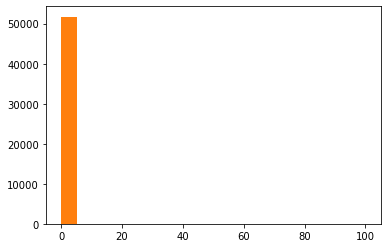

In [203]:
# x65,x66
print(df_spray[['x65','x66']].head(10))
print('='*50)
print(df_spray['x65'].value_counts())
print('='*50)
print(df_spray['x66'].value_counts())
print('='*50)
plt.hist(df_spray['x65'], bins=20, range=(0,100.10))
plt.hist(df_spray['x66'], bins=20, range=(0,100.10))
# 両者削除

          x69      x70
47      500.0    500.0
78    30000.0  30000.0
82     1000.0   1000.0
393   10000.0  10000.0
600    1600.0   1000.0
723    3000.0   3000.0
725   10000.0  10000.0
937    4600.0   4600.0
1003   5000.0   5000.0
1339  10000.0  10000.0
0.0        52274
10000.0       58
3000.0        40
5000.0        36
1000.0        25
20000.0        8
30000.0        8
8000.0         5
50000.0        5
6000.0         3
500.0          3
2000.0         2
29400.0        2
25000.0        2
40000.0        2
4800.0         2
2400.0         1
19100.0        1
58000.0        1
21000.0        1
2600.0         1
5200.0         1
1500.0         1
8300.0         1
33000.0        1
58900.0        1
4600.0         1
4300.0         1
4000.0         1
1600.0         1
49000.0        1
15000.0        1
35000.0        1
19600.0        1
4400.0         1
19700.0        1
39600.0        1
4500.0         1
3800.0         1
24000.0        1
59500.0        1
Name: x69, dtype: int64
0.0        52274
10000.0  

(array([85., 43.,  6., 58.,  1.,  0., 10.,  1.,  2.,  9.,  1.,  0.,  0.,
         2.,  0.,  0.,  5.,  0.,  0.,  3.]),
 array([    0.   ,  3000.005,  6000.01 ,  9000.015, 12000.02 , 15000.025,
        18000.03 , 21000.035, 24000.04 , 27000.045, 30000.05 , 33000.055,
        36000.06 , 39000.065, 42000.07 , 45000.075, 48000.08 , 51000.085,
        54000.09 , 57000.095, 60000.1  ]),
 <BarContainer object of 20 artists>)

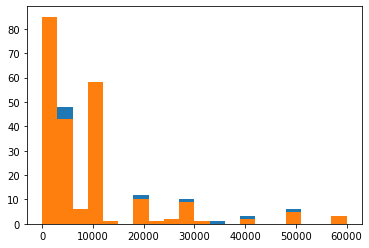

In [204]:
# x69,x70
print(df_spray[['x69','x70']][df_spray['x70']>0].head(10))
print('='*50)
print(df_spray['x69'].value_counts())
print('='*50)
print(df_spray['x70'].value_counts())
print('='*50)
plt.hist(df_spray['x69'][df_spray['x69']>0], bins=20, range=(0,60000.10))
plt.hist(df_spray['x70'][df_spray['x70']>0], bins=20, range=(0,60000.10))
# x69⇆x70の相関係数あまり差がない、重要度の低い方を除外する。
# x69の方が若干高い。x70を除外する。
# 分布がほぼ同じ特徴量は、削除せず残した方が結果的に効果があるのか？？

In [205]:
df_del = df_spray.copy()
df_del = df_del.drop(columns='x61')
df_del = df_del.drop(columns='x65')
df_del = df_del.drop(columns='x66')
df_del = df_del.drop(columns='x70')
df_del.columns
# 残しても精度に影響がなかったため、やはり削除する

Index(['y', 'x0_age', 'x1_term', 'x2_sex', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x10', 'x11', 'x12', 'x13', 'x15', 'x16', 'x17', 'x20', 'x24', 'x25',
       'x26', 'x32', 'x39', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x48', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58',
       'x59', 'x60', 'x62', 'x63', 'x64', 'x67', 'x68', 'x69', 'x71', 'x9_C',
       'x9_D', 'x9_H', 'x9_K', 'x9_N', 'x9_Q', 'x9_R', 'x9_S', 'x9_T'],
      dtype='object')

In [206]:
# 特徴量選択
# ランダム・フォレストによる、相互相関性の評価
# 組み合わせて説明力がどう変わるか

In [207]:
df_label = df_del.copy()

In [389]:
# ランダム・フォレストによる相互作用評価
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X = df_label.drop(columns='y')
y = df_label['y']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

classifier_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_model.fit(train_X, train_y)

pred_y = classifier_model.predict(test_X)
cm = confusion_matrix(test_y, pred_y)
print(cm)
print(accuracy_score(test_y, pred_y))

# Importtance
# 組み込み法（モデルベース特徴量選択：モデルが学習するタイミングで特徴量を評価する）
importance = classifier_model.feature_importances_
importances = pd.DataFrame(importance, index = X.columns, columns=['importance'])
pd.set_option('display.max_rows', 80)
importances.sort_values(by='importance', ascending=False)

[[14929    61]
 [  628   132]]
0.9562539682539682


,importance
x1_term,0.143358
x10,0.098021
x0_age,0.095925
x5,0.075107
x3,0.058060
x57,0.049504
x6,0.039396
x4,0.038059
x56,0.037499
x2_sex,0.025759


In [390]:
importances[importances['importance']>0.01]

,importance
x0_age,0.095925
x1_term,0.143358
x2_sex,0.025759
x3,0.058060
x4,0.038059
x5,0.075107
x6,0.039396
x10,0.098021
x11,0.010781
x12,0.016761


In [391]:
# ラッパー法（反復特徴量選択：機械学習のモデルを用いて特徴量を評価する）
# recursive feature elimination：RFE

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

selector = RFE(RandomForestRegressor(n_estimators=10, random_state=0), n_features_to_select=22)
# n_estimators：バギングに用いる決定木の個数、n_features_to_select：最終的に選択したい特徴量の次元
selector.fit(X, y)
support = selector.get_support()
print(X.columns)
print('='*50)
print(support) # 削減結果

Index(['x0_age', 'x1_term', 'x2_sex', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x10', 'x11', 'x12', 'x13', 'x15', 'x16', 'x17', 'x20', 'x24', 'x25',
       'x26', 'x32', 'x39', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x48', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58',
       'x59', 'x60', 'x62', 'x63', 'x64', 'x67', 'x68', 'x69', 'x71', 'x9_C',
       'x9_D', 'x9_H', 'x9_K', 'x9_N', 'x9_Q', 'x9_R', 'x9_S', 'x9_T'],
      dtype='object')
[ True  True  True  True  True  True  True False False  True False  True
  True False False  True  True False False False False False False False
  True False False False False False False False  True  True False  True
  True  True False False False False  True False False False False False
  True False False  True False False False False  True]


In [392]:
# SFS(Sequential(Forward/Backward))、EFS(Exhaustive)も必要？

In [393]:
array = []
i = 0
for col in X.columns:
    if support[i] == True:
        array.append('{0} : {1}'.format(col, support[i]))
    i = i+1
array

# x0_age	0.101658
# x1_term	0.156788
# x2_sex	0.026865
# x3	0.058900
# x4	0.040381
# x5	0.061907
# x6	0.051641
# x10	0.099264
# x11	0.011084 ←異
# x12	0.015268
# x13	0.015680
# x17	0.019779
# x20	0.017260
# x42	0.013098 ←異
# x43	0.023452
# x45	0.019030 ←異
# x52	0.016640
# x53	0.015018
# x55	0.025299
# x56	0.035844
# x57	0.050601
# x9	0.047653

# x59 ←異

['x0_age : True',
 'x1_term : True',
 'x2_sex : True',
 'x3 : True',
 'x4 : True',
 'x5 : True',
 'x6 : True',
 'x10 : True',
 'x12 : True',
 'x13 : True',
 'x17 : True',
 'x20 : True',
 'x43 : True',
 'x52 : True',
 'x53 : True',
 'x55 : True',
 'x56 : True',
 'x57 : True',
 'x63 : True',
 'x9_C : True',
 'x9_K : True',
 'x9_T : True']

In [394]:
#次元削除後のカラム数
print(selector.n_features_)
print('='*50)
#次元削除後のランキング
print(selector.ranking_)

22
[ 1  1  1  1  1  1  1 21 11  1  6  1  1 19 12  1  1 20 25 28  3 15 13  5
  1 23  9 35 36 34 33 32  1  1 24  1  1  1 18  4 22 27  1 14 31 26 29 30
  1 10  7  1  8  2 17 16  1]


In [395]:
# 相互作用評価結果(Importance)
# x1_term	0.145643
# x0_age	0.101135
# x10	0.100259
# x5	0.080567
# x3	0.054474
# x9	0.052691
# x57	0.050761
# x4	0.041640
# x56	0.039809
# x6	0.028491
# x55	0.027632
# x2_sex	0.025409
# x42	0.023390
# x17	0.019508
# x45	0.019052
# x20	0.018270
# x52	0.016905
# x13	0.016875
# x53	0.016241
# x12	0.015981
# x43	0.015130
# x11	0.012348
# x32	0.008946
# x44	0.007994
# x8	0.006915
# x16	0.006649
# x39	0.006052
# x41	0.005581
# x63	0.004388
# x15	0.003060
# x64	0.002948
# x24	0.002818
# x61	0.002527
# x59	0.002459
# x7	0.002451
# x66	0.002397
# x58	0.001973
# x65	0.001460
# x54	0.001431
# x26	0.001299
# x25	0.001262
# x68	0.001219
# x62	0.000987
# x60	0.000946
# x70	0.000744
# x71	0.000625
# x69	0.000383
# x67	0.000275
# x46	0.000000
# x51	0.000000
# x47	0.000000
# x48	0.000000
# x50	0.000000

In [396]:
# 'x0_age : True',
#  'x1_term : True',
#  'x2_sex : True',
#  'x3 : True',
#  'x4 : True',
#  'x5 : True',
#  'x6 : True',
#  'x9 : True',
#  'x10 : True',
#  'x11 : True',
#  'x12 : True',
#  'x13 : True',
#  'x17 : True',
#  'x20 : True',
#  'x32 : True',
#  'x42 : True',
#  'x52 : True',
#  'x53 : True',
#  'x55 : True',
#  'x56 : True',
#  'x57 : True',
#  'x63 : True'

In [397]:
# 変数単体でのAUC
# x1_term : 0.7258950794142892
# x6 : 0.6615857035949022
# x3 0.6560254281932084
# x5 : 0.6558202078662744
# x0_age : 0.5986913518161799
# x4 : 0.5793724481948183
# x12 0.5720290472437117
# x2_sex : 0.5711118319281385
# x10 : 0.5555445750504683
# x7 : 0.5025797988282915
# x8 : 0.49984190065104656

In [398]:
# 特徴量選択
# Filter Method：
#     ①分散=0データは削除
#     ②他の特徴量と値が完全に一致している変数の片方を削除
#     ③相関の高い特徴量の片方を削除
#     ④ランク付け、上位ランク変数を採用、
#         ・連続値（ターゲットが2値）、ANOVA、低ランクを削除
#         ・カテゴリ変数（ターゲットが2値）、カイ2乗・フィッシャー係数、低ランクを削除
#         ・2変数間の依存性評価、ROC_AUC / RMSE、低ランクを削除
#         ・主成分分析(PCA)と独立成分分析(ICA)
#         ・手あたり次第に作ってみて、影響度見て削る

# Wrapper Method：変数の組み合わせ選択、モデル学習、性能評価、高性能の変数を採用（True）
#     ①Step Forward、1変数ずつ学習・評価、追加して学習・評価
#     ②Step backward、1変数ずつ削除して学習・評価
#     ③Exhaustive Search、すべての組み合わせを試行して評価

# Emedded Method：モデル学習、重要度算出、高重要度の変数を採用(Importance)

In [399]:
# 材料
# 相関性評価結果(相関係数)　corr：spearman
# 相互作用評価結果（Importance）　RandomForestClassifier
# 反復特徴量選択結果（support：True/False）　RandomForestRegressor
# AUC単体の評価結果（Importance） lightgbm：metrics.auc

In [400]:
# Filter Method：
# ①分散=(ほぼ)0データは削除
# x14,x18,x19,x21,x22,x23,x27,x28,x29,x30,x31,x33,x34,x35,x36,x37,x38,x40,x72
# 一定値（2のみ、99のみなど）特徴量としては不要とする

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
print(train_X.shape) # 全項目
X_train = train_X.copy()
sel.fit(X_train) # 分散0の項目を排除
print(sum(sel.get_support())) # 非該当項目
X_train = X_train.loc[:, sel.get_support()]
print(X_train.shape) # 非該当項目

X_train_diff = train_X.drop(columns=X_train)
print(X_train_diff.columns) # 該当項目
# 下記も削除対象とする
cols =['x46', 'x48', 'x50', 'x51'] # 'x47'残す
df_zero = df_label.copy()
df_zero = df_zero.drop(columns=cols)
df_zero

(36750, 57)
52
(36750, 52)
Index(['x46', 'x47', 'x48', 'x50', 'x51'], dtype='object')


,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x47,x52,x53,x54,x55,x56,x57,x58,x59,x60,x62,x63,x64,x67,x68,x69,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T
0,1,22.0,0,2,10,1,0,0,99,99,22.0,99,99,99,2,2,1,1,2,2,2,2,2,1,99,99,99,99,2,2,2,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1
1,1,49.0,36,2,10,1,8,1,99,99,46.0,4,4,4,2,1,2,1,2,2,2,99,1,1,1,1,1,3,2,1,2,2,99,3,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0
2,1,22.0,13,1,10,1,6,1,99,99,21.0,99,2,5,2,2,2,2,2,2,2,2,2,99,99,99,99,99,2,2,1,2,99,0,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1
3,1,34.0,24,1,10,2,0,0,99,99,32.0,99,2,5,2,2,2,1,2,2,2,2,2,1,3,2,1,1,2,2,1,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0
4,1,26.0,97,1,32,1,10,1,99,99,18.0,99,4,4,2,1,1,1,1,2,2,99,1,1,1,1,1,3,2,2,2,2,99,3,3,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,0,26.0,11,1,10,2,0,0,99,99,25.0,99,2,5,2,2,2,1,2,2,2,2,2,1,1,1,1,1,2,1,1,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1
52496,0,32.0,26,2,10,2,0,0,99,99,29.0,99,2,5,2,2,2,2,2,2,2,2,2,1,1,1,1,1,2,2,2,2,99,2,4,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0
52497,0,59.0,84,2,10,2,0,0,99,99,52.0,99,2,5,2,2,2,2,2,2,2,2,2,1,1,1,1,3,2,2,1,2,99,2,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1
52498,0,16.0,8,2,10,2,0,0,99,99,45.0,99,99,99,2,1,2,2,2,2,2,99,2,1,1,1,1,1,2,1,1,2,2,1,4,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,1,0,0,0,0


In [401]:
print(X_train.columns)
print(X_train.shape)

Index(['x0_age', 'x1_term', 'x2_sex', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x10', 'x11', 'x12', 'x13', 'x15', 'x16', 'x17', 'x20', 'x24', 'x25',
       'x26', 'x32', 'x39', 'x41', 'x42', 'x43', 'x44', 'x45', 'x52', 'x53',
       'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x62', 'x63', 'x64',
       'x67', 'x68', 'x69', 'x71', 'x9_C', 'x9_D', 'x9_H', 'x9_K', 'x9_N',
       'x9_Q', 'x9_R', 'x9_S', 'x9_T'],
      dtype='object')
(36750, 52)


In [402]:
# Filter Method：
# ②他の特徴量と値が完全に一致している変数の片方を削除
train_X_T = train_X.T
print(train_X_T.duplicated().sum())
print('='*50)
duplicated_features = train_X_T[train_X_T.duplicated()].index.values
print(duplicated_features)
# 'x47' 'x48' 'x50' 'x51' ←1つ残す、ただし全て相互作用評価結果(Importance=0)

4
['x47' 'x48' 'x50' 'x51']


In [403]:
print(df_zero['x47'].value_counts())

2    52500
Name: x47, dtype: int64


In [404]:
# Filter Method：
# ③相関の高い特徴量の片方を削除
# 相関係数
# x0_age   x10     0.654448　←両方Importance高い、両方残す
# x5       　　x6     　 　　　0.790922　←両方Importance高い、両方残す
# x59      x67        0.499071　←'x67'を削除、Importance低い
# x59      x68        0.577026　←'x68'を削除
# x60      x61        0.837955　←'x60'を削除
# x60      x65        0.878183　←'x60'を削除
# x60      x66        0.927017　←'x60'を削除
# x61      x65        0.955743　←'x65'を削除
# x61      x66        0.905920　←'x66'を削除
# x62      x71        0.434522　←'x71'を削除
# x63      x64        0.707551　←''x64を削除
# x65      x66        0.875893　← 両者、削除
# x69      x70        0.954090　←'x69'を削除
# 高いからと言って本当に消してもよい？

In [405]:
# 主成分分析(PCA)

In [406]:
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(df_zero)
feature = pca.transform(df_zero)
# pd.DataFrame(feature, columns=["{0}".format(x) for x in df_zero.columns]).head()
df_pca = pd.DataFrame(pca.explained_variance_ratio_, index=["{}".format(x) for x in df_zero.columns])
df_pca.sort_values(0, ascending=False).head(10)

,0
y,9.999386e-01
x0_age,6.138807e-05
x1_term,1.920420e-08
x2_sex,4.572497e-09
x3,1.542528e-09
x4,3.945338e-10
x5,3.008961e-10
x6,9.372487e-11
x7,1.894527e-11
x8,1.110076e-11


In [407]:
# 手あたり次第に作ってみて、影響度見て削る
# x0_age   x10
# x5       　　x6
# x59      x67
# x59      x68
# x60      x61 ←x61削除済
# x60      x65 ←x65削除済
# x60      x66 ←x66削除済
# x61      x65 ←x65削除済
# x61      x66 ←x66削除済
# x62      x71
# x63      x64
# x65      x66
# x69      x70 ←x70削除済

df_add = df_zero.copy()
df_add['x73'] = (df_add['x0_age'] + df_add['x10'])/2
df_add['x74'] = (df_add['x5'] + df_add['x6'])/2
df_add['x75'] = (df_add['x59'] + df_add['x67'])/2
df_add['x76'] = (df_add['x59'] + df_add['x68'])/2
df_add['x77'] = (df_add['x62'] + df_add['x71'])/2
df_add['x78'] = (df_add['x63'] + df_add['x64'])/2
# 生成したが効果がなかったため、生成しない
df_add.head()

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x47,x52,x53,x54,x55,x56,x57,x58,x59,x60,x62,x63,x64,x67,x68,x69,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T,x73,x74,x75,x76,x77,x78
0,1,22.0,0,2,10,1,0,0,99,99,22.0,99,99,99,2,2,1,1,2,2,2,2,2,1,99,99,99,99,2,2,2,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,22.0,0.0,0.0,0.0,-1.0,99999999.0
1,1,49.0,36,2,10,1,8,1,99,99,46.0,4,4,4,2,1,2,1,2,2,2,99,1,1,1,1,1,3,2,1,2,2,99,3,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0,47.5,4.5,0.0,0.0,-1.0,99999999.0
2,1,22.0,13,1,10,1,6,1,99,99,21.0,99,2,5,2,2,2,2,2,2,2,2,2,99,99,99,99,99,2,2,1,2,99,0,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,21.5,3.5,0.0,0.0,-1.0,99999999.0
3,1,34.0,24,1,10,2,0,0,99,99,32.0,99,2,5,2,2,2,1,2,2,2,2,2,1,3,2,1,1,2,2,1,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0,33.0,0.0,0.0,0.0,-1.0,99999999.0
4,1,26.0,97,1,32,1,10,1,99,99,18.0,99,4,4,2,1,1,1,1,2,2,99,1,1,1,1,1,3,2,2,2,2,99,3,3,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,1,0,0,0,22.0,5.5,0.0,0.0,-1.0,99999999.0


In [408]:
# 再評価
# ランダム・フォレストによる相互作用評価
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X_re = df_add.drop(columns='y')
y_re = df_add['y']

train_X_re, test_X_re, train_y_re, test_y_re = train_test_split(X_re, y_re, test_size=0.3, random_state=0)

classifier_model_re = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_model_re.fit(train_X_re, train_y_re)

pred_y_re = classifier_model_re.predict(test_X_re)
cm_re = confusion_matrix(test_y_re, pred_y_re)
print(cm_re)

# Importtance
# 組み込み法（モデルベース特徴量選択：モデルが学習するタイミングで特徴量を評価する）
importance_re = classifier_model_re.feature_importances_
importances_re = pd.DataFrame(importance_re, index = X_re.columns, columns=['importance'])
pd.set_option('display.max_rows', 50)
importances_re.sort_values(by='importance', ascending=False)
# importances_re[importances_re['importance']>0.01]

[[14921    69]
 [  631   129]]


,importance
x1_term,0.118974
x73,0.080239
x10,0.077516
x0_age,0.073920
x5,0.059724
...,...
x62,0.000701
x71,0.000691
x67,0.000586
x68,0.000526


In [409]:
# x73：0.085721、x0_age：x10、採用
# x74：0.046250、x5：x6 ←x5：x6より上位、x5：x6削除、x74を採用
# x75：0.002356、x59：x67 ←x59と大差なし、不採用
# x76：0.002461、x59：x68 ←x59と大差なし、不採用
# x77：0.001923、x62：x71 ←x62：x71より上位、ただし、そもそも低いのでx77は不採用
# x78：0.001909、x63：x64　←x64と大差なし、不採用

# df_add = df_add.drop(columns='x75')
# df_add = df_add.drop(columns='x76')
# df_add = df_add.drop(columns='x77')
# df_add = df_add.drop(columns='x78')
df_add.head()

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x47,x52,x53,x54,x55,x56,x57,x58,x59,x60,x62,x63,x64,x67,x68,x69,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T,x73,x74,x75,x76,x77,x78
0,1,22.0,0,2,10,1,0,0,99,99,22.0,99,99,99,2,2,1,1,2,2,2,2,2,1,99,99,99,99,2,2,2,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,22.0,0.0,0.0,0.0,-1.0,99999999.0
1,1,49.0,36,2,10,1,8,1,99,99,46.0,4,4,4,2,1,2,1,2,2,2,99,1,1,1,1,1,3,2,1,2,2,99,3,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0,47.5,4.5,0.0,0.0,-1.0,99999999.0
2,1,22.0,13,1,10,1,6,1,99,99,21.0,99,2,5,2,2,2,2,2,2,2,2,2,99,99,99,99,99,2,2,1,2,99,0,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,21.5,3.5,0.0,0.0,-1.0,99999999.0
3,1,34.0,24,1,10,2,0,0,99,99,32.0,99,2,5,2,2,2,1,2,2,2,2,2,1,3,2,1,1,2,2,1,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0,33.0,0.0,0.0,0.0,-1.0,99999999.0
4,1,26.0,97,1,32,1,10,1,99,99,18.0,99,4,4,2,1,1,1,1,2,2,99,1,1,1,1,1,3,2,2,2,2,99,3,3,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,1,0,0,0,22.0,5.5,0.0,0.0,-1.0,99999999.0


In [410]:
# Importanceからも削除
print(type(importances_re))
print(importances_re.shape)
importances_re = importances_re.drop('x75', axis=0)
importances_re = importances_re.drop('x76', axis=0)
importances_re = importances_re.drop('x77', axis=0)
importances_re = importances_re.drop('x78', axis=0)
print(importances_re.shape)
# 実際あっても、なくても影響がなかったため、生成しない。

<class 'pandas.core.frame.DataFrame'>
(59, 1)
(55, 1)


In [411]:
leave_col = importances_re[importances_re['importance']>0.02].index
importances_re[importances_re['importance']>0.02]

,importance
x0_age,0.073920
x1_term,0.118974
x2_sex,0.023303
x3,0.050021
x4,0.037436
x5,0.059724
x6,0.030535
x10,0.077516
x42,0.022776
x45,0.030812


In [412]:
leave_col

Index(['x0_age', 'x1_term', 'x2_sex', 'x3', 'x4', 'x5', 'x6', 'x10', 'x42',
       'x45', 'x55', 'x56', 'x57', 'x73', 'x74'],
      dtype='object')

In [413]:
hold_col = importances_re[importances_re['importance']<0.02][importances_re['importance']>0.01].index
importances_re[importances_re['importance']<0.02][importances_re['importance']>0.01]

<ipython-input-413-794961a915bb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hold_col = importances_re[importances_re['importance']<0.02][importances_re['importance']>0.01].index
<ipython-input-413-794961a915bb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  importances_re[importances_re['importance']<0.02][importances_re['importance']>0.01]


,importance
x12,0.015990
x13,0.017148
x17,0.016661
x20,0.016840
x43,0.018382
x52,0.014507
x53,0.013534
x9_K,0.011945
x9_T,0.016703


In [414]:
hold_col

Index(['x12', 'x13', 'x17', 'x20', 'x43', 'x52', 'x53', 'x9_K', 'x9_T'], dtype='object')

In [415]:
# 削除対象
del_col = importances_re[importances_re['importance']<0.01].index
del_col = ['x7', 'x8', 'x11', 'x15', 'x16', 'x24', 'x25', 'x26', 'x32', 'x39','x41', 'x44', 'x47', 'x54', 'x58', 'x59', 'x60', 'x62', 'x63', 'x64','x67', 'x68', 'x69', 'x71']

In [416]:
df_select_del = df_add.copy()
print(df_select_del.columns)
print(df_select_del.shape)

Index(['y', 'x0_age', 'x1_term', 'x2_sex', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x10', 'x11', 'x12', 'x13', 'x15', 'x16', 'x17', 'x20', 'x24', 'x25',
       'x26', 'x32', 'x39', 'x41', 'x42', 'x43', 'x44', 'x45', 'x47', 'x52',
       'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x62', 'x63',
       'x64', 'x67', 'x68', 'x69', 'x71', 'x9_C', 'x9_D', 'x9_H', 'x9_K',
       'x9_N', 'x9_Q', 'x9_R', 'x9_S', 'x9_T', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78'],
      dtype='object')
(52500, 60)


In [417]:
df_select_del

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x47,x52,x53,x54,x55,x56,x57,x58,x59,x60,x62,x63,x64,x67,x68,x69,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T,x73,x74,x75,x76,x77,x78
0,1,22.0,0,2,10,1,0,0,99,99,22.0,99,99,99,2,2,1,1,2,2,2,2,2,1,99,99,99,99,2,2,2,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,22.0,0.0,0.0,0.0,-1.0,99999999.0
1,1,49.0,36,2,10,1,8,1,99,99,46.0,4,4,4,2,1,2,1,2,2,2,99,1,1,1,1,1,3,2,1,2,2,99,3,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0,47.5,4.5,0.0,0.0,-1.0,99999999.0
2,1,22.0,13,1,10,1,6,1,99,99,21.0,99,2,5,2,2,2,2,2,2,2,2,2,99,99,99,99,99,2,2,1,2,99,0,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,21.5,3.5,0.0,0.0,-1.0,99999999.0
3,1,34.0,24,1,10,2,0,0,99,99,32.0,99,2,5,2,2,2,1,2,2,2,2,2,1,3,2,1,1,2,2,1,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0,33.0,0.0,0.0,0.0,-1.0,99999999.0
4,1,26.0,97,1,32,1,10,1,99,99,18.0,99,4,4,2,1,1,1,1,2,2,99,1,1,1,1,1,3,2,2,2,2,99,3,3,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,1,0,0,0,22.0,5.5,0.0,0.0,-1.0,99999999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,0,26.0,11,1,10,2,0,0,99,99,25.0,99,2,5,2,2,2,1,2,2,2,2,2,1,1,1,1,1,2,1,1,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,25.5,0.0,0.0,0.0,-1.0,99999999.0
52496,0,32.0,26,2,10,2,0,0,99,99,29.0,99,2,5,2,2,2,2,2,2,2,2,2,1,1,1,1,1,2,2,2,2,99,2,4,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0,30.5,0.0,0.0,0.0,-1.0,99999999.0
52497,0,59.0,84,2,10,2,0,0,99,99,52.0,99,2,5,2,2,2,2,2,2,2,2,2,1,1,1,1,3,2,2,1,2,99,2,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,55.5,0.0,0.0,0.0,-1.0,99999999.0
52498,0,16.0,8,2,10,2,0,0,99,99,45.0,99,99,99,2,1,2,2,2,2,2,99,2,1,1,1,1,1,2,1,1,2,2,1,4,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,1,0,0,0,0,30.5,0.0,0.0,0.0,-1.0,99999999.0


In [467]:
print(df_select_del.shape)
df_select_del = df_select_del.drop(columns=del_col)
print(df_select_del.columns)
print(df_select_del.shape)
# 消そうとしたが、消しても精度に影響が出ないため、残す。

(52500, 36)


KeyError: "['x59' 'x62' 'x63' 'x64' 'x67' 'x68' 'x71'] not found in axis"

In [468]:
# # 削除する・しない、両方の精度を検証する。
# print(hold_col.shape)
# print(df_select_del.shape)
# df_select_del = df_select_del.drop(columns=hold_col)
# print(df_select_del.columns)
# print(df_select_del.shape)
# 削除すると精度が落ちるので削除しない

In [469]:
print(df_select_del.shape)
df_select_del.head()

(52500, 36)


,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x10,x12,x13,x17,x20,x42,x43,x45,x52,x53,x55,x56,x57,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T,x73,x74,x75,x76,x77,x78
0,1,22.0,0,2,10,1,0,0,22.0,99,99,1,1,99,99,99,2,2,99,1,2,0,0,0,0,0,0,0,0,1,22.0,0.0,0.0,0.0,-1.0,99999999.0
1,1,49.0,36,2,10,1,8,1,46.0,4,4,2,1,1,1,3,1,2,99,3,2,0,0,0,1,0,0,0,0,0,47.5,4.5,0.0,0.0,-1.0,99999999.0
2,1,22.0,13,1,10,1,6,1,21.0,2,5,2,2,99,99,99,2,1,99,0,2,0,0,0,0,0,0,0,0,1,21.5,3.5,0.0,0.0,-1.0,99999999.0
3,1,34.0,24,1,10,2,0,0,32.0,2,5,2,1,3,2,1,2,1,99,1,2,0,0,0,1,0,0,0,0,0,33.0,0.0,0.0,0.0,-1.0,99999999.0
4,1,26.0,97,1,32,1,10,1,18.0,4,4,1,1,1,1,3,2,2,99,3,3,0,0,0,0,0,1,0,0,0,22.0,5.5,0.0,0.0,-1.0,99999999.0


In [470]:
df_light = df_select_del.copy()
# df_light = df_del.copy()
# print(df_proc.shape)
# df_proc

In [471]:
# validation
df_X = df_light.drop(columns='y')
df_y = df_light['y']
print(df_X.shape)
print(df_y.shape)

(52500, 35)
(52500,)


In [472]:
# 内部のハイパーパラメータの動きはどうなっている？
# バリエーションデータ作成目的を説明できる？
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
X_train_val_t, X_val_t, y_train_val_t, y_val_t = train_test_split(X_train_t, y_train_t, test_size=0.2, random_state=0)
print(y_test_t.shape)

(10500,)


In [473]:
# optuna　なぜか使えない。今回は自力でやチューニングする。
# import optuna.integration.lightgbm as lgb
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [474]:
# best_params, history = {}, []
# # LightGBM学習
# gbm_best = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=200,
#                 valid_sets=[lgb_train, lgb_eval],
#                 early_stopping_rounds=50
#                )

In [475]:
# gbm_best.params

In [476]:
# gbm_best.best_iteration

In [477]:
# gbm_best.best_score

In [478]:
# 'boosting_type': 'gbdt', # アルゴリズム：勾配ブースティング
# 'objective': 'binary', # 目的 : 2値分類
# 'metric': {'binary_error'}, # 評価指標 : 誤り率, binary_logloss, auc
# 'num_leaves': 50, # Treeの複雑さ：（デフォルトは31）
# 'num_iterations':200, # 木の数：（デフォルトは100）
# 'learning_rate': 0.05, # 学習率：（デフォルト0.1の半分）
# 'feature_fraction': 0.9, # 各木を作成するときに使用可能な特徴量の割合：90%
# 'bagging_fraction': 0.8, # 使用するデータの割合：80%
# 'bagging_freq': 5, # 何回ごとにランダムサンプリングをするか：5回
# 'vervose': 0 # 途中経過出力：する

In [479]:
# パラメーターチューニング
# グリッドサーチ、ランダムサーチ、ベイズ最適化

In [480]:
# params = {
#     'boosting_type': 'gbdt', # アルゴリズム：勾配ブースティング
#     'objective': 'binary', # 目的 : 2値分類
# }

In [481]:
params = {
    'boosting_type': 'gbdt', # アルゴリズム：勾配ブースティング
    'objective': 'binary', # 目的 : 2値分類 
    'metric': {'binary_error'}, # 評価指標 : 誤り率, binary_error（正答率）, binary_logloss(クロスエントロピー), auc
    'num_leaves': 200, # Treeの複雑さ：（デフォルトは31）
    'num_iterations':200, # 木の数：（デフォルトは100）
    'learning_rate': 0.01, # 学習率：（デフォルト0.1の半分）
    'feature_fraction': 0.9, # 各木を作成するときに使用可能な特徴量の割合：90%
    'bagging_fraction': 0.8, # 使用するデータの割合：80%
    'bagging_freq': 10, # 何回に一回baggingするか
    'max_depth':10,
    'colsample_bytree':1,
    'n_estimators':50000, # ランダムサーチ(パラメータ範囲指定)
    'vervose': 0 # 途中経過出力：する
}

In [482]:
# # ホールドアウト法
# # LightGBMのモデル構築
# lgb_train = lgb.Dataset(train_X, train_y)
# lgb_eval = lgb.Dataset(test_X, test_y)

# model_lgb = lgb.train(params,
#             lgb_train,
#             valid_sets=(lgb_train, lgb_eval),
#             num_boost_round=10000,
#             early_stopping_rounds=100,
#             verbose_eval=50)

# # 予測
# preds = model_lgb.predict(train_X)
# # AUC
# fpr, tpr, thresholds = metrics.roc_curve(train_y, preds)
# auc = metrics.auc(fpr, tpr)

In [483]:
# print(auc)

In [488]:
# Create dataset
# ホールドアウト法→交差検証 (クロスバリデーション)に切り替える
from sklearn.model_selection import KFold
auc_scores=[]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
predicted_df = pd.DataFrame({'index':0, 'pred':0}, index=[1])

for train_index, val_index in kf.split(df_light.index):
    X_train = df_light.drop('y', axis=1).iloc[train_index]
    y_train = df_light['y'].iloc[train_index]
    X_test = df_light.drop('y', axis=1).iloc[val_index]
    y_test = df_light['y'].iloc[val_index]
    X_test_t.append(df_light.drop('y', axis=1).iloc[val_index])
    y_test_t.append(df_light['y'].iloc[val_index])
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test)
    
    #LightGBMのモデル構築
    model_lgb = lgb.train(params,
                lgb_train,
                valid_sets=(lgb_train, lgb_eval),
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval=50)

    # 予測
    preds = model_lgb.predict(X_train)
    # AUC
    fpr, tpr, thresholds = metrics.roc_curve(y_train, preds)
    auc = metrics.auc(fpr, tpr)
    auc_scores.append(auc)

/Users/Tatsuro-Tokume/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/Tatsuro-Tokume/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: vervose
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Unknown parameter: vervose
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 1998, number of negative: 40002
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1092
[LightGBM] [Info] Number of data points in the train set: 42000, number of used features: 35
[LightGBM] [Warning] Unknown parameter: vervose
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.047571 -> init

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[307]	training's binary_error: 0.0330238	valid_1's binary_error: 0.0422857
[LightGBM] [Warning] Unknown parameter: vervose
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Unknown parameter: vervose
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 2005, number of negative: 39995
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 42000, number of used features: 35
[LightGBM] [Warning] Unknown parameter: vervose
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	training's binary_error: 0.048119	valid_1's binary_error: 0.045619
[100]	training's binary_error: 0.0422143	valid_1's binary_error: 0.0415238
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	training's binary_error: 0.0386667	valid_1's binary_error: 0.0400952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	training's binary_error: 0.0368333	valid_1's binary_error: 0.0399048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [489]:
auc_scores=np.array(auc_scores)
print(auc_scores.mean())
print(y_test_t.shape)

0.9754855217317064
(10500,)


In [490]:
# 0.8885403574738853 ←特徴量エンジニアリング前
# 0.8835554959597498 ←特徴量エンジニアリング後（消すべきでない項目を削除している、不要な項目を追加している可能性あり）
# 0.88329379023215　　　　　 ←パラメーターチューニング後
# 0.8902663002720065 ←特徴量エンジニアリング前、パラメーターチューニング後（チューニングの効果は少しあり）
# 0.9665206709943875 ←k-fold後

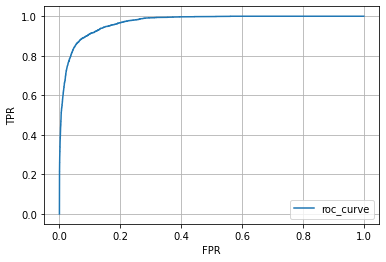

In [487]:
plt.plot(fpr, tpr, label='roc_curve')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

In [260]:
# extraction of importance
pd.set_option('display.max_rows', 80)
importance = pd.DataFrame(model_lgb.feature_importance(), index = df_X.columns, columns=['Importance'])
importance.sort_values(by='Importance', ascending=False)

,Importance
x1_term,7491
x0_age,5130
x10,4859
x73,4760
x3,2811
x5,2187
x56,2130
x55,1826
x2_sex,1590
x57,1519


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

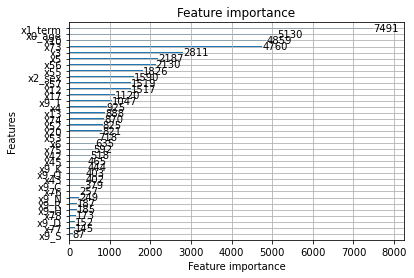

In [261]:
lgb.plot_importance(model_lgb)

In [262]:
y_pred = np.where(preds < 0.5, 0, 1) # 閾値=0.5
# print(preds.shape)
# print(y_pred.shape)

In [263]:
# accuracy_score(y_test, y_pred)
# # 0.9579047619047619 ←特徴量、チューニング後
# # 0.9578095238095238 ←k-fold後

In [264]:
# recall_score(y_test_t, y_pred)
# 0.20119521912350596 ←特徴量、チューニング後
# 0.18452380952380953 ←k-fold後

In [266]:
# precision_score(y_test, y_pred)
# # 0.7112676056338029 ←特徴量、チューニング後
# # 0.744 ←k-fold後

In [267]:
# f1_score(y_test, y_pred)
# 0.31366459627329196 ←特徴量、チューニング後
# 0.2957074721780604 ←k-fold後

In [809]:
log_loss(y_test, y_pred)
# 1.4539211380995398 ←特徴量、チューニング後
# 1.4572098600060197 ←k-fold後

1.4572098600060197

In [268]:
# KS値
# K-S検定（コルモゴロフ-スミルノフ検定）
from matplotlib.patches import ArrowStyle
from scipy import stats
clf= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=25, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=15,
        min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
        oob_score=False, random_state=0, verbose=0, warm_start=False)

clf.fit(X_train, y_train)
pre=clf.predict_proba(X_train)
pre_pd = pd.DataFrame(pre[:,0])
pre_pd['y'] = y_train
print(pre_pd.head())
print('='*50)
print(pre_pd.mean())

          0    y
0  0.566718  1.0
1  0.735697  1.0
2  0.510964  1.0
3  0.859132  1.0
4  0.708400  1.0
0    0.951711
y    0.059362
dtype: float64


In [269]:
# 債権回収のドメイン知識はどのように関係する？

In [270]:
df_light

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x10,x12,x13,x17,x20,x42,x43,x45,x52,x53,x55,x56,x57,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T,x73,x74,x75,x76,x77,x78
0,1,22.0,0,2,10,1,0,0,22.0,99,99,1,1,99,99,99,2,2,99,1,2,0,0,0,0,0,0,0,0,1,22.0,0.0,0.0,0.0,-1.0,99999999.0
1,1,49.0,36,2,10,1,8,1,46.0,4,4,2,1,1,1,3,1,2,99,3,2,0,0,0,1,0,0,0,0,0,47.5,4.5,0.0,0.0,-1.0,99999999.0
2,1,22.0,13,1,10,1,6,1,21.0,2,5,2,2,99,99,99,2,1,99,0,2,0,0,0,0,0,0,0,0,1,21.5,3.5,0.0,0.0,-1.0,99999999.0
3,1,34.0,24,1,10,2,0,0,32.0,2,5,2,1,3,2,1,2,1,99,1,2,0,0,0,1,0,0,0,0,0,33.0,0.0,0.0,0.0,-1.0,99999999.0
4,1,26.0,97,1,32,1,10,1,18.0,4,4,1,1,1,1,3,2,2,99,3,3,0,0,0,0,0,1,0,0,0,22.0,5.5,0.0,0.0,-1.0,99999999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,0,26.0,11,1,10,2,0,0,25.0,2,5,2,1,1,1,1,1,1,99,1,2,0,0,0,0,0,0,0,0,1,25.5,0.0,0.0,0.0,-1.0,99999999.0
52496,0,32.0,26,2,10,2,0,0,29.0,2,5,2,2,1,1,1,2,2,99,2,4,0,0,0,1,0,0,0,0,0,30.5,0.0,0.0,0.0,-1.0,99999999.0
52497,0,59.0,84,2,10,2,0,0,52.0,2,5,2,2,1,1,3,2,1,99,2,2,0,0,0,0,0,0,0,0,1,55.5,0.0,0.0,0.0,-1.0,99999999.0
52498,0,16.0,8,2,10,2,0,0,45.0,99,99,2,2,1,1,1,1,1,2,1,4,0,0,0,0,1,0,0,0,0,30.5,0.0,0.0,0.0,-1.0,99999999.0


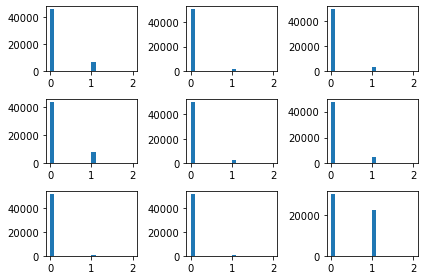

In [271]:
# 単一変数の集計と傾向
fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

ax1.hist(df_light['x9_C'], bins=20, range=(0,2))
ax2.hist(df_light['x9_D'], bins=20, range=(0,2))
ax3.hist(df_light['x9_H'], bins=20, range=(0,2))
ax4.hist(df_light['x9_K'], bins=20, range=(0,2))
ax5.hist(df_light['x9_N'], bins=20, range=(0,2))
ax6.hist(df_light['x9_Q'], bins=20, range=(0,2))
ax7.hist(df_light['x9_R'], bins=20, range=(0,2))
ax8.hist(df_light['x9_S'], bins=20, range=(0,2))
ax9.hist(df_light['x9_T'], bins=20, range=(0,2))
fig.tight_layout()
plt.show()
# Tが多い、他は5000件（１0％）以下

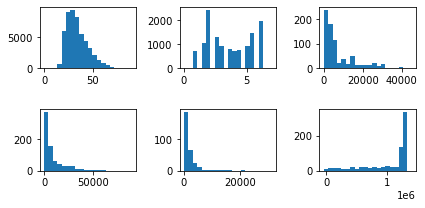

In [272]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)

ax1.hist(df_light['x73'][df_light['x73']>0], bins=20, range=(0,90))
ax2.hist(df_light['x74'][df_light['x74']>0], bins=20, range=(0,7))
ax3.hist(df_light['x75'][df_light['x75']>0], bins=20, range=(0,df_light['x75'].max()-1))
ax4.hist(df_light['x76'][df_light['x76']>0], bins=20, range=(0,df_light['x76'].max()-1))
ax5.hist(df_light['x77'][df_light['x77']>0], bins=20, range=(0,df_light['x77'].max()-1))
ax6.hist(df_light['x78'][df_light['x78']>0], bins=20, range=(-40000,1400000))
fig.tight_layout()
plt.show()

In [273]:
print(df_light['x75'].value_counts().head(3))
print(df_light['x76'].value_counts().head(3))

0.0       51732
2500.0       85
5000.0       68
Name: x75, dtype: int64
0.0       51732
5000.0       87
2500.0       87
Name: x76, dtype: int64


In [274]:
print(df_light['x73'].min())
print(df_light['x74'].min())
print(df_light['x75'].min())
print(df_light['x76'].min())
print(df_light['x77'].min())
print(df_light['x78'].min())
print('='*25)
print(df_light['x73'].max())
print(df_light['x74'].max())
print(df_light['x75'].max())
print(df_light['x76'].max())
print(df_light['x77'].max())
print(df_light['x78'].max())

10.0
0.0
0.0
0.0
-1.0
-37992.5
99.5
6.5
45004.5
90000.0
31112.698372208102
99999999.0


In [275]:
print(df_light['x73'].mean())
print(df_light['x74'].mean())
print(df_light['x75'].mean())
print(df_light['x76'].mean())
print(df_light['x77'].mean())
print(df_light['x78'].mean())
print('='*25)
print(df_light['x73'].median())
print(df_light['x74'].median())
print(df_light['x75'].median())
print(df_light['x76'].median())
print(df_light['x77'].median())
print(df_light['x78'].median())
print('='*25)
print(df_light['x73'].mode())
print(df_light['x74'].mode())
print(df_light['x75'].mode())
print(df_light['x76'].mode())
print(df_light['x77'].mode())
print(df_light['x78'].mode())

33.917142857142856
0.8958190476190476
106.75890476190476
132.99800952380951
10.670356736505854
98552266.98125714
31.5
0.0
0.0
0.0
-1.0
99999999.0
0    31.5
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0   -1.0
dtype: float64
0    99999999.0
dtype: float64


In [276]:
# 単一変数のAUC

In [277]:
# ・オリジナルの変数、作った特徴量
# ①：x9_C、x9_D、x9_H、x9_K、x9_N、x9_Q、x9_R、x9_S、x9_T　OneHot（カテゴリ変数）
# ②：x73、x74、x75、x76、x77、x78　合成変数

In [278]:
X_train_C = X_train.loc[:,['x0_age','x1_term','x9_C']].copy()
X_train_D = X_train.loc[:,['x0_age','x1_term','x9_D']].copy()
X_train_H = X_train.loc[:,['x0_age','x1_term','x9_H']].copy()
X_train_K = X_train.loc[:,['x0_age','x1_term','x9_K']].copy()
X_train_N = X_train.loc[:,['x0_age','x1_term','x9_N']].copy()
X_train_Q = X_train.loc[:,['x0_age','x1_term','x9_Q']].copy()
X_train_R = X_train.loc[:,['x0_age','x1_term','x9_R']].copy()
X_train_S = X_train.loc[:,['x0_age','x1_term','x9_S']].copy()
X_train_T = X_train.loc[:,['x0_age','x1_term','x9_T']].copy()

In [279]:
X_test_C = X_test.loc[:,['x0_age','x1_term','x9_C']].copy()
X_test_D = X_test.loc[:,['x0_age','x1_term','x9_D']].copy()
X_test_H = X_test.loc[:,['x0_age','x1_term','x9_H']].copy()
X_test_K = X_test.loc[:,['x0_age','x1_term','x9_K']].copy()
X_test_N = X_test.loc[:,['x0_age','x1_term','x9_N']].copy()
X_test_Q = X_test.loc[:,['x0_age','x1_term','x9_Q']].copy()
X_test_R = X_test.loc[:,['x0_age','x1_term','x9_R']].copy()
X_test_S = X_test.loc[:,['x0_age','x1_term','x9_S']].copy()
X_test_T = X_test.loc[:,['x0_age','x1_term','x9_T']].copy()

In [280]:
# ロジスティック回帰モデル
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [281]:
lr.fit(X_train_C, y_train)
y_pred_C = lr.predict(X_train_C)

lr.fit(X_train_D, y_train)
y_pred_D = lr.predict(X_train_D)

lr.fit(X_train_H, y_train)
y_pred_H = lr.predict(X_train_H)

lr.fit(X_train_K, y_train)
y_pred_K = lr.predict(X_train_K)

lr.fit(X_train_N, y_train)
y_pred_N = lr.predict(X_train_N)

lr.fit(X_train_Q, y_train)
y_pred_Q = lr.predict(X_train_Q)

lr.fit(X_train_R, y_train)
y_pred_R = lr.predict(X_train_R)

lr.fit(X_train_S, y_train)
y_pred_S = lr.predict(X_train_S)

lr.fit(X_train_T, y_train)
y_pred_T = lr.predict(X_train_T)

In [282]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_C)
auc_C = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_D)
auc_D = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_H)
auc_H = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_K)
auc_K = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_N)
auc_N = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_Q)
auc_Q = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_R)
auc_R = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_S)
auc_S = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_T)
auc_T = metrics.auc(fpr, tpr)

In [283]:
print(auc_C)
print(auc_D)
print(auc_H)
print(auc_K)
print(auc_N)
print(auc_Q)
print(auc_R)
print(auc_S)
print(auc_T)

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


In [284]:
# 合成変数
X_train_3 = X_train.loc[:,['x0_age','x1_term','x73']].copy()
X_train_4 = X_train.loc[:,['x0_age','x1_term','x74']].copy()
X_train_5 = X_train.loc[:,['x0_age','x1_term','x75']].copy()
X_train_6 = X_train.loc[:,['x0_age','x1_term','x76']].copy()
X_train_7 = X_train.loc[:,['x0_age','x1_term','x77']].copy()
X_train_8 = X_train.loc[:,['x0_age','x1_term','x78']].copy()

In [285]:
X_test_3 = X_test.loc[:,['x0_age','x1_term','x73']].copy()
X_test_4 = X_test.loc[:,['x0_age','x1_term','x74']].copy()
X_test_5 = X_test.loc[:,['x0_age','x1_term','x75']].copy()
X_test_6 = X_test.loc[:,['x0_age','x1_term','x76']].copy()
X_test_7 = X_test.loc[:,['x0_age','x1_term','x77']].copy()
X_test_8 = X_test.loc[:,['x0_age','x1_term','x78']].copy()

In [286]:
# ロジスティック回帰モデル
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [287]:
lr.fit(X_train_3, y_train)
y_pred_3 = lr.predict(X_train_3)

lr.fit(X_train_4, y_train)
y_pred_4 = lr.predict(X_train_4)

lr.fit(X_train_5, y_train)
y_pred_5 = lr.predict(X_train_5)

lr.fit(X_train_6, y_train)
y_pred_6 = lr.predict(X_train_6)

lr.fit(X_train_7, y_train)
y_pred_7 = lr.predict(X_train_7)

lr.fit(X_train_8, y_train)
y_pred_8 = lr.predict(X_train_8)

In [288]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_3)
auc_3 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_4)
auc_4 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_5)
auc_5 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_6)
auc_6 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_7)
auc_7 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_8)
auc_8 = metrics.auc(fpr, tpr)

In [289]:
print(auc_3)
print(auc_4)
print(auc_5)
print(auc_6)
print(auc_7)
print(auc_8)

0.5
0.5
0.49997500249975
0.501002004008016
0.500238002251879
0.49997500249975


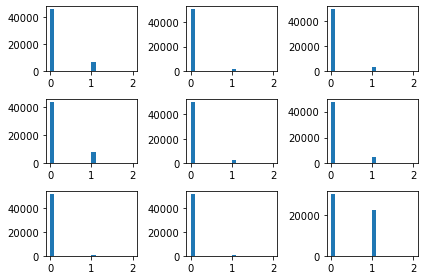

In [290]:
# 単一変数の集計と傾向
fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

ax1.hist(df_light['x9_C'], bins=20, range=(0,2))
ax2.hist(df_light['x9_D'], bins=20, range=(0,2))
ax3.hist(df_light['x9_H'], bins=20, range=(0,2))
ax4.hist(df_light['x9_K'], bins=20, range=(0,2))
ax5.hist(df_light['x9_N'], bins=20, range=(0,2))
ax6.hist(df_light['x9_Q'], bins=20, range=(0,2))
ax7.hist(df_light['x9_R'], bins=20, range=(0,2))
ax8.hist(df_light['x9_S'], bins=20, range=(0,2))
ax9.hist(df_light['x9_T'], bins=20, range=(0,2))
fig.tight_layout()
plt.show()
# 

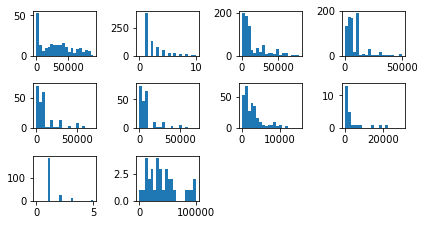

In [291]:
# 単一変数の集計と傾向
fig = plt.figure()
ax1 = fig.add_subplot(4, 4, 1)
ax2 = fig.add_subplot(4, 4, 2)
ax3 = fig.add_subplot(4, 4, 3)
ax4 = fig.add_subplot(4, 4, 4)
ax5 = fig.add_subplot(4, 4, 5)
ax6 = fig.add_subplot(4, 4, 6)
ax7 = fig.add_subplot(4, 4, 7)
ax8 = fig.add_subplot(4, 4, 8)
ax9 = fig.add_subplot(4, 4, 9)
ax10 = fig.add_subplot(4, 4, 10)

ax1.hist(df_label['x63'][df_label['x63']>0], bins=20, range=(0,90000))
ax2.hist(df_label['x58'][df_label['x58']>0], bins=20, range=(0,10))
ax3.hist(df_label['x59'][df_label['x59']>0], bins=20, range=(0,80000))
ax4.hist(df_label['x60'][df_label['x60']>0], bins=20, range=(0,50000))
ax5.hist(df_label['x68'][df_label['x68']>0], bins=20, range=(0,70000))
ax6.hist(df_label['x69'][df_label['x69']>0], bins=20, range=(0,70000))
ax7.hist(df_label['x62'][df_label['x62']>0], bins=20, range=(0,15000))
ax8.hist(df_label['x71'][df_label['x71']>0], bins=20, range=(0,30000))
ax9.hist(df_label['x67'][df_label['x67']>0], bins=20, range=(0,5))
ax10.hist(df_label['x64'][df_label['x64']>0], bins=20, range=(0,100000))

fig.tight_layout()
plt.show()

In [292]:
print(df_label['x63'].value_counts().head(2))
print(df_label['x58'].value_counts().head(2))
print(df_label['x59'].value_counts().head(2))
print(df_label['x60'].value_counts().head(2))
print(df_label['x68'].value_counts().head(2))
print(df_label['x69'].value_counts().head(2))
print(df_label['x62'].value_counts().head(2))
print(df_label['x71'].value_counts().head(2))
print(df_label['x67'].value_counts().head(2))
print(df_label['x64'].value_counts().head(2))
# もとものNaNがどれも５００００件以上

99999999.0    51732
28680.0           2
Name: x63, dtype: int64
0.0    51732
1.0      387
Name: x58, dtype: int64
0.0       51732
5000.0      109
Name: x59, dtype: int64
0.0        51732
10000.0      191
Name: x60, dtype: int64
0.0        52274
10000.0       46
Name: x68, dtype: int64
0.0        52274
10000.0       58
Name: x69, dtype: int64
-1.0    52119
 0.0       79
Name: x62, dtype: int64
-1.0    52460
 0.0       14
Name: x71, dtype: int64
0.0    52274
1.0      186
Name: x67, dtype: int64
99999999.0    51732
1572664.0         1
Name: x64, dtype: int64


In [293]:
print(df_label['x63'].min())
print(df_label['x58'].min())
print(df_label['x59'].min())
print(df_label['x60'].min())
print(df_label['x69'].min())
print(df_label['x69'].min())
print(df_label['x62'].min())
print(df_label['x71'].min())
print(df_label['x67'].min())
print(df_label['x64'].min())
print('='*25)
print(df_label['x63'].max())
print(df_label['x58'].max())
print(df_label['x59'].max())
print(df_label['x60'].max())
print(df_label['x69'].max())
print(df_label['x69'].max())
print(df_label['x62'].max())
print(df_label['x71'].max())
print(df_label['x67'].max())
print(df_label['x64'].max())

54.0
0.0
0.0
0.0
0.0
0.0
-1.0
-1.0
0.0
-84106.0
99999999.0
54.0
90000.0
78000.0
59500.0
59500.0
31754.2648054294
31112.698372208102
9.0
99999999.0


In [294]:
# 加工した項目
X_train_63 = train_X.loc[:,['x0_age','x1_term','x63']].copy()
X_train_58 = train_X.loc[:,['x0_age','x1_term','x58']].copy()
X_train_59 = train_X.loc[:,['x0_age','x1_term','x59']].copy()
X_train_60 = train_X.loc[:,['x0_age','x1_term','x60']].copy()
X_train_68 = train_X.loc[:,['x0_age','x1_term','x68']].copy()
X_train_69 = train_X.loc[:,['x0_age','x1_term','x69']].copy()
X_train_62 = train_X.loc[:,['x0_age','x1_term','x62']].copy()
X_train_71 = train_X.loc[:,['x0_age','x1_term','x71']].copy()
X_train_67 = train_X.loc[:,['x0_age','x1_term','x67']].copy()
X_train_64 = train_X.loc[:,['x0_age','x1_term','x64']].copy()

In [295]:
X_test_63 = test_X.loc[:,['x0_age','x1_term','x63']].copy()
X_test_58 = test_X.loc[:,['x0_age','x1_term','x58']].copy()
X_test_59 = test_X.loc[:,['x0_age','x1_term','x59']].copy()
X_test_60 = test_X.loc[:,['x0_age','x1_term','x60']].copy()
X_test_68 = test_X.loc[:,['x0_age','x1_term','x68']].copy()
X_test_69 = test_X.loc[:,['x0_age','x1_term','x69']].copy()
X_test_62 = test_X.loc[:,['x0_age','x1_term','x62']].copy()
X_test_71 = test_X.loc[:,['x0_age','x1_term','x71']].copy()
X_test_67 = test_X.loc[:,['x0_age','x1_term','x67']].copy()
X_test_64 = test_X.loc[:,['x0_age','x1_term','x64']].copy()

In [296]:
lr.fit(X_train_63, train_y)
y_pred_63 = lr.predict(X_train_63)

lr.fit(X_train_58, train_y)
y_pred_58 = lr.predict(X_train_58)

lr.fit(X_train_59, train_y)
y_pred_59 = lr.predict(X_train_59)

lr.fit(X_train_60, train_y)
y_pred_60 = lr.predict(X_train_60)

lr.fit(X_train_68, train_y)
y_pred_68 = lr.predict(X_train_68)

lr.fit(X_train_69, train_y)
y_pred_69 = lr.predict(X_train_69)

lr.fit(X_train_62, train_y)
y_pred_62 = lr.predict(X_train_62)

lr.fit(X_train_71, train_y)
y_pred_71 = lr.predict(X_train_71)

lr.fit(X_train_67, train_y)
y_pred_67 = lr.predict(X_train_67)

lr.fit(X_train_64, train_y)
y_pred_64 = lr.predict(X_train_64)

In [297]:
fpr, tpr, thresholds = metrics.roc_curve(train_y, y_pred_63)
auc_63 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(train_y, y_pred_58)
auc_58 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(train_y, y_pred_59)
auc_59 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(train_y, y_pred_60)
auc_60 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(train_y, y_pred_68)
auc_68 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(train_y, y_pred_69)
auc_69 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(train_y, y_pred_62)
auc_62 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(train_y, y_pred_71)
auc_71 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(train_y, y_pred_67)
auc_67 = metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(train_y, y_pred_64)
auc_64 = metrics.auc(fpr, tpr)

In [298]:
print(auc_63)
print(auc_58)
print(auc_59)
print(auc_60)
print(auc_68)
print(auc_69)
print(auc_62)
print(auc_71)
print(auc_67)
print(auc_64)

0.5
0.4999857183661811
0.5
0.5005318677422214
0.5
0.5002730746880202
0.5
0.5
0.49995715509854327
0.5004479015847689


In [307]:
# テストデータで結果予測

In [492]:
df_test = pd.read_csv('./dat_test', encoding='utf-8', sep=',') # data read
df_test_proc = df_test.copy()
df_test_proc.head()

,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72
0,29.0,54,1,31,1,0,99,99,99,T,23.0,99,1,4,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,1,99,99,99,99,2,2,2,2,2,2,2,2,2,99,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,45.0,1,2,50,1,0,99,99,99,T,45.0,99,99,99,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,2,2,2,2,2,2,2,99,99,99,99,99,99,2,2,2,2,2,2,1,1,2,3,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,26.0,0,1,99,1,0,99,99,99,T,26.0,99,99,99,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,2,2,2,2,2,2,2,99,99,99,99,99,99,2,2,2,2,2,2,1,1,2,3,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,54.0,137,1,10,1,0,99,99,99,C,37.0,99,99,99,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,1,1,1,1,3,2,2,2,2,2,2,1,1,2,5,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,41.0,242,1,34,1,0,99,99,99,H,21.0,99,4,4,2,2,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,99,2,2,2,2,2,2,1,99,1,1,1,1,3,2,2,2,2,2,2,1,2,2,2,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [493]:
# missing values complement
df_test_proc['x58'] = df_test_proc['x58'].fillna(0)
df_test_proc['x59'] = df_test_proc['x59'].fillna(0)
df_test_proc['x60'] = df_test_proc['x60'].fillna(0)
df_test_proc['x61'] = df_test_proc['x61'].fillna(0)
df_test_proc['x62'] = df_test_proc['x62'].fillna(-1)
df_test_proc['x63'] = df_test_proc['x63'].fillna(99999999)
df_test_proc['x64'] = df_test_proc['x64'].fillna(99999999)
df_test_proc['x65'] = df_test_proc['x65'].fillna(0)
df_test_proc['x66'] = df_test_proc['x66'].fillna(0)
df_test_proc['x67'] = df_test_proc['x67'].fillna(0)
df_test_proc['x68'] = df_test_proc['x68'].fillna(0)
df_test_proc['x69'] = df_test_proc['x69'].fillna(0)
df_test_proc['x70'] = df_test_proc['x70'].fillna(0)
df_test_proc['x71'] = df_test_proc['x71'].fillna(-1)
df_test_proc.head()

,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72
0,29.0,54,1,31,1,0,99,99,99,T,23.0,99,1,4,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,1,99,99,99,99,2,2,2,2,2,2,2,2,2,99,1,4,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0
1,45.0,1,2,50,1,0,99,99,99,T,45.0,99,99,99,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,2,2,2,2,2,2,2,99,99,99,99,99,99,2,2,2,2,2,2,1,1,2,3,0,2,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0
2,26.0,0,1,99,1,0,99,99,99,T,26.0,99,99,99,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,2,2,2,2,2,2,2,99,99,99,99,99,99,2,2,2,2,2,2,1,1,2,3,0,1,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0
3,54.0,137,1,10,1,0,99,99,99,C,37.0,99,99,99,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,1,1,1,1,3,2,2,2,2,2,2,1,1,2,5,4,4,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0
4,41.0,242,1,34,1,0,99,99,99,H,21.0,99,4,4,2,2,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,99,2,2,2,2,2,2,1,99,1,1,1,1,3,2,2,2,2,2,2,1,2,2,2,4,3,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0


In [494]:
# one hot encoding
df_test_proc = pd.get_dummies(df_test_proc, columns=['x9'])
df_select_del.head()
df_test_proc.head()

,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T,x9_X
0,29.0,54,1,31,1,0,99,99,99,23.0,99,1,4,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,1,99,99,99,99,2,2,2,2,2,2,2,2,2,99,1,4,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,0,1,0
1,45.0,1,2,50,1,0,99,99,99,45.0,99,99,99,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,2,2,2,2,2,2,2,99,99,99,99,99,99,2,2,2,2,2,2,1,1,2,3,0,2,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,0,1,0
2,26.0,0,1,99,1,0,99,99,99,26.0,99,99,99,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,2,2,2,2,2,2,2,99,99,99,99,99,99,2,2,2,2,2,2,1,1,2,3,0,1,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,0,1,0
3,54.0,137,1,10,1,0,99,99,99,37.0,99,99,99,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,1,1,1,1,3,2,2,2,2,2,2,1,1,2,5,4,4,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,1,0,0,0,0,0,0,0,0,0
4,41.0,242,1,34,1,0,99,99,99,21.0,99,4,4,2,2,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,99,2,2,2,2,2,2,1,99,1,1,1,1,3,2,2,2,2,2,2,1,2,2,2,4,3,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0,0,0


In [495]:
# constant valeus delete
drop_col = ['x14','x18','x19','x21','x22','x23','x27','x28','x29','x30','x31','x33','x34','x35','x36','x37','x38','x40','x49','x72']
df_test_proc = df_test_proc.drop(drop_col, axis=1)
df_test_proc.head()

,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x46,x47,x48,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T,x9_X
0,29.0,54,1,31,1,0,99,99,99,23.0,99,1,4,2,1,2,2,2,2,2,2,2,1,99,99,99,99,2,2,2,2,2,2,2,2,99,1,4,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,0
1,45.0,1,2,50,1,0,99,99,99,45.0,99,99,99,2,1,2,2,2,2,2,99,2,99,99,99,99,99,2,2,2,2,2,1,1,2,3,0,2,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,0
2,26.0,0,1,99,1,0,99,99,99,26.0,99,99,99,2,1,2,2,2,2,2,99,2,99,99,99,99,99,2,2,2,2,2,1,1,2,3,0,1,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,0
3,54.0,137,1,10,1,0,99,99,99,37.0,99,99,99,2,2,1,1,2,2,2,2,2,1,1,1,1,3,2,2,2,2,2,1,1,2,5,4,4,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1,0,0,0,0,0,0,0,0,0
4,41.0,242,1,34,1,0,99,99,99,21.0,99,4,4,2,1,1,1,2,2,2,99,1,1,1,1,1,3,2,2,2,2,2,1,2,2,2,4,3,0.0,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0,0,1,0,0,0,0,0,0,0


In [496]:
# outlier valeus revise
df_test_proc['x6'] = df_test_proc['x6'].replace(99, 0)

In [497]:
# strong corration values delete
cols =['x46', 'x48', 'x50', 'x51']
df_test_proc = df_label.copy()
df_test_proc = df_test_proc.drop(columns=cols)
df_test_proc.head()

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x47,x52,x53,x54,x55,x56,x57,x58,x59,x60,x62,x63,x64,x67,x68,x69,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T
0,1,22.0,0,2,10,1,0,0,99,99,22.0,99,99,99,2,2,1,1,2,2,2,2,2,1,99,99,99,99,2,2,2,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1
1,1,49.0,36,2,10,1,8,1,99,99,46.0,4,4,4,2,1,2,1,2,2,2,99,1,1,1,1,1,3,2,1,2,2,99,3,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0
2,1,22.0,13,1,10,1,6,1,99,99,21.0,99,2,5,2,2,2,2,2,2,2,2,2,99,99,99,99,99,2,2,1,2,99,0,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1
3,1,34.0,24,1,10,2,0,0,99,99,32.0,99,2,5,2,2,2,1,2,2,2,2,2,1,3,2,1,1,2,2,1,2,99,1,2,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0
4,1,26.0,97,1,32,1,10,1,99,99,18.0,99,4,4,2,1,1,1,1,2,2,99,1,1,1,1,1,3,2,2,2,2,99,3,3,0.0,0.0,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,0.0,-1.0,0,0,0,0,0,1,0,0,0


In [498]:
# not important values delete
del_col = ['x7', 'x8', 'x11', 'x15', 'x16', 'x24', 'x25', 'x26', 'x32', 'x39','x41', 'x44', 'x47', 'x54', 'x58', 'x60', 'x69']
df_test_proc = df_test_proc.drop(columns=del_col)
df_test_proc.head()

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x10,x12,x13,x17,x20,x42,x43,x45,x52,x53,x55,x56,x57,x59,x62,x63,x64,x67,x68,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T
0,1,22.0,0,2,10,1,0,0,22.0,99,99,1,1,99,99,99,2,2,99,1,2,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1
1,1,49.0,36,2,10,1,8,1,46.0,4,4,2,1,1,1,3,1,2,99,3,2,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0
2,1,22.0,13,1,10,1,6,1,21.0,2,5,2,2,99,99,99,2,1,99,0,2,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1
3,1,34.0,24,1,10,2,0,0,32.0,2,5,2,1,3,2,1,2,1,99,1,2,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0
4,1,26.0,97,1,32,1,10,1,18.0,4,4,1,1,1,1,3,2,2,99,3,3,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,-1.0,0,0,0,0,0,1,0,0,0


In [499]:
# strong corration values colaboration
df_test_proc['x73'] = (df_test_proc['x0_age'] + df_test_proc['x10'])/2
df_test_proc['x74'] = (df_test_proc['x5'] + df_test_proc['x6'])/2
df_test_proc['x75'] = (df_test_proc['x59'] + df_test_proc['x67'])/2
df_test_proc['x76'] = (df_test_proc['x59'] + df_test_proc['x68'])/2
df_test_proc['x77'] = (df_test_proc['x62'] + df_test_proc['x71'])/2
df_test_proc['x78'] = (df_test_proc['x63'] + df_test_proc['x64'])/2
df_test_proc.head()

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x10,x12,x13,x17,x20,x42,x43,x45,x52,x53,x55,x56,x57,x59,x62,x63,x64,x67,x68,x71,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T,x73,x74,x75,x76,x77,x78
0,1,22.0,0,2,10,1,0,0,22.0,99,99,1,1,99,99,99,2,2,99,1,2,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,22.0,0.0,0.0,0.0,-1.0,99999999.0
1,1,49.0,36,2,10,1,8,1,46.0,4,4,2,1,1,1,3,1,2,99,3,2,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0,47.5,4.5,0.0,0.0,-1.0,99999999.0
2,1,22.0,13,1,10,1,6,1,21.0,2,5,2,2,99,99,99,2,1,99,0,2,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,21.5,3.5,0.0,0.0,-1.0,99999999.0
3,1,34.0,24,1,10,2,0,0,32.0,2,5,2,1,3,2,1,2,1,99,1,2,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,-1.0,0,0,0,1,0,0,0,0,0,33.0,0.0,0.0,0.0,-1.0,99999999.0
4,1,26.0,97,1,32,1,10,1,18.0,4,4,1,1,1,1,3,2,2,99,3,3,0.0,-1.0,99999999.0,99999999.0,0.0,0.0,-1.0,0,0,0,0,0,1,0,0,0,22.0,5.5,0.0,0.0,-1.0,99999999.0


In [500]:
# not important values delete
del_col = ['x59', 'x62', 'x63', 'x64','x67', 'x68', 'x71']
df_test_proc = df_test_proc.drop(columns=del_col)
df_test_proc.head()

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x10,x12,x13,x17,x20,x42,x43,x45,x52,x53,x55,x56,x57,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T,x73,x74,x75,x76,x77,x78
0,1,22.0,0,2,10,1,0,0,22.0,99,99,1,1,99,99,99,2,2,99,1,2,0,0,0,0,0,0,0,0,1,22.0,0.0,0.0,0.0,-1.0,99999999.0
1,1,49.0,36,2,10,1,8,1,46.0,4,4,2,1,1,1,3,1,2,99,3,2,0,0,0,1,0,0,0,0,0,47.5,4.5,0.0,0.0,-1.0,99999999.0
2,1,22.0,13,1,10,1,6,1,21.0,2,5,2,2,99,99,99,2,1,99,0,2,0,0,0,0,0,0,0,0,1,21.5,3.5,0.0,0.0,-1.0,99999999.0
3,1,34.0,24,1,10,2,0,0,32.0,2,5,2,1,3,2,1,2,1,99,1,2,0,0,0,1,0,0,0,0,0,33.0,0.0,0.0,0.0,-1.0,99999999.0
4,1,26.0,97,1,32,1,10,1,18.0,4,4,1,1,1,1,3,2,2,99,3,3,0,0,0,0,0,1,0,0,0,22.0,5.5,0.0,0.0,-1.0,99999999.0


In [501]:
df_test_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y        52500 non-null  int64  
 1   x0_age   52500 non-null  float64
 2   x1_term  52500 non-null  int64  
 3   x2_sex   52500 non-null  int64  
 4   x3       52500 non-null  int64  
 5   x4       52500 non-null  int64  
 6   x5       52500 non-null  int64  
 7   x6       52500 non-null  int64  
 8   x10      52500 non-null  float64
 9   x12      52500 non-null  int64  
 10  x13      52500 non-null  int64  
 11  x17      52500 non-null  int64  
 12  x20      52500 non-null  int64  
 13  x42      52500 non-null  int64  
 14  x43      52500 non-null  int64  
 15  x45      52500 non-null  int64  
 16  x52      52500 non-null  int64  
 17  x53      52500 non-null  int64  
 18  x55      52500 non-null  int64  
 19  x56      52500 non-null  int64  
 20  x57      52500 non-null  int64  
 21  x9_C     525

In [504]:
test_pred_X = df_test_proc.drop(columns='y')
test_pred_X

,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x10,x12,x13,x17,x20,x42,x43,x45,x52,x53,x55,x56,x57,x9_C,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T,x73,x74,x75,x76,x77,x78
0,22.0,0,2,10,1,0,0,22.0,99,99,1,1,99,99,99,2,2,99,1,2,0,0,0,0,0,0,0,0,1,22.0,0.0,0.0,0.0,-1.0,99999999.0
1,49.0,36,2,10,1,8,1,46.0,4,4,2,1,1,1,3,1,2,99,3,2,0,0,0,1,0,0,0,0,0,47.5,4.5,0.0,0.0,-1.0,99999999.0
2,22.0,13,1,10,1,6,1,21.0,2,5,2,2,99,99,99,2,1,99,0,2,0,0,0,0,0,0,0,0,1,21.5,3.5,0.0,0.0,-1.0,99999999.0
3,34.0,24,1,10,2,0,0,32.0,2,5,2,1,3,2,1,2,1,99,1,2,0,0,0,1,0,0,0,0,0,33.0,0.0,0.0,0.0,-1.0,99999999.0
4,26.0,97,1,32,1,10,1,18.0,4,4,1,1,1,1,3,2,2,99,3,3,0,0,0,0,0,1,0,0,0,22.0,5.5,0.0,0.0,-1.0,99999999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,26.0,11,1,10,2,0,0,25.0,2,5,2,1,1,1,1,1,1,99,1,2,0,0,0,0,0,0,0,0,1,25.5,0.0,0.0,0.0,-1.0,99999999.0
52496,32.0,26,2,10,2,0,0,29.0,2,5,2,2,1,1,1,2,2,99,2,4,0,0,0,1,0,0,0,0,0,30.5,0.0,0.0,0.0,-1.0,99999999.0
52497,59.0,84,2,10,2,0,0,52.0,2,5,2,2,1,1,3,2,1,99,2,2,0,0,0,0,0,0,0,0,1,55.5,0.0,0.0,0.0,-1.0,99999999.0
52498,16.0,8,2,10,2,0,0,45.0,99,99,2,2,1,1,1,1,1,2,1,4,0,0,0,0,1,0,0,0,0,30.5,0.0,0.0,0.0,-1.0,99999999.0


In [524]:
# 予測
y_pred = model_lgb.predict(test_pred_X)
y_pred.shape

(52500,)

In [525]:
y_preds =  np.where(y_pred > 0.5, 1, 0) # 閾値=0.5
y_preds

array([0, 0, 0, ..., 0, 0, 0])